## INSTRUCTIONS 

#### 1) The train dataset has all of the columns that you will need to generate and refine your models. The test dataset has all of those columns except for the target that you are trying to predict in your Regression model.

#### 2) Generate your regression model using the training data. We expect that within this process, you'll be making use of:
    - train-test split
    - cross-validation / grid searching for hyperparameters
    - strong exploratory data analysis to question correlation and relationship across predictive variables
    - code that reproducibly and consistently applies feature transformation (such as the preprocessing library)
    
    
#### 3) Predict the values for your target column in the test dataset and consider submitting your predictions to Kaggle to see how your model does against unknown data.
    - Note: Kaggle expects to see your submissions in a specific format. Check the challenge's page to make sure you are formatting your CSVs correctly!
    - You are limited to models you've learned in class so far. In other words, you cannot use XGBoost, Neural Networks or any other advanced model for this project.
    
#### 4) Evaluate your models!
     - consider your evaluation metrics
     - consider your baseline score
     - how can your model be used for inference?
     - why do you believe your model will generalize to new data?

### *Challenge introduction*
    - In this challenge, you will use the well known Ames housing data to create a regression model that predicts the price of houses in Ames, IA. You should feel free to use any and all features that are present in this dataset.

### *Goal*
    - It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.
    
### *Notes*
    - DROP: SALE TYPE, SALE condition, MO and Yr drop, MISC
    - Ordinal(change to 1,2,3,4) nominal(one hot encoding)
    - do dictionary data
    - Do Ridge and Lasso CV 
    


PRESENTING PROBLEM

- It is 2021. Many houses are being sold at record high prices. Every other home owner is hoping to jump on the bandwagon and reap a good gain in these profitable times. Here at Proprata, it is our calling to help you with that! We help you, the seller pinpoint specific parts of your house to upgrade so that you can command a higher selling price.We can help you too, the buyer to make a worthy purchase that will fetch you a good price when the time is ripe. Come have a talk with us over a prata. We can assure you that we flip properties as well as Mr Prata flips his pratas.


Ridge and lasso CV 

[Click for Data Dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn: Import Simple Imputer
from sklearn.impute import SimpleImputer


# explicitly requires this experimental feature
from sklearn.experimental import enable_iterative_imputer  
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
#sklearn: Import Standard Scaler
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Import the appropriate library and fit lr model
from sklearn.linear_model import LinearRegression

# Linear least squares with L2 regularization
from sklearn.linear_model import Ridge, RidgeCV

# Imports similar to Ridge, this time for Lasso
from sklearn.linear_model import Lasso, LassoCV

# sklearn: Import train_test_split.
from sklearn.model_selection import train_test_split, cross_val_score

#sklearn: KNN
from sklearn.neighbors import KNeighborsClassifier

# sklearn: Import Logistic Regression model.
from sklearn.linear_model import LogisticRegression

#set_style
plt.style.use('fivethirtyeight')

#configure for retina display
%config InlineBackend.figure_format = 'retina'

# sklearn: Import metrics.
from sklearn.metrics import r2_score
from sklearn import metrics


In [2]:
df = pd.read_csv("../project_2/datasets/train.csv")

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
print(df.shape)
print(df.info())
df.describe().T #Summary statistics dont show object?

(2051, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  hou

count          mean           std          min          25%  \
id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
pid              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
ms_subclass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
lot_frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
lot_area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
overall_qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
overall_cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
year_built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
year_remod/add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
mas_vnr_area     2029.0  9.969591e+01  1.749631e+02          0.0          0.0   
bsmtfin_sf_1     2050.0  4.423005e+02  4.612041e+02          0.0          0.0   
bsmtfin_sf_2     2050.0  4.795902e+01  1.650009e+02          0.0          0.0   
bsmt_unf_sf      2050.0  5.677283e+02  4.449548e+02          0.0        220.0   
total_bsmt_sf    2050.0  1.057988e+03  4.494107e+02          0.0        793.0   
1st_flr_sf       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd_flr_sf       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
low_qual_fin_sf  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
gr_liv_area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
bsmt_full_bath   2049.0  4.275256e-01  5.226732e-01          0.0          0.0   
bsmt_half_bath   2049.0  6.344558e-02  2.517052e-01          0.0          0.0   
full_bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
half_bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
bedroom_abvgr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
kitchen_abvgr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
totrms_abvgrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
garage_yr_blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
garage_cars      2050.0  1.776585e+00  7.645374e-01          0.0          1.0   
garage_area      2050.0  4.736717e+02  2.159346e+02          0.0        319.0   
wood_deck_sf     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
open_porch_sf    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
enclosed_porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3ssn_porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
screen_porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
pool_area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
misc_val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
mo_sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
yr_sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
saleprice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%           75%          max  
id                    1486.0  2.198000e+03       2930.0  
pid              535453200.0  9.071801e+08  924152030.0  
ms_subclass             50.0  7.000000e+01        190.0  
lot_frontage            68.0  8.000000e+01        313.0  
lot_area              9430.0  1.151350e+04     159000.0  
overall_qual             6.0  7.000000e+00         10.0  
overall_cond             5.0  6.000000e+00          9.0  
year_built            1974.0  2.001000e+03       2010.0  
year_remod/add        1993.0  2.004000e+03       2010.0  
mas_vnr_area             0.0  1.610000e+02       1600.0  
bsmtfin_sf_1           368.0  7.337500e+02       5644.0  
bsmtfin_sf_2             0.0  0.000000e+00       1474.0  
bsmt_unf_sf            

In [5]:
df.loc[:, df.isna().any()].columns
#to see at one glance all the columns with missing values 

Index(['lot_frontage', 'alley', 'mas_vnr_type', 'mas_vnr_area', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'bsmt_full_bath', 'bsmt_half_bath', 'fireplace_qu', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area',
       'garage_qual', 'garage_cond', 'pool_qc', 'fence', 'misc_feature'],
      dtype='object')

In [6]:
pd.set_option('display.max_rows', 500)
df.isnull().sum()[0:90]
#we should learn to deal with the null values 

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

<AxesSubplot:>

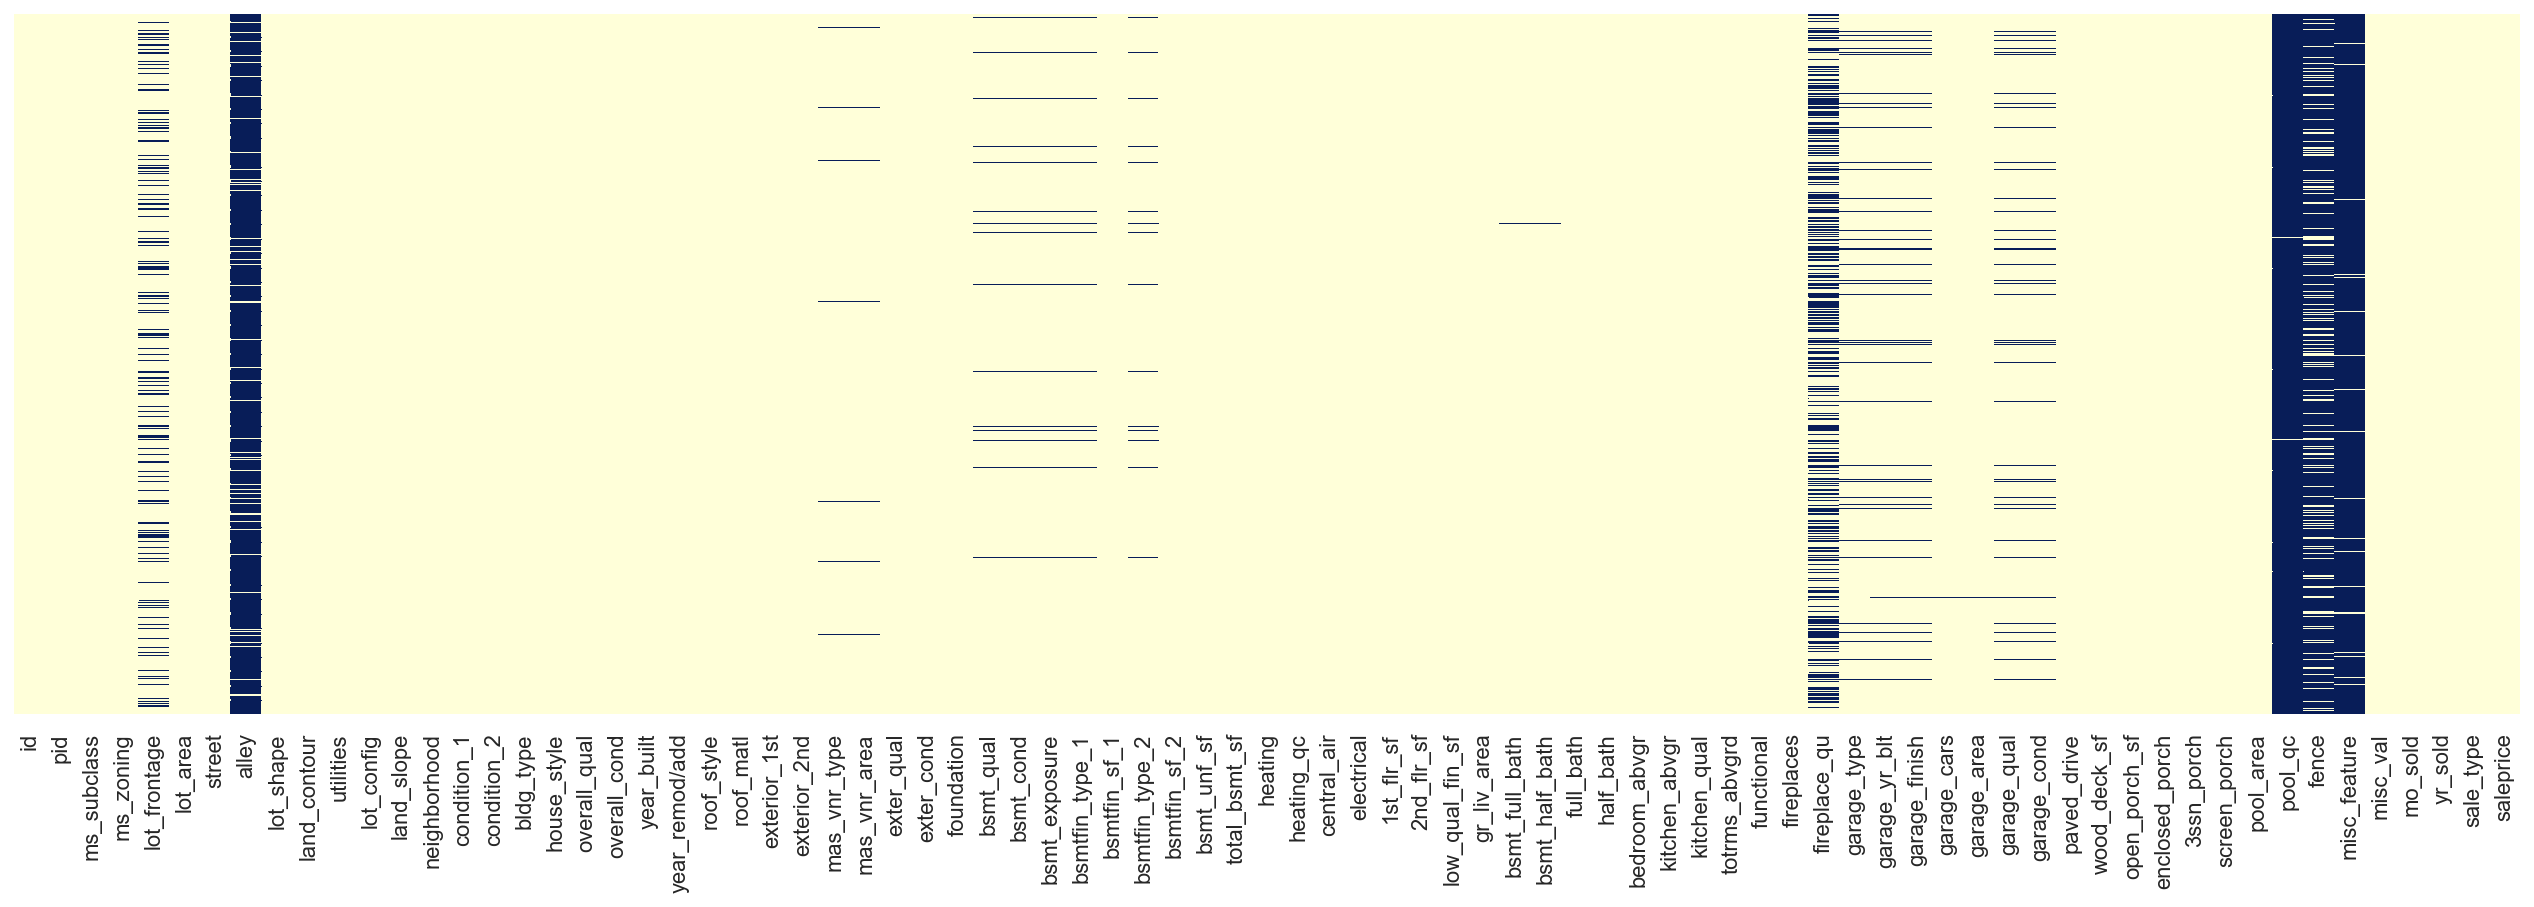

In [7]:
sns.set(font_scale=1)
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'YlGnBu')
#the heat map helps us to see which columns has null values 

In [8]:
df.select_dtypes(include=['float64'])
#to see columns that are values which are float64

lot_frontage  mas_vnr_area  bsmtfin_sf_1  bsmtfin_sf_2  bsmt_unf_sf  \
0              NaN         289.0         533.0           0.0        192.0   
1             43.0         132.0         637.0           0.0        276.0   
2             68.0           0.0         731.0           0.0        326.0   
3             73.0           0.0           0.0           0.0        384.0   
4             82.0           0.0           0.0           0.0        676.0   
...            ...           ...           ...           ...          ...   
2046          79.0           0.0        1011.0           0.0        873.0   
2047           NaN           0.0         262.0           0.0        599.0   
2048          57.0           0.0           0.0           0.0        896.0   
2049          80.0           0.0         155.0         750.0        295.0   
2050          60.0           0.0           0.0           0.0        994.0   

      total_bsmt_sf  bsmt_full_bath  bsmt_half_bath  garage_yr_blt  \
0             725.0             0.0             0.0         1976.0   
1             913.0             1.0             0.0         1997.0   
2            1057.0             1.0             0.0         1953.0   
3             384.0             0.0             0.0         2007.0   
4             676.0             0.0             0.0         1957.0   
...             ...             ...             ...            ...   
2046         1884.0             1.0             0.0         2007.0   
2047          861.0             0.0             0.0         1961.0   
2048          896.0             0.0             0.0         1929.0   
2049         1200.0             1.0             0.0         1956.0   
2050          994.0             0.0             0.0         1999.0   

      garage_cars  garage_area  
0             2.0        475.0  
1             2.0        559.0  
2             1.0        246.0  
3             2.0        400.0  
4             2.0        484.0  
...           ...          ...  
2046          2.0        520.0  
2047          2.0        539.0  
2048          2.0        342.0  
2049          1.0        294.0  
2050          2.0        442.0  

[2051 rows x 11 columns]

In [9]:
df.select_dtypes(include=['int64'])
#to see columns that are values which are int64

id        pid  ms_subclass  lot_area  overall_qual  overall_cond  \
0      109  533352170           60     13517             6             8   
1      544  531379050           60     11492             7             5   
2      153  535304180           20      7922             5             7   
3      318  916386060           60      9802             5             5   
4      255  906425045           50     14235             6             8   
...    ...        ...          ...       ...           ...           ...   
2046  1587  921126030           20     11449             8             5   
2047   785  905377130           30     12342             4             5   
2048   916  909253010           50      7558             6             6   
2049   639  535179160           20     10400             4             5   
2050    10  527162130           60      7500             7             5   

      year_built  year_remod/add  1st_flr_sf  2nd_flr_sf  ...  wood_deck_sf  \
0           1976            2005         725         754  ...             0   
1           1996            1997         913        1209  ...             0   
2           1953            2007        1057           0  ...             0   
3           2006            2007         744         700  ...           100   
4           1900            1993         831         614  ...             0   
...          ...             ...         ...         ...  ...           ...   
2046        2007            2007        1728           0  ...             0   
2047        1940            1950         861           0  ...           158   
2048        1928            1950        1172         741  ...             0   
2049        1956            1956        1200           0  ...             0   
2050        1999            1999        1028         776  ...           140   

      open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  \
0                44               0           0             0          0   
1                74               0           0             0          0   
2                52               0           0             0          0   
3                 0               0           0             0          0   
4                59               0           0             0          0   
...             ...             ...         ...           ...        ...   
2046            276               0           0             0          0   
2047              0               0           0             0          0   
2048              0               0           0             0          0   
2049            189             140           0             0          0   
2050             60               0           0             0          0   

      misc_val  mo_sold  yr_sold  saleprice  
0            0        3     2010     130500  
1            0        4     2009     220000  
2            0        1     2010     109000  
3            0        4     2010     174000  
4            0        3     2010     138500  
...        ...      ...      ...        ...  
2046         0        1     2008     298751  
2047         0        3     2009      82500  
2048         0        3     2009     177000  
2049         0       11     2009     144000  
2050         0        6     2010     189000  

[2051 rows x 28 columns]

In [10]:
df.select_dtypes(include = ['object'])
#to see columns that are values which are object
#There are numerous ‘objects’ in the data, which will need to be transformed to numeric values in order to be used in our regression

ms_zoning street alley lot_shape land_contour utilities lot_config  \
0           RL   Pave   NaN       IR1          Lvl    AllPub    CulDSac   
1           RL   Pave   NaN       IR1          Lvl    AllPub    CulDSac   
2           RL   Pave   NaN       Reg          Lvl    AllPub     Inside   
3           RL   Pave   NaN       Reg          Lvl    AllPub     Inside   
4           RL   Pave   NaN       IR1          Lvl    AllPub     Inside   
...        ...    ...   ...       ...          ...       ...        ...   
2046        RL   Pave   NaN       IR1          HLS    AllPub     Inside   
2047        RL   Pave   NaN       IR1          Lvl    AllPub     Inside   
2048        RL   Pave   NaN       Reg          Bnk    AllPub     Inside   
2049        RL   Pave   NaN       Reg          Lvl    AllPub     Corner   
2050        RL   Pave   NaN       Reg          Lvl    AllPub     Inside   

     land_slope neighborhood condition_1  ... fireplace_qu garage_type  \
0           Gtl       Sawyer        RRAe  ...          NaN      Attchd   
1           Gtl      SawyerW        Norm  ...           TA      Attchd   
2           Gtl        NAmes        Norm  ...          NaN      Detchd   
3           Gtl       Timber        Norm  ...          NaN     BuiltIn   
4           Gtl      SawyerW        Norm  ...          NaN      Detchd   
...         ...          ...         ...  ...          ...         ...   
2046        Gtl       Timber        Norm  ...           Gd      Attchd   
2047        Gtl      Edwards        Norm  ...          NaN      Detchd   
2048        Gtl      Crawfor        Norm  ...           TA      Detchd   
2049        Gtl        NAmes        Norm  ...           Gd      Attchd   
2050        Gtl      Gilbert        Norm  ...           TA      Attchd   

     garage_finish garage_qual garage_cond paved_drive pool_qc fence  \
0              RFn          TA          TA           Y     NaN   NaN   
1              RFn          TA          TA           Y     NaN   NaN   
2              Unf          TA          TA           Y     NaN   NaN   
3              Fin          TA          TA           Y     NaN   NaN   
4              Unf          TA          TA           N     NaN   NaN   
...            ...         ...         ...         ...     ...   ...   
2046           Fin          TA          TA           Y     NaN   NaN   
2047           Unf          TA          TA           Y     NaN   NaN   
2048           Unf          Fa          Fa           Y     NaN   NaN   
2049           Unf          TA          TA           Y     NaN   NaN   
2050           Fin          TA          TA           Y     NaN   NaN   

     misc_feature sale_type  
0             NaN       WD   
1             NaN       WD   
2             NaN       WD   
3             NaN       WD   
4             NaN       WD   
...           ...       ...  
2046          NaN       WD   
2047          NaN       WD   
2048          NaN       WD   
2049          NaN       WD   
2050          NaN       WD   

[2051 rows x 42 columns]

### REPLACING NULL VALUES 
- I wanted to use knn.inputer, but there are values whose dtype = 'O'
- so I will go through manually the data, column by column and to familiarize with the data at the same time. 

### REPLACING NULL VALUES: Lot Frontage 
- Since its numeric, we should focus on managing null values 
- From above, seems to be 330 null values in lot frontage
- we could replace the null values by referencing lot frontage with another feature

In [11]:
df['lot_frontage'].value_counts()
#to see the values inside

60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
75.0      68
85.0      52
63.0      38
24.0      33
78.0      33
21.0      32
64.0      31
90.0      31
74.0      31
72.0      30
68.0      28
62.0      28
73.0      25
100.0     23
82.0      21
43.0      20
57.0      20
52.0      20
66.0      19
79.0      19
67.0      18
59.0      18
53.0      18
76.0      16
88.0      16
51.0      16
56.0      15
69.0      14
84.0      14
55.0      14
81.0      14
40.0      13
35.0      13
92.0      13
91.0      13
58.0      13
71.0      13
44.0      12
30.0      11
48.0      11
41.0      11
77.0      11
95.0      11
34.0      11
96.0      11
83.0      10
61.0      10
105.0      9
107.0      9
93.0       9
110.0      9
94.0       8
45.0       8
42.0       8
87.0       8
120.0      8
98.0       7
102.0      7
86.0       7
37.0       6
89.0       6
54.0       6
47.0       6
32.0       6
103.0      5
36.0       5
97.0       4
38.0       4
129.0      4
109.0      4
114.0      4
39.0       4

In [12]:
lot_frontage_null = df[df['lot_frontage'].isnull()] #Done to see what kind of data appears, and whether they should be removed
lot_frontage_null.head().T #Although the lot frontage columns in these houses has missing values, they are still houses. So we should not remove

0          7          8          23         27
id                     109        145       1942         12       1534
pid              533352170  535154050  535353130  527165230  909277040
ms_subclass             60         20         20         20         50
ms_zoning               RL         RL         RL         RL         RL
lot_frontage           NaN        NaN        NaN        NaN        NaN
lot_area             13517      12160      15783       7980      11700
street                Pave       Pave       Pave       Pave       Pave
alley                  NaN        NaN        NaN        NaN       Grvl
lot_shape              IR1        IR1        Reg        IR1        IR1
land_contour           Lvl        Lvl        Lvl        Lvl        HLS
utilities           AllPub     AllPub     AllPub     AllPub     AllPub
lot_config         CulDSac     Inside     Inside     Inside     Inside
land_slope             Gtl        Gtl        Gtl        Gtl        Mod
neighborhood        Sawyer      NAmes    OldTown    Gilbert    Crawfor
condition_1           RRAe       Norm     Artery       Norm       Norm
condition_2           Norm       Norm       Norm       Norm       Norm
bldg_type             1Fam       1Fam       1Fam       1Fam       1Fam
house_style         2Story     1Story     1Story     1Story     1.5Fin
overall_qual             6          5          5          6          5
overall_cond             8          5          5          7          6
year_built            1976       1959       1952       1992       1937
year_remod/add        2005       1959       1952       2007       1995
roof_style           Gable        Hip      Gable      Gable      Gable
roof_matl          CompShg    CompShg    CompShg    CompShg    CompShg
exterior_1st       HdBoard    Plywood    Wd Sdng    HdBoard    WdShing
exterior_2nd       Plywood    Plywood    Wd Sdng    HdBoard    Wd Shng
mas_vnr_type       BrkFace    BrkFace       None       None       None
mas_vnr_area         289.0      180.0        0.0        0.0        0.0
exter_qual              Gd         TA         TA         TA         TA
exter_cond              TA         TA         TA         Gd         TA
foundation          CBlock     CBlock     CBlock      PConc     CBlock
bsmt_qual               TA         TA         TA         Gd         TA
bsmt_cond               TA         TA         TA         TA         TA
bsmt_exposure           No         No         No         No         No
bsmtfin_type_1         GLQ        Rec        Rec        ALQ        BLQ
bsmtfin_sf_1         533.0     1000.0      292.0      935.0      606.0
bsmtfin_type_2         Unf        Unf        Unf        Unf        Unf
bsmtfin_sf_2           0.0        0.0        0.0        0.0        0.0
bsmt_unf_sf          192.0      188.0      632.0      233.0      336.0
total_bsmt_sf        725.0     1188.0      924.0     1168.0      942.0
heating               GasA       GasA       GasA       GasA       GasA
heating_qc              Ex         Fa         TA         Ex         Ex
central_air              Y          Y          Y          Y          Y
electrical           SBrkr      SBrkr      SBrkr      SBrkr      SBrkr
1st_flr_sf             725       1188        924       1187       1265
2nd_flr_sf             754          0          0          0        673
low_qual_fin_sf          0          0          0          0          0
gr_liv_area           1479       1188        924       1187       1938
bsmt_full_bath         0.0        1.0        0.0        1.0        0.0
bsmt_half_bath         0.0        0.0        0.0        0.0        0.0
full_bath                2          1          1          2          2
half_bath                1          0          0          0          0
bedroom_abvgr            3          3          2          3          4
kitchen_abvgr            1          1          1          1          1
kitchen_qual            Gd         TA         TA         TA         Gd
totrms_abvgrd            6          6          6

In [13]:
config_and_lotfrontage_agg = df.groupby(['lot_config']).agg({'lot_frontage':'mean'}) #average value 
config_and_lotfrontage_agg 
#lot_config has some information about frontage 
#lot_config has no null values so we could use it as reference to find out the mean for lot frontage, and use these value to replace the missing values in lot frontage


lot_frontage
lot_config              
Corner         83.245552
CulDSac        55.228571
FR2            60.836735
FR3            87.000000
Inside         66.952780

In [14]:
df.loc[(df['lot_frontage'].isna()) & (df['lot_config'] == 'Corner'), ['lot_frontage']] = 83.245552
df.loc[(df['lot_frontage'].isna()) & (df['lot_config'] == 'CulDSac'), ['lot_frontage']] = 55.228571
df.loc[(df['lot_frontage'].isna()) & (df['lot_config'] == 'FR2'), ['lot_frontage']] = 60.836735
df.loc[(df['lot_frontage'].isna()) & (df['lot_config'] == 'FR3'), ['lot_frontage']] = 87.000000
df.loc[(df['lot_frontage'].isna()) & (df['lot_config'] == 'Inside'), ['lot_frontage']] = 66.952780

In [15]:
df['lot_frontage'].isnull().sum()

0

<AxesSubplot:>

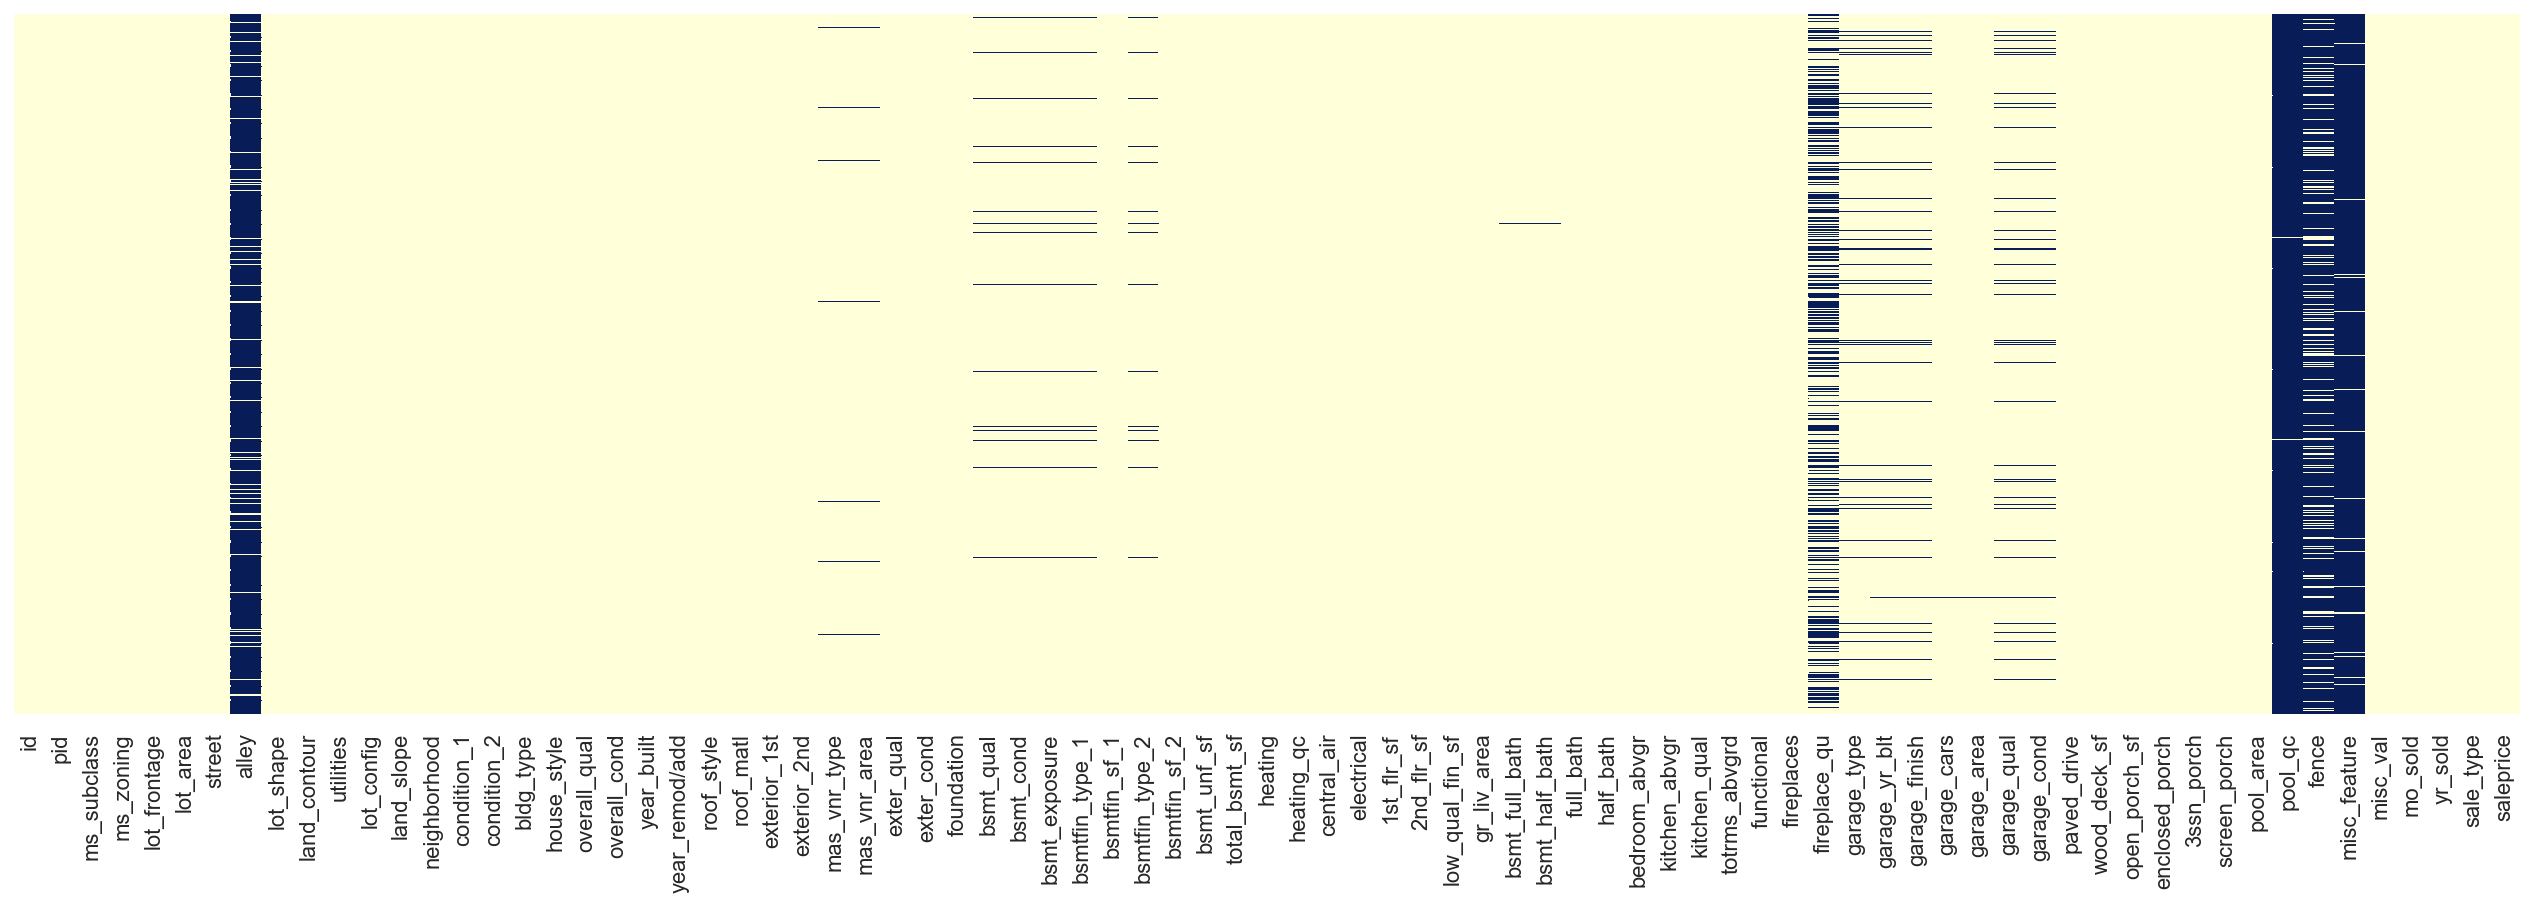

In [16]:
sns.set(font_scale=1)
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'YlGnBu')
#lot frontage is cleaned. 

### REPLACING NULL VALUES:  Alley 
- As seen above, alley has 1911 missing values

In [17]:
df['alley'].value_counts()
#Based on data dictionary, missing values should be accorded NA value, yet is not shown here

Grvl    85
Pave    55
Name: alley, dtype: int64

In [18]:
df['alley'] = df['alley'].replace(np.nan, "NA")

In [19]:
df['alley'].value_counts()

NA      1911
Grvl      85
Pave      55
Name: alley, dtype: int64

<AxesSubplot:>

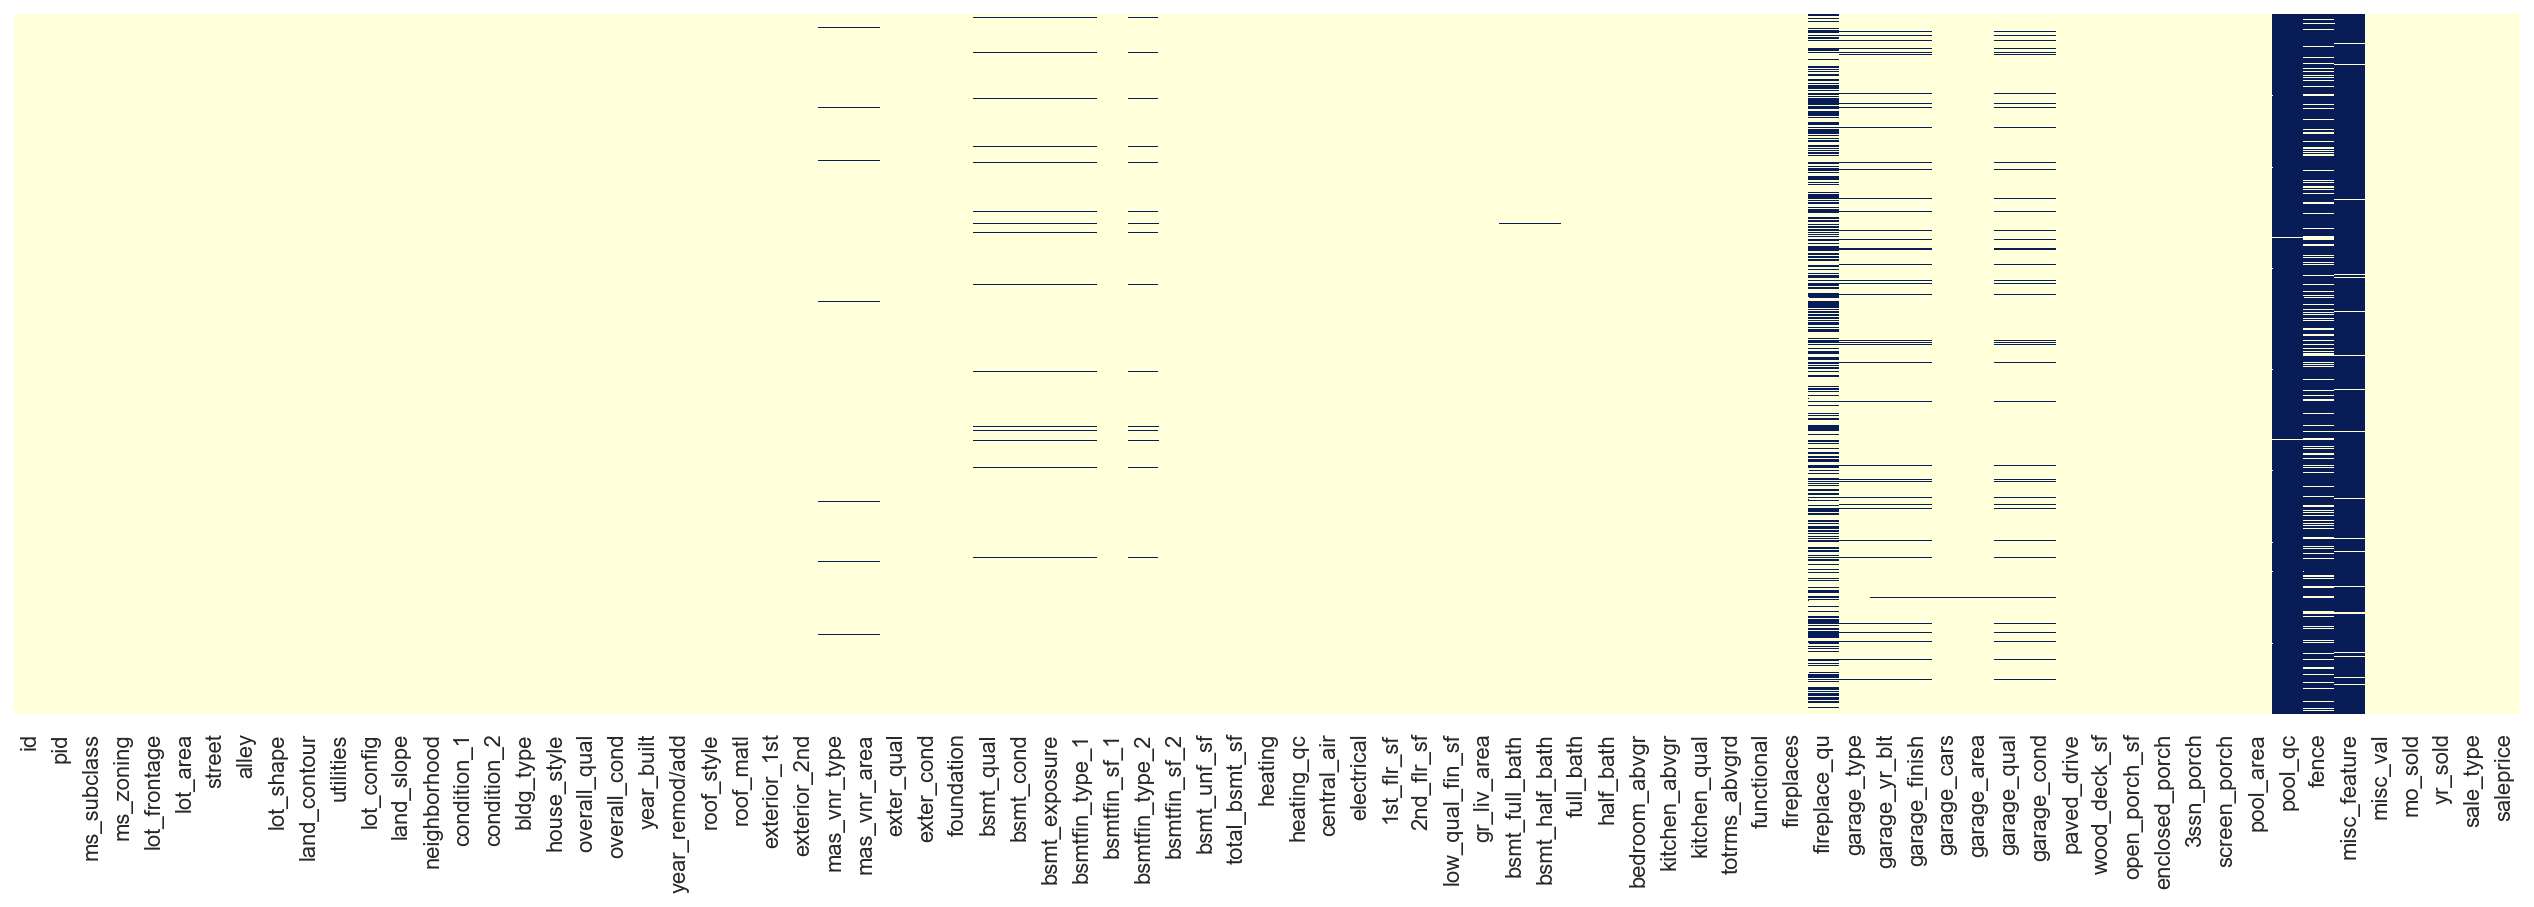

In [20]:
sns.set(font_scale=1)
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'YlGnBu')
#alley is cleaned.

### REPLACING NULL VALUES:  Mas_vnr_type / Masonry veneer type
- As seen above, there are 22 missing values.
- Since there is many none value, we can just replace the 22 missing values with None. 
- Also, there dont seem to be cinderblock


In [21]:
df['mas_vnr_type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [22]:
df['mas_vnr_type'] = df['mas_vnr_type'].replace(np.nan, 'None')

In [23]:
df['mas_vnr_type'].value_counts()

None       1240
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

<AxesSubplot:>

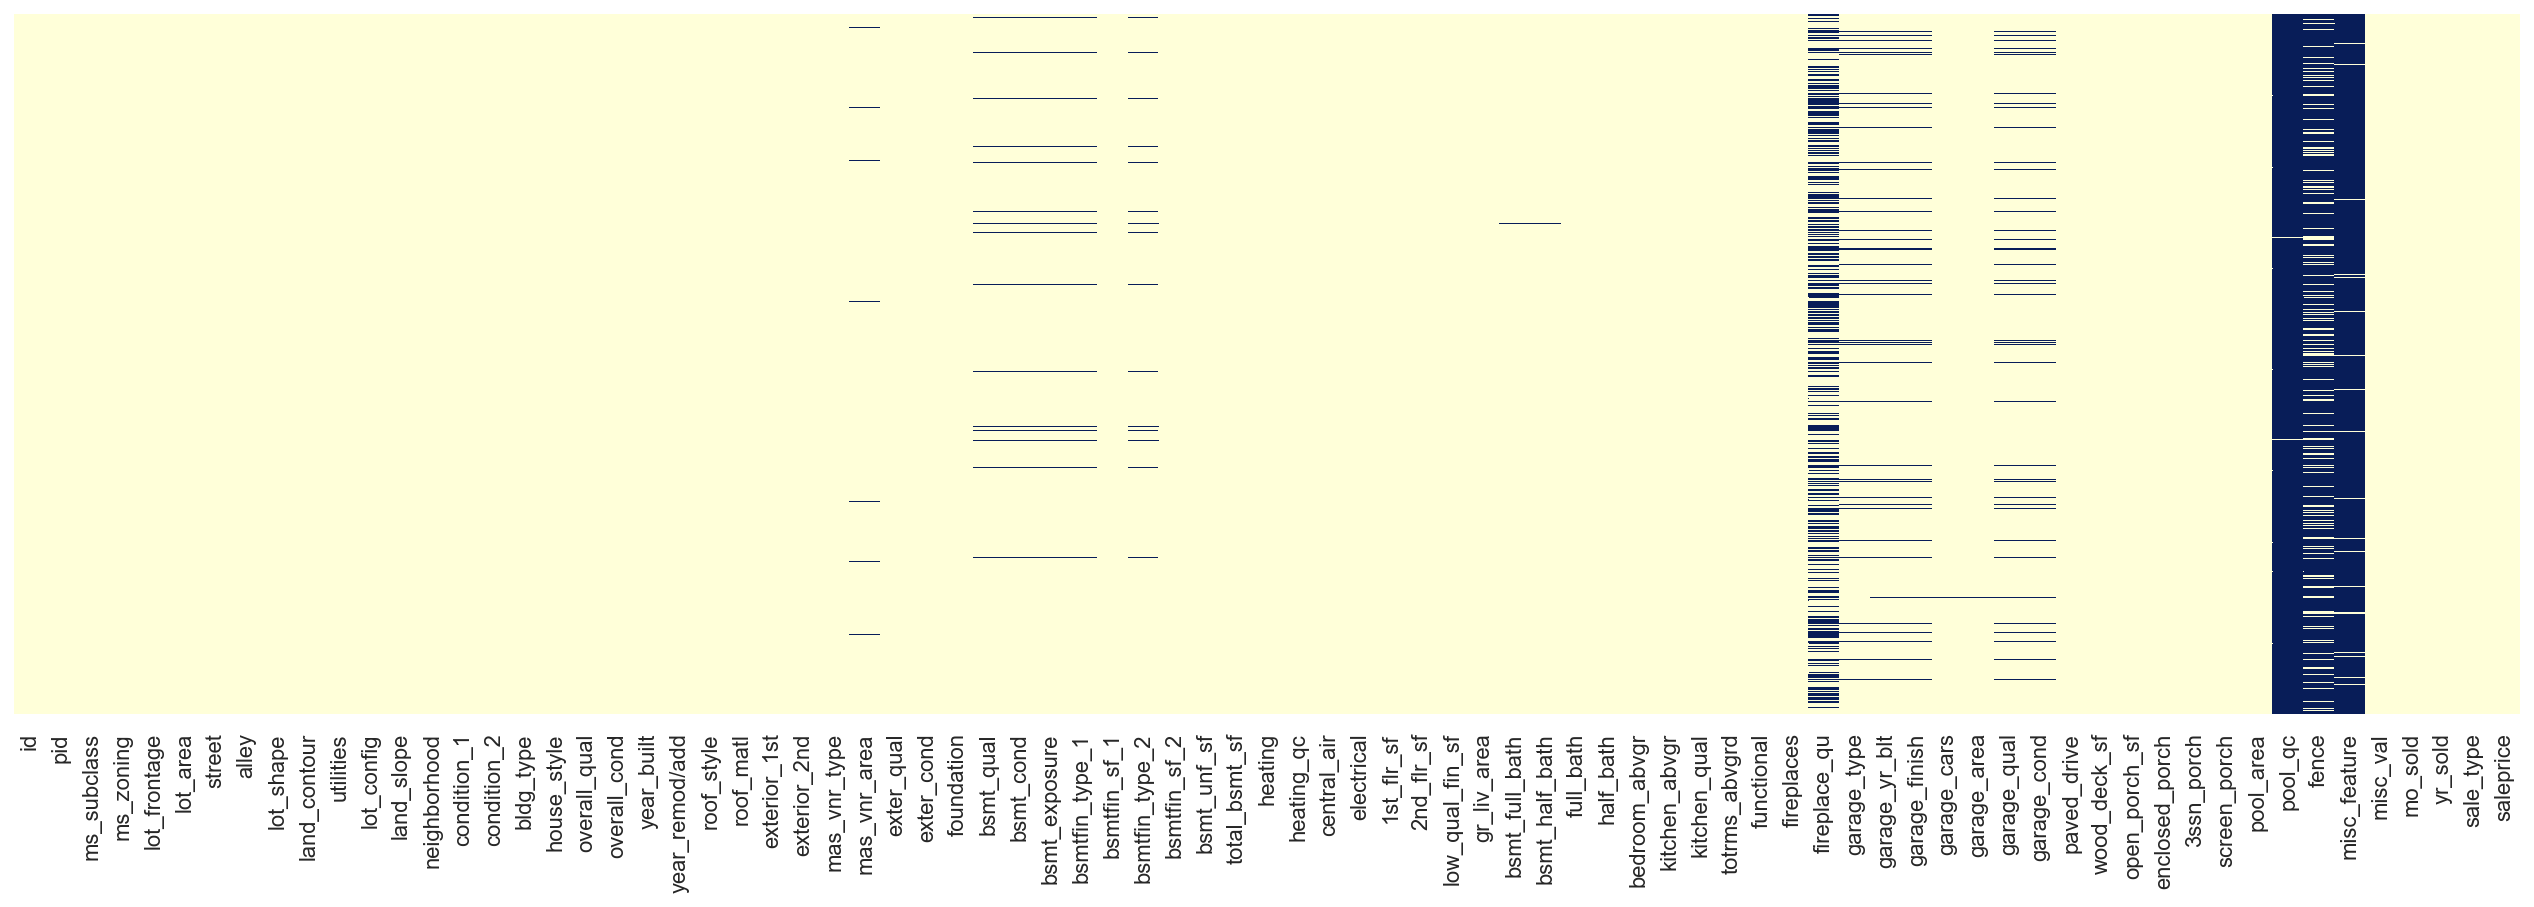

In [24]:
sns.set(font_scale=1)
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'YlGnBu')
#Mas_vnr_type is cleaned.

### REPLACING NULL VALUES:  Mas_vnr_area / Masonry veneer area in square feet
- As seen above, there are 22 missing values.
- Since there is many none value, we can just replace the 22 missing values with None. 

In [25]:
df['mas_vnr_area'].dtypes

dtype('float64')

In [26]:
df['mas_vnr_area'].value_counts()
#Mas_vnr_area seems to have many 0. We can replace the missing values to 0

0.0       1216
120.0       11
176.0       10
200.0       10
210.0        9
180.0        9
72.0         9
16.0         9
108.0        9
132.0        8
40.0         8
144.0        7
186.0        7
170.0        7
128.0        6
340.0        6
256.0        6
60.0         6
178.0        6
140.0        6
84.0         6
203.0        6
272.0        5
106.0        5
216.0        5
260.0        5
145.0        5
76.0         5
504.0        5
288.0        5
148.0        5
302.0        5
168.0        5
360.0        5
112.0        5
300.0        5
174.0        5
44.0         5
164.0        5
160.0        5
320.0        5
143.0        5
252.0        5
196.0        4
126.0        4
242.0        4
513.0        4
30.0         4
50.0         4
240.0        4
130.0        4
192.0        4
336.0        4
456.0        4
68.0         4
246.0        4
80.0         4
183.0        4
136.0        4
172.0        4
232.0        4
270.0        4
165.0        3
100.0        3
480.0        3
90.0         3
110.0     

In [27]:
df['mas_vnr_area'] = df['mas_vnr_area'].replace(np.nan, 0)

In [28]:
df['mas_vnr_area'].isnull().sum()

0

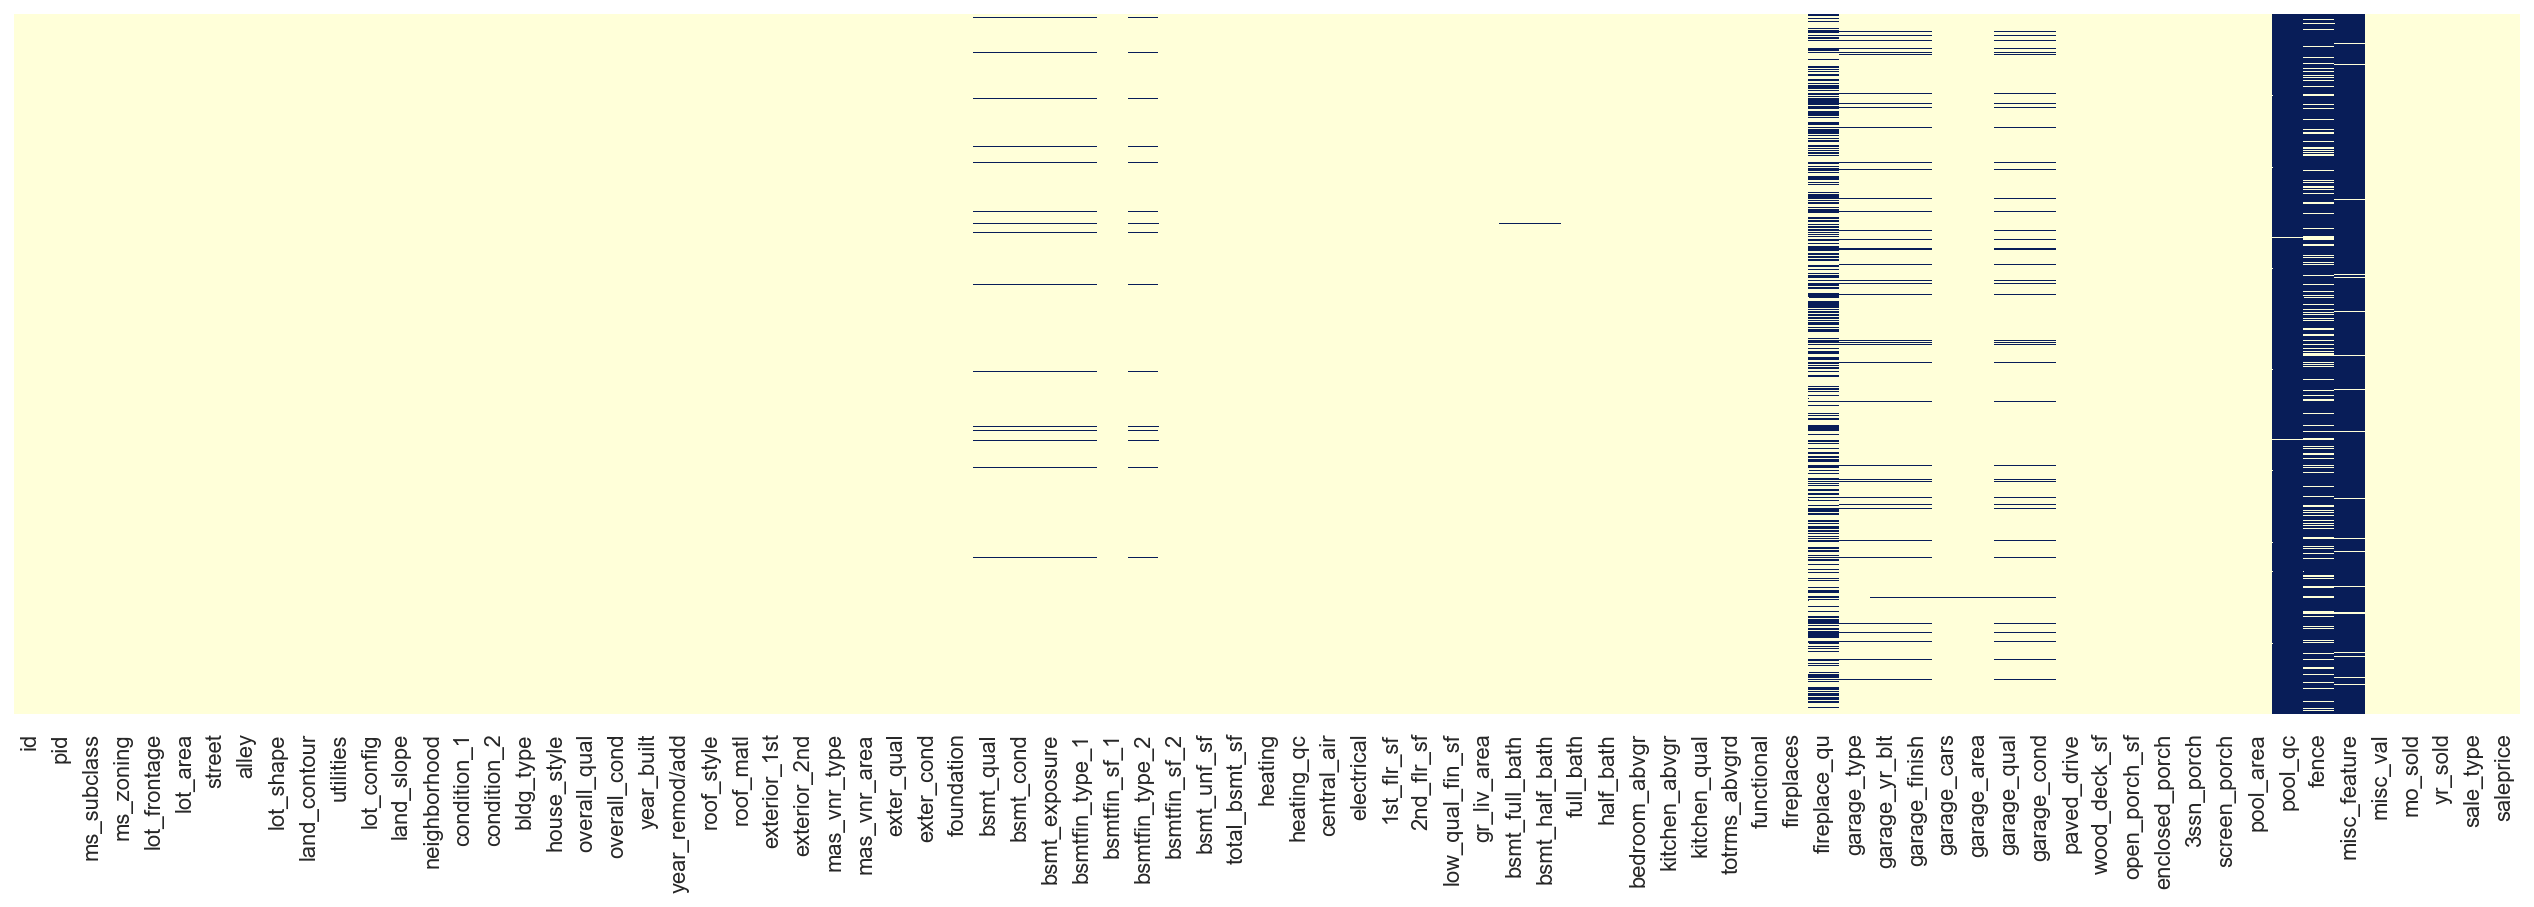

In [29]:
sns.set(font_scale=1)
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'YlGnBu');
#Mas_vnr_area is cleaned.

### REPLACING NULL VALUES: Basement related features 
- there are multiple basement related features, so we shall look at all basement features 
- However, there are different types of values (e.g. ordinal, discrete, continuous),  in each basement

In [30]:
df_bsmt = df[['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf','bsmt_full_bath',
       'bsmt_half_bath']] #place all bsmt under a temporary variable

In [31]:
for i in df_bsmt: 
    if df_bsmt[i].dtypes == 'O':
        print(f'this is ordinal:', i)
    else: 
        print (f'this is numeric', i)
        
#bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_type_2 = ordinal
#the rest is numeric 

this is ordinal: bsmt_qual
this is ordinal: bsmt_cond
this is ordinal: bsmt_exposure
this is ordinal: bsmtfin_type_1
this is numeric bsmtfin_sf_1
this is ordinal: bsmtfin_type_2
this is numeric bsmtfin_sf_2
this is numeric bsmt_unf_sf
this is numeric total_bsmt_sf
this is numeric bsmt_full_bath
this is numeric bsmt_half_bath


In [32]:
df_bsmt.isna().sum()
#Based on data dictionary, there is NA to indicate no basement. The ordinal variables seem pretty consistent in their missing data (i.e. ranging about 50 null values). 
# We can assume these values represent NA as per data dictionary. 


bsmt_qual         55
bsmt_cond         55
bsmt_exposure     58
bsmtfin_type_1    55
bsmtfin_sf_1       1
bsmtfin_type_2    56
bsmtfin_sf_2       1
bsmt_unf_sf        1
total_bsmt_sf      1
bsmt_full_bath     2
bsmt_half_bath     2
dtype: int64

In [33]:
df_bsmt_missing_ord = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 
       'bsmtfin_type_2']
df_bsmt_missing_num = ['bsmtfin_sf_2', 'bsmt_half_bath', 'bsmt_unf_sf', 'bsmt_full_bath', 'total_bsmt_sf', 'bsmtfin_sf_1']

In [34]:
for i in df_bsmt_missing_ord:
    df[i] = df[i].replace(np.nan, 'NA') 
#replace missing values in these ordinal variable to NA

for i in df_bsmt_missing_num: 
    df[i] = df[i].replace(np.nan, 0)

#replace missing values in these numeric variable to numeral 0


In [35]:
df.isnull().sum()
#checked all the basement features - basement features seems to be treated!

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage          0
lot_area              0
street                0
alley                 0
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type          0
mas_vnr_area          0
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual             0
bsmt_cond             0
bsmt_exposure         0
bsmtfin_type_1        0
bsmtfin_sf_1          0
bsmtfin_type_2        0
bsmtfin_sf_2          0
bsmt_unf_sf           0
total_bsmt_sf         0
heating               0
heating_qc      

<AxesSubplot:>

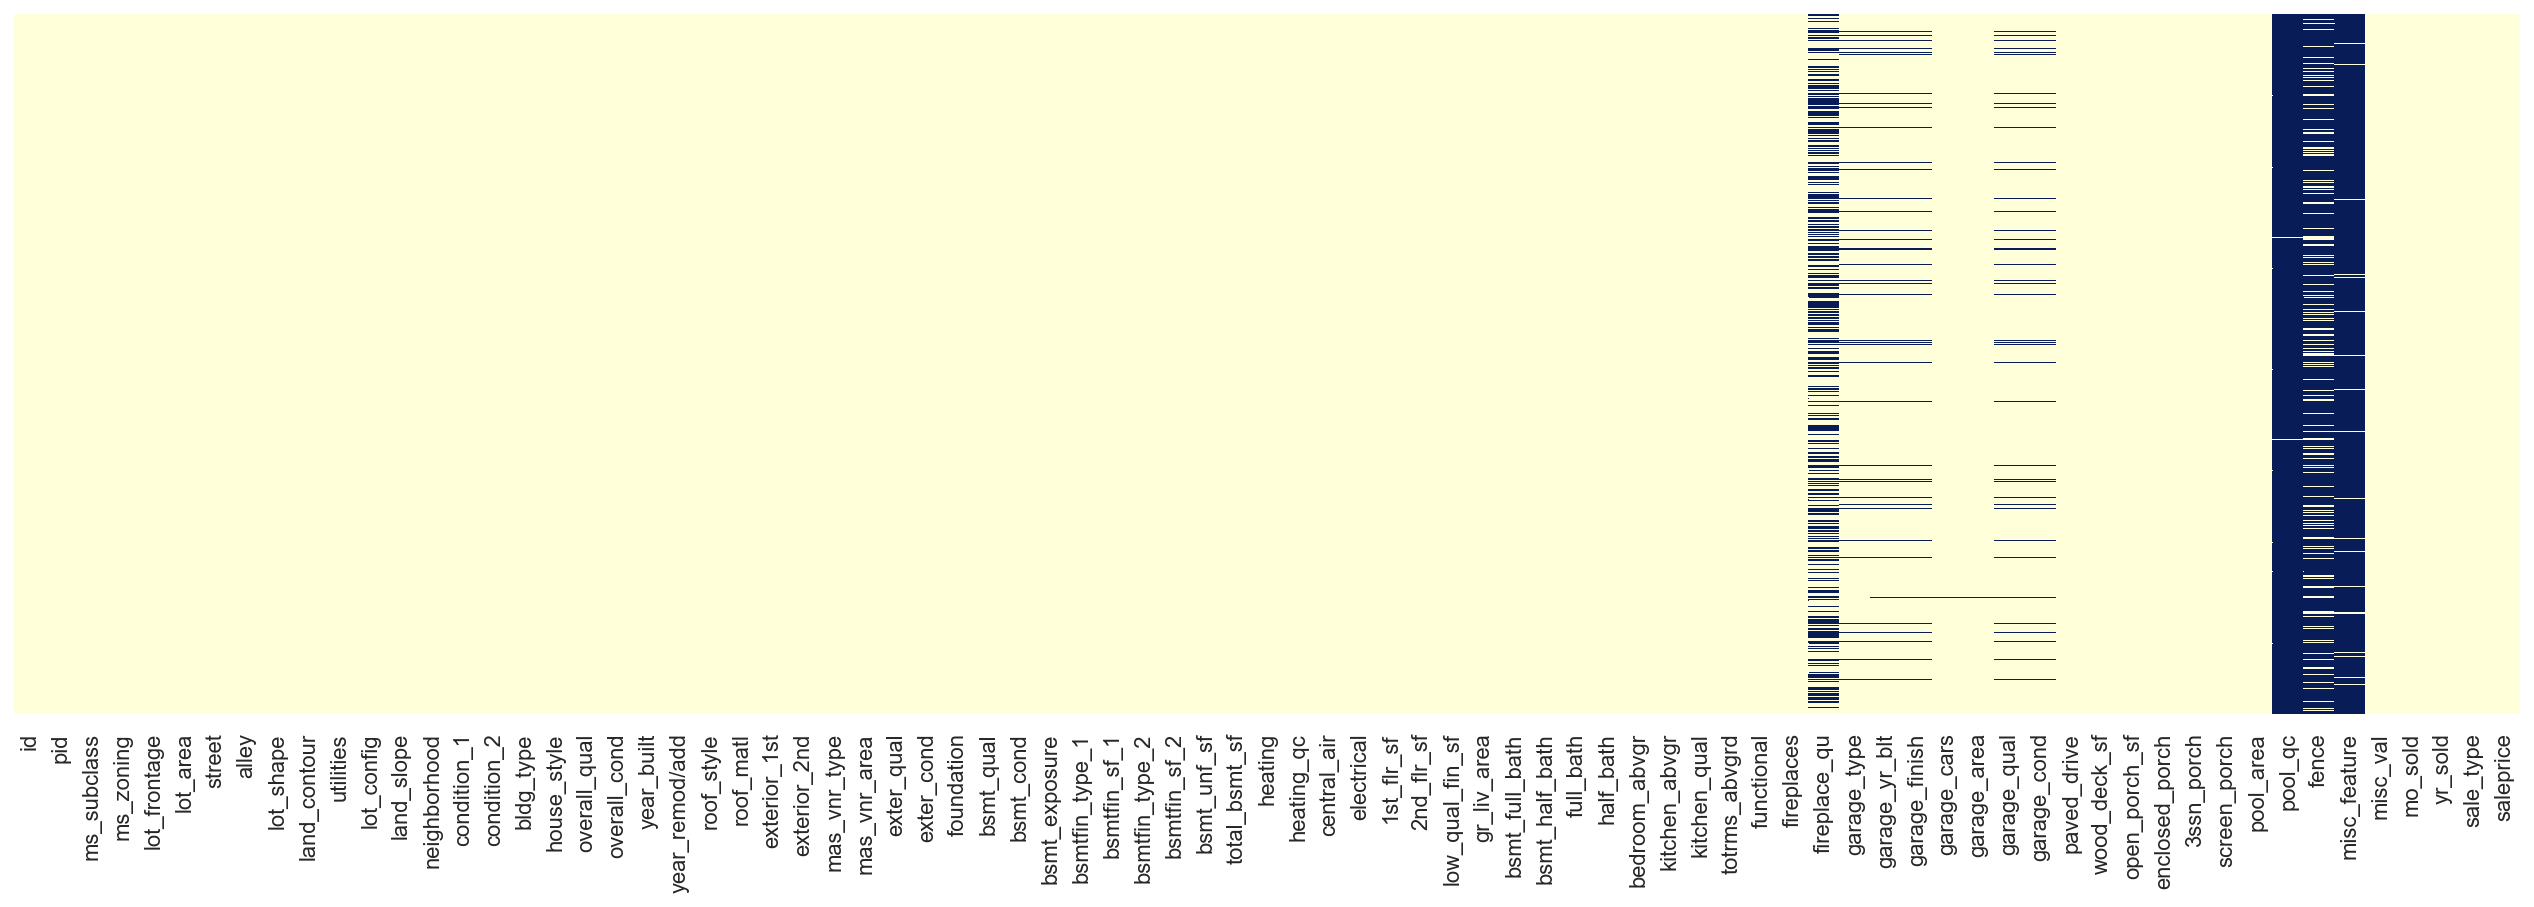

In [36]:
sns.set(font_scale=1)
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'YlGnBu')
#All basement-related features are cleaned.

### REPLACING NULL VALUES:  Fireplace quality 
- As compared to fireplaces, which has the complete values, fireplace quality seems to be missing values 
- We should compare fireplaces and fireplace quality to see whether there's some link in understanding why the data is missing 

In [37]:
df['fireplace_qu'].isnull().sum()
#1000 missing values. 
#do these missing values represent 

1000

In [38]:
df['fireplaces'].value_counts()
# 0 = no fireplaces. Seems to match the number of missing fireplace quality (which could be NA)

0    1000
1     898
2     146
3       6
4       1
Name: fireplaces, dtype: int64

In [39]:
len(df[(df['fireplace_qu'].isnull()) & (df['fireplaces'] < 1)])
#the missing values and  seem to match 

1000

In [40]:
df['fireplace_qu'] = df['fireplace_qu'].replace(np.nan, 'NA')
#replace nan with NA to indicate that there is no fireplace.

In [41]:
df['fireplace_qu'].isnull().sum()

0

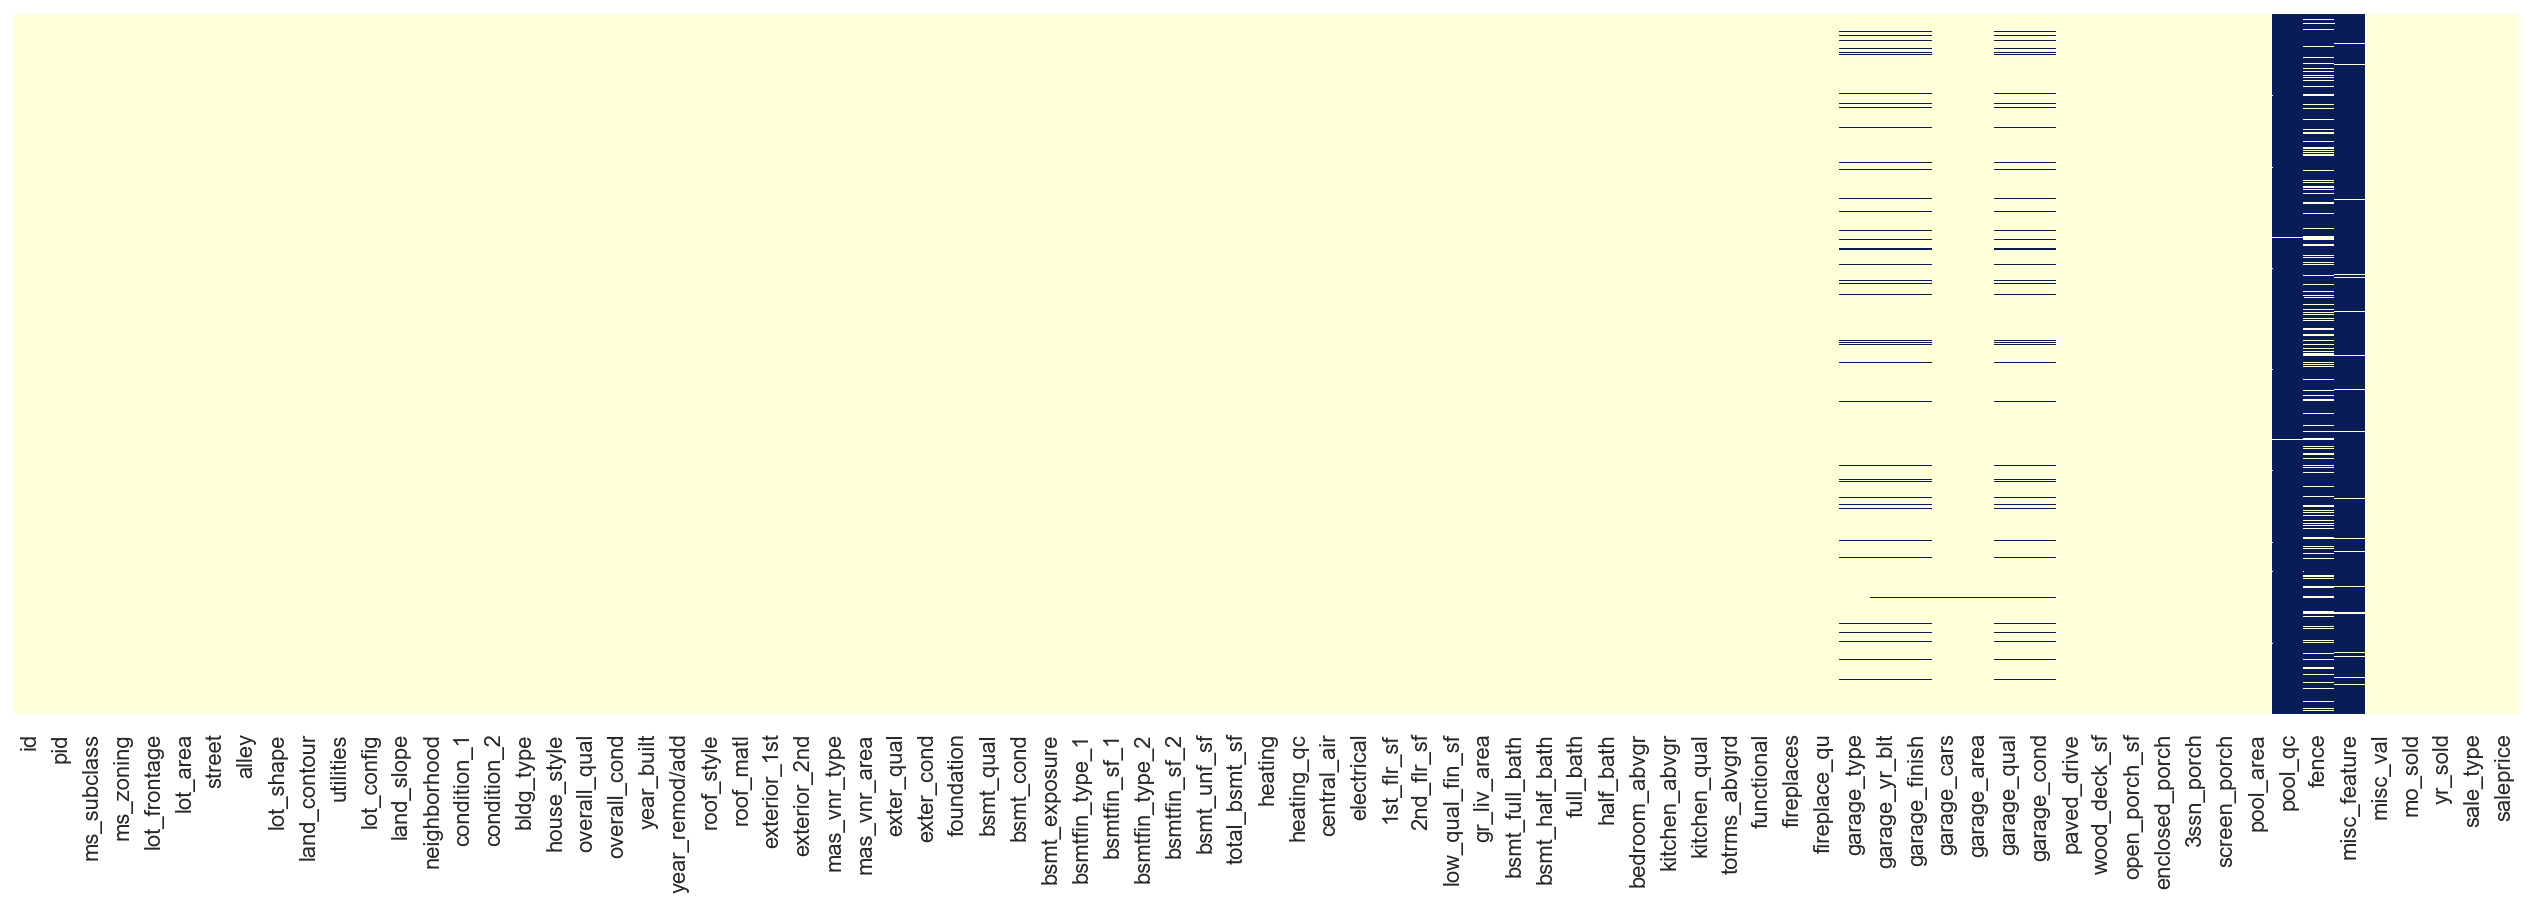

In [42]:
sns.set(font_scale=1)
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'YlGnBu');
#fireplace quality features are cleaned.

### REPLACING NULL VALUES:  Garage related features 
- garage_type         113 null values
- garage_yr_blt       114 null values
- garage_finish       114 null values
- garage_cars           1 null values
- garage_area           1 null values
- garage_qual         114 null values
- garage_cond         114 null values

In [43]:
garage_feat = df[['garage_type', 'garage_yr_blt', 'garage_finish',
                'garage_cars', 'garage_area', 'garage_qual', 
                'garage_cond']]

In [44]:
for i in garage_feat: 
    if garage_feat[i].dtypes == 'O':
        print(f'this is ordinal:', i)
    else: 
        print (f'this is numeric', i)

this is ordinal: garage_type
this is numeric garage_yr_blt
this is ordinal: garage_finish
this is numeric garage_cars
this is numeric garage_area
this is ordinal: garage_qual
this is ordinal: garage_cond


In [45]:
garage_missing_ord = ['garage_type','garage_finish','garage_qual','garage_cond']
garage_missing_num = ['garage_yr_blt','garage_cars', 'garage_area']

for i in garage_missing_ord:
    df[i] = df[i].replace(np.nan, 'NA') 

#create two lists, one for catagorical and one for numeric


In [46]:
df.isnull().sum()
#the values in garage_missing_ord is settled. 

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage          0
lot_area              0
street                0
alley                 0
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type          0
mas_vnr_area          0
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual             0
bsmt_cond             0
bsmt_exposure         0
bsmtfin_type_1        0
bsmtfin_sf_1          0
bsmtfin_type_2        0
bsmtfin_sf_2          0
bsmt_unf_sf           0
total_bsmt_sf         0
heating               0
heating_qc      

- Garage_yr_blt, garage_cars and garage_area has 114, 1 and 1 missing values respectively.

In [47]:
len(df[(df['garage_yr_blt'].isnull()) & (df['garage_type'] == 'NA')])
#113 missing values are accounted for, so we can replace these 113 missing values with 0. 
#but garage_yr_blt has 114 -113 = 1 missing value?

113

In [48]:
df.loc[(df['garage_yr_blt'].isnull()) & (df['garage_type'])]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
28    2243  911103060          190   C (all)     75.000000      8250   Pave   
53     330  923226250          160        RM     21.000000      1476   Pave   
65    2278  923202134           20        RL     70.000000      8402   Pave   
79    2235  910201050           50        RM     50.000000      7288   Pave   
101   2084  905476170           30        RL     58.000000      9098   Pave   
103    728  902477130           30   C (all)     72.000000      9392   Pave   
114    781  905228050           20        RL     83.245552      9000   Pave   
120   1492  908127120           30        RL     63.000000     13907   Pave   
134   1514  909100170           30        RL     67.000000      5604   Pave   
136    216  905101100           50        RL     54.000000      6342   Pave   
139    204  903426200           70        RM     60.000000     12900   Pave   
162    754  903430070           90        RM     50.000000      3000   Pave   
235    698  902105060           70        RM     90.000000      9900   Pave   
256   2745  905477010           20        RL     77.000000      8335   Pave   
260    131  534451150           30        RL     55.000000      5350   Pave   
264    615  534450150           30        RL     50.000000      5330   Pave   
276   2824  908130020           20        RL     75.000000      8050   Pave   
334   2846  909131125          190        RH     66.952780      7082   Pave   
356    943  911103050           50   C (all)    105.000000      8470   Pave   
382    753  903430060           75        RM     92.000000      5520   Pave   
406   2369  527451200          160        RM     21.000000      1680   Pave   
409   2034  903454010           70        RM     60.000000      6882   Pave   
426   2882  911175440          190   C (all)     50.000000      9000   Pave   
437   1501  908201100           90        RL     65.000000      6040   Pave   
445   2635  535478110          190        RL     70.000000      7000   Pave   
457   1951  535379110           70        RL     60.000000     10800   Pave   
486   1318  902328040           75        RM     35.000000      6300   Pave   
530    900  908275040           90        RL     65.000000     10926   Pave   
542   1376  904351280          190        RL     62.000000     10106   Pave   
555   1366  903458110           50        RM     66.952780      7920   Pave   
562    187  902401060          190        RM    100.000000      9045   Pave   
579    218  905101310           90        RL     72.000000     10778   Pave   
580   1504  908204160           90        RL     74.000000      6845   Pave   
612   2670  902456015           50   C (all)     63.000000      4761   Pave   
636   2174  908127100           90        RL     81.000000     11841   Grvl   
653   1417  905480150           50        RL     60.000000      9600   Pave   
663   2187  908225310           90        RL     52.000000      8741   Pave   
689   1415  905477050          190        RL     70.000000      7000   Pave   
692   2883  911225110           50   C (all)     60.000000      8520   Grvl   
700    207  903454060          190        RM     70.000000      5600   Pave   
705   1292  902109080          190        RM     63.000000     11426   Pave   
708   2875  910203100           30        RM     61.000000      8534   Pave   
722   1135  531375050           20        RL     63.000000     13072   Pave   
736    172  902106130           30        RM     56.000000      4485   Pave   
741   2471  531363080           20        RL     74.000000      7733   Pave   
783   2621  535450180           50        RL     60.000000     10800   Pave   
787   1600  923228080          160        RM     21.000000      1477   Pave   
791    763  904301060           90        RL     60.000000     10800   Pave   
814   1515  909101060           30        RL     45.000000      8248   Pave   
822   1516  909101180          190        RL     55.000000

Since there is only 1 missing values from each variable in Garage_yr_blt, garage_cars and garage_area, we can just replace all the values with 0

In [49]:
for i in garage_missing_num:
    df[i] = df[i].replace(np.nan, 0) 

In [50]:
df.isnull().sum()
#the values in garage_missing_num is settled. 

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage          0
lot_area              0
street                0
alley                 0
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type          0
mas_vnr_area          0
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual             0
bsmt_cond             0
bsmt_exposure         0
bsmtfin_type_1        0
bsmtfin_sf_1          0
bsmtfin_type_2        0
bsmtfin_sf_2          0
bsmt_unf_sf           0
total_bsmt_sf         0
heating               0
heating_qc      

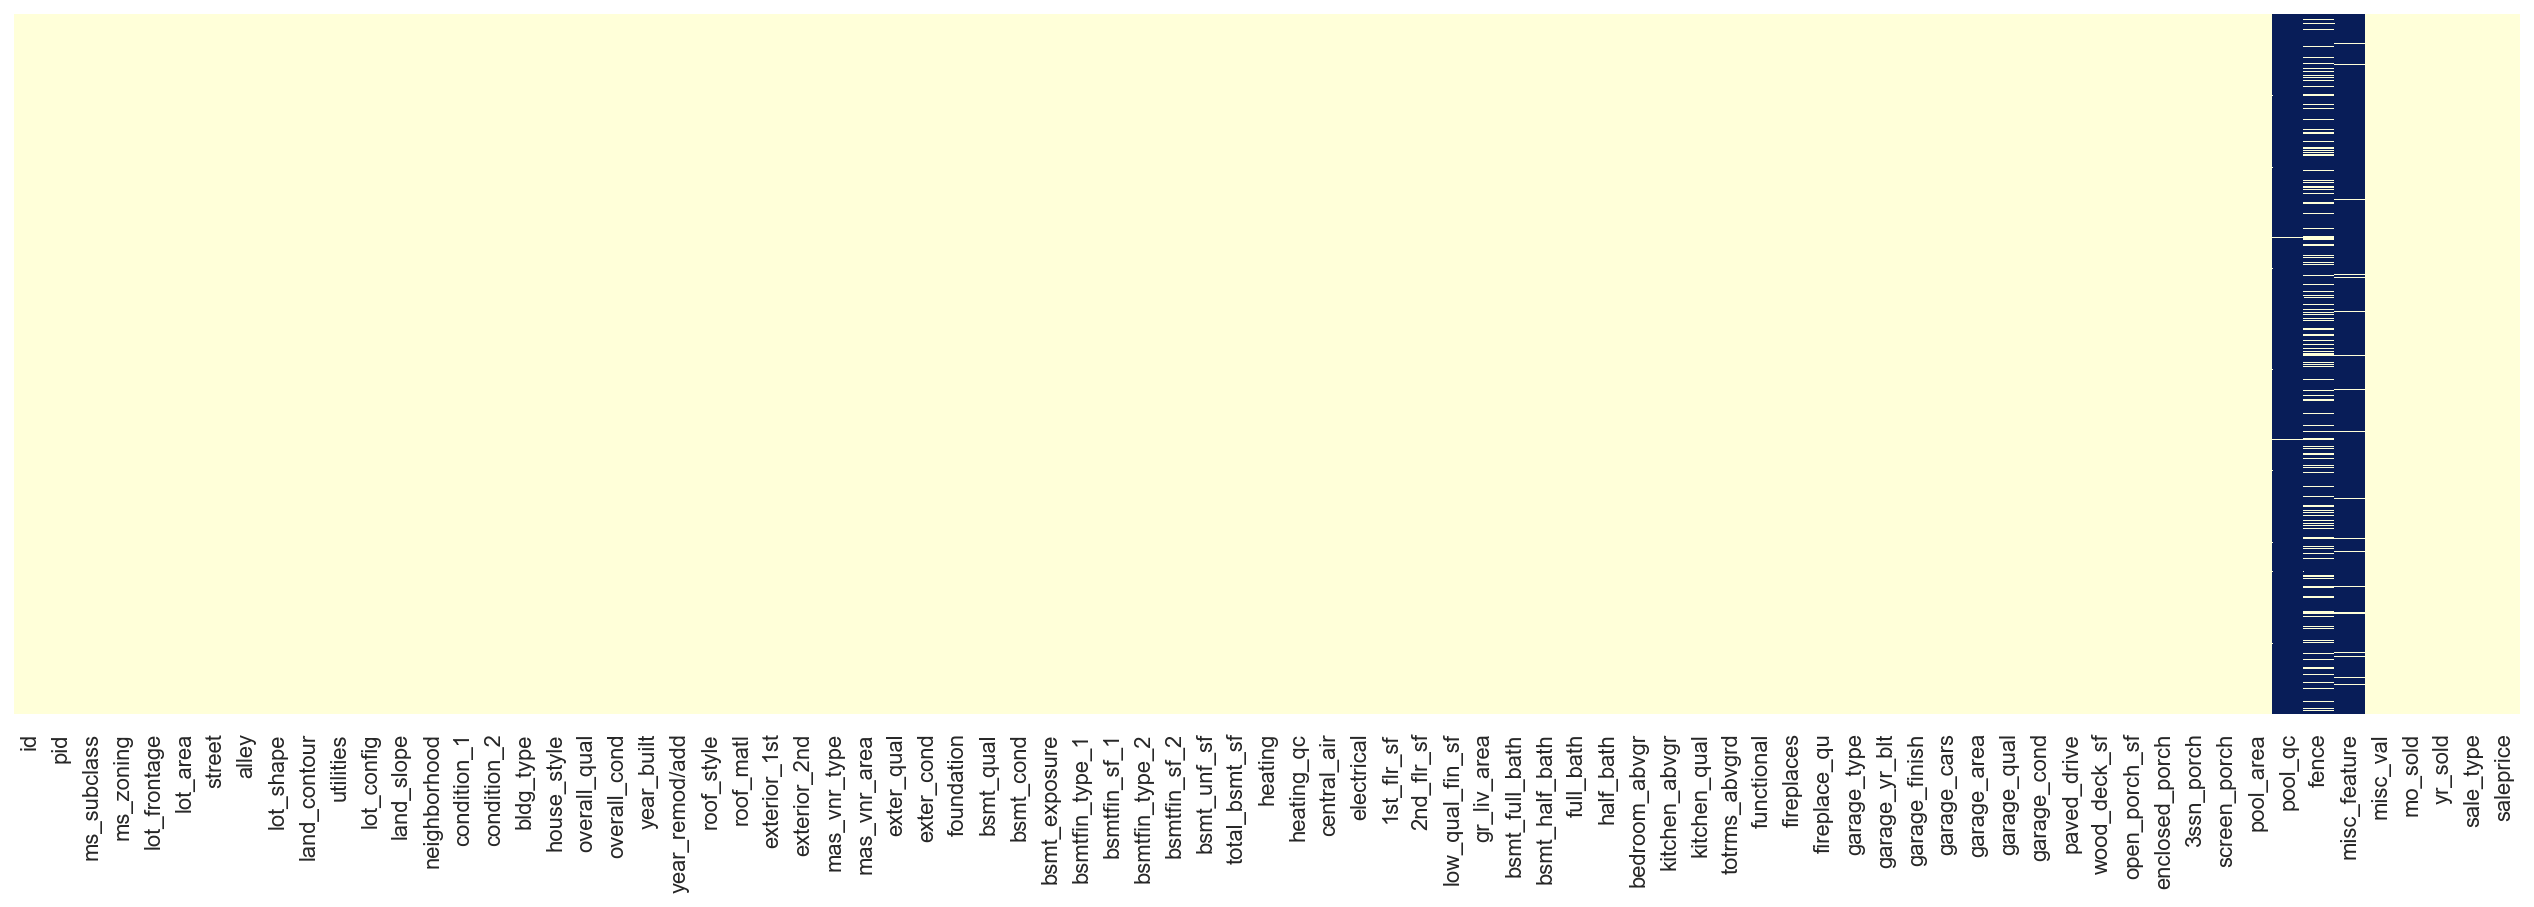

In [51]:
sns.set(font_scale=1)
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'YlGnBu');
#Garage features are cleaned.

### REPLACING NULL VALUES:  Pool features 
pool_qc - 2042 null values

In [52]:
print(df['pool_qc'].isnull().sum())
df['pool_qc'].value_counts()
#number of missing values in pool_qc, there's only 9 pools

2042


Gd    4
Fa    2
TA    2
Ex    1
Name: pool_qc, dtype: int64

In [53]:
df['pool_qc'].value_counts().index

Index(['Gd', 'Fa', 'TA', 'Ex'], dtype='object')

In [54]:
df[df['pool_qc'].isna() == False].T
#these are the 9 specific houses with pool qc ratings. 

52         657        761        952        960   \
id                    2351       1567       2499       2231       1499   
pid              527356020  914475020  532476050  909475230  908154235   
ms_subclass             60         80         80         20         60   
ms_zoning               RL         RL         RL         RL         RL   
lot_frontage          80.0       76.0      100.0       70.0      313.0   
lot_area             16692       9880      14330      18044      63887   
street                Pave       Pave       Pave       Pave       Pave   
alley                   NA         NA         NA         NA         NA   
lot_shape              IR1        Reg        IR1        IR1        IR3   
land_contour           Lvl        Lvl        Low        HLS        Bnk   
utilities           AllPub     AllPub     AllPub     AllPub     AllPub   
lot_config          Inside     Inside     Corner    CulDSac     Corner   
land_slope             Gtl        Gtl        Gtl        Gtl        Gtl   
neighborhood        NWAmes    Mitchel    Veenker    Crawfor    Edwards   
condition_1           RRAn       Norm       Norm       Norm      Feedr   
condition_2           Norm       Norm       Norm       Norm       Norm   
bldg_type             1Fam       1Fam       1Fam       1Fam       1Fam   
house_style         2Story       SLvl       SLvl     1Story     2Story   
overall_qual             7          6          7          8         10   
overall_cond             5          6          4          5          5   
year_built            1978       1977       1974       1986       2008   
year_remod/add        1978       1977       1974       1986       2008   
roof_style           Gable      Gable      Gable      Gable        Hip   
roof_matl          CompShg    CompShg    CompShg    CompShg    ClyTile   
exterior_1st       Plywood    Plywood    WdShing    WdShing     Stucco   
exterior_2nd       Plywood    Plywood    Wd Sdng    Plywood     Stucco   
mas_vnr_type       BrkFace       None    BrkFace       None      Stone   
mas_vnr_area         184.0        0.0      145.0        0.0      796.0   
exter_qual              TA         TA         Gd         Gd         Ex   
exter_cond              TA         TA         Fa         TA         TA   
foundation          CBlock     CBlock     CBlock     CBlock      PConc   
bsmt_qual               Gd         TA         Gd         Gd         Ex   
bsmt_cond               TA         TA         TA         TA         TA   
bsmt_exposure           No         Av         Gd         No         Gd   
bsmtfin_type_1         BLQ        ALQ        ALQ        Unf        GLQ   
bsmtfin_sf_1         790.0      522.0     1023.0        0.0     5644.0   
bsmtfin_type_2         LwQ        Unf        BLQ        Unf        Unf   
bsmtfin_sf_2         469.0        0.0      497.0        0.0        0.0   
bsmt_unf_sf          133.0      574.0      228.0      279.0      466.0   
total_bsmt_sf       1392.0     1096.0     1748.0      279.0     6110.0   
heating               GasA       GasA       GasA       GasA       GasA   
heating_qc              TA         TA         Gd         Gd         Ex   
central_air              Y          Y          Y          Y          Y   
electrical           SBrkr      SBrkr      SBrkr      SBrkr      SBrkr   
1st_flr_sf            1392       1118       2151       2726       4692   
2nd_flr_sf            1392          0        495          0        950   
low_qual_fin_sf          0          0          0          0          0   
gr_liv_area           2784       1118       2646       2726       5642   
bsmt_full_bath         1.0        1.0        1.0        0.0        2.0   
bsmt_half_bath         0.0        0.0        2.0        0.0        0.0   
full_bath                3          1          2          2          2   
half_bath                1          0          0          1          1   
bedroom_abvgr            5          3          3          2          3   
kitchen_abvgr            1

In [55]:
df['pool_area'].value_counts()
# the number of '0' values in pool_area coincide with pool_qc

0      2042
228       1
368       1
480       1
576       1
648       1
738       1
800       1
519       1
561       1
Name: pool_area, dtype: int64

In [56]:
for i in df[(df['pool_qc'].isnull()) & (df['pool_area'] == 0)]:
    df['pool_qc'] = df['pool_qc'].replace(np.nan, 'NA')     

In [57]:
df['pool_qc'].isnull().sum()

0

In [58]:
df['pool_qc'].value_counts().index
#To check that there is a 'NA' value now. 

Index(['NA', 'Gd', 'Fa', 'TA', 'Ex'], dtype='object')

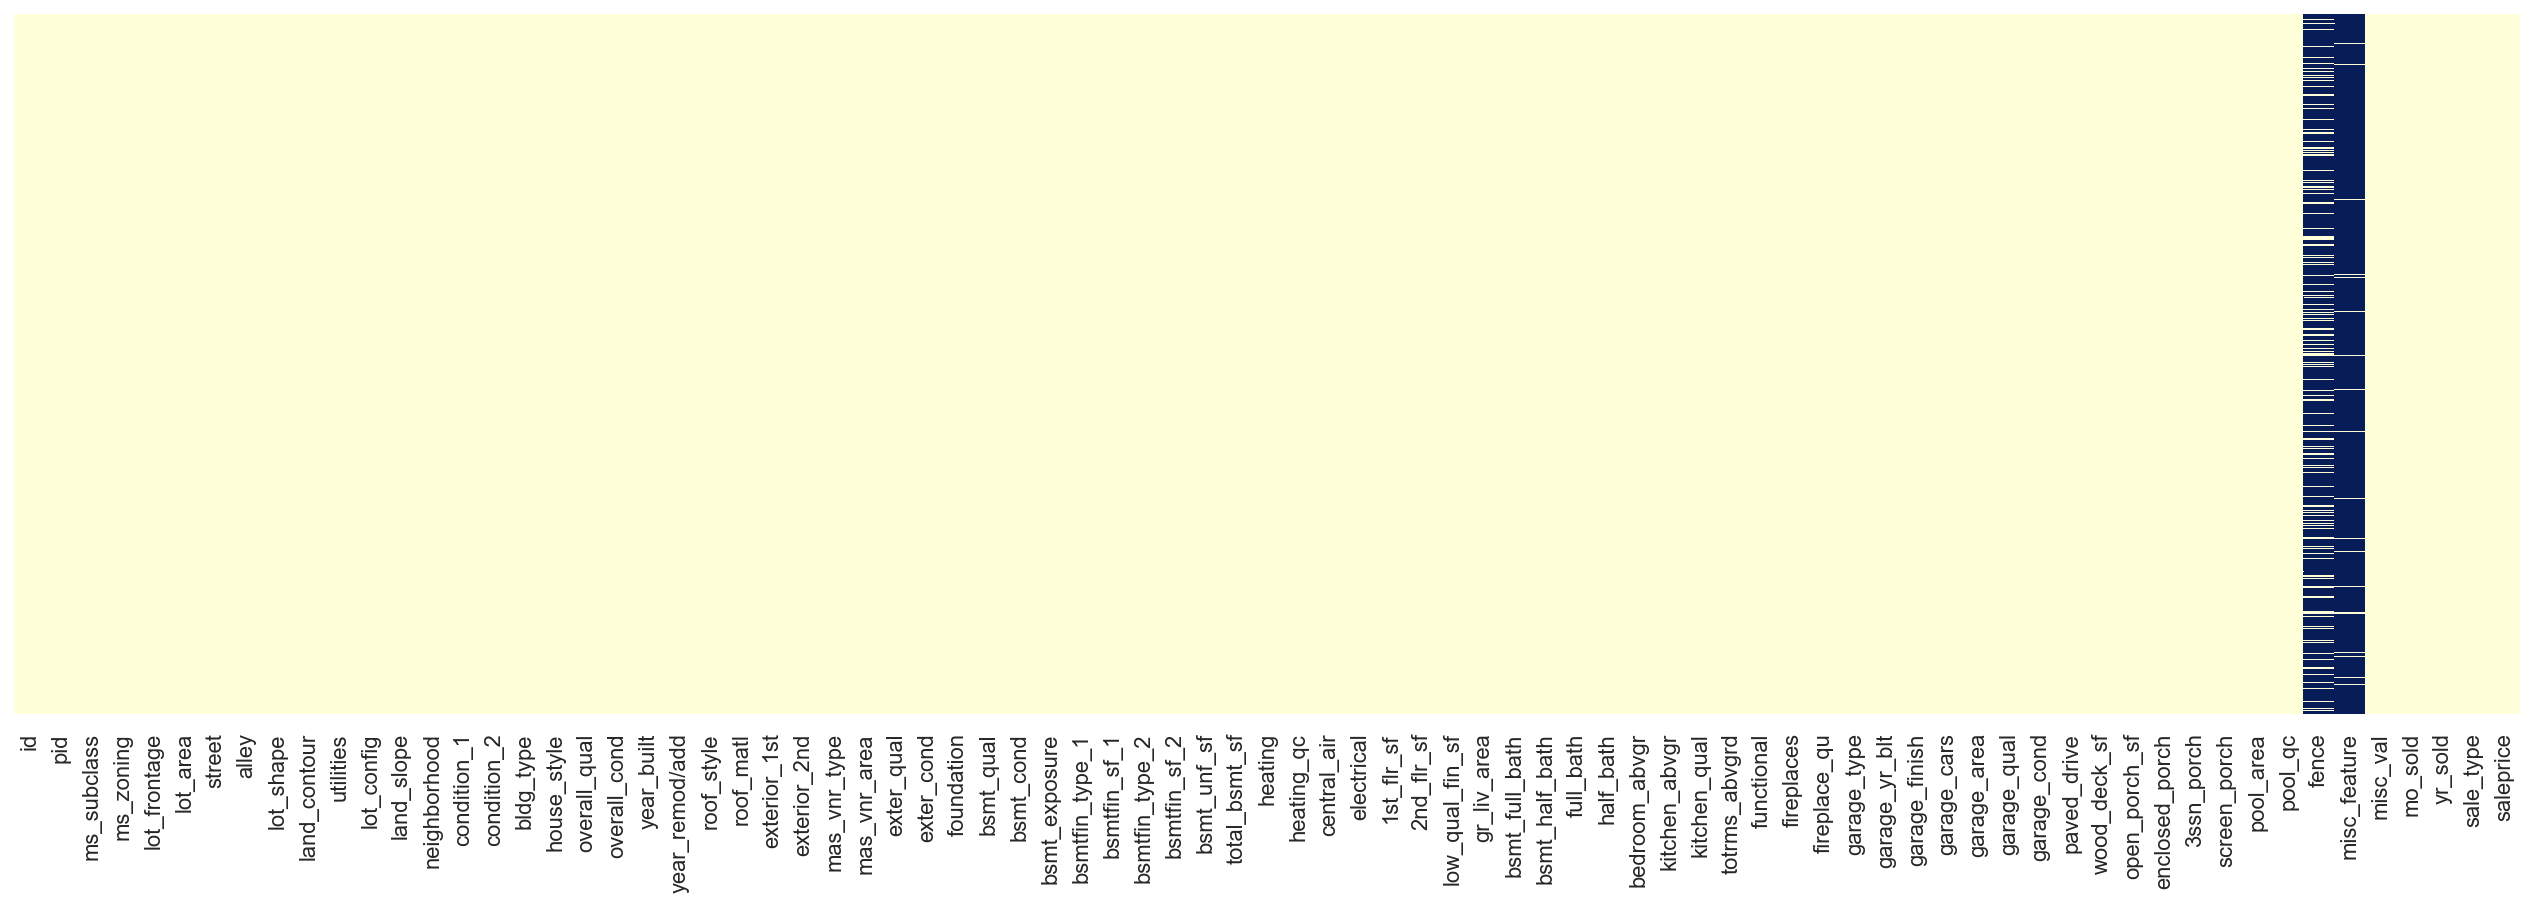

In [59]:
sns.set(font_scale=1)
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'YlGnBu');
#Pool features are cleaned.

### REPLACING NULL VALUES:  Fence features 
fence - 1651 null values

In [60]:
df['fence'].isnull().sum()

1651

In [61]:
df['fence'] = df['fence'].replace(np.nan, 'NA')

In [62]:
df['fence'].value_counts().index
#To check that there is a 'NA' value now. 

Index(['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype='object')

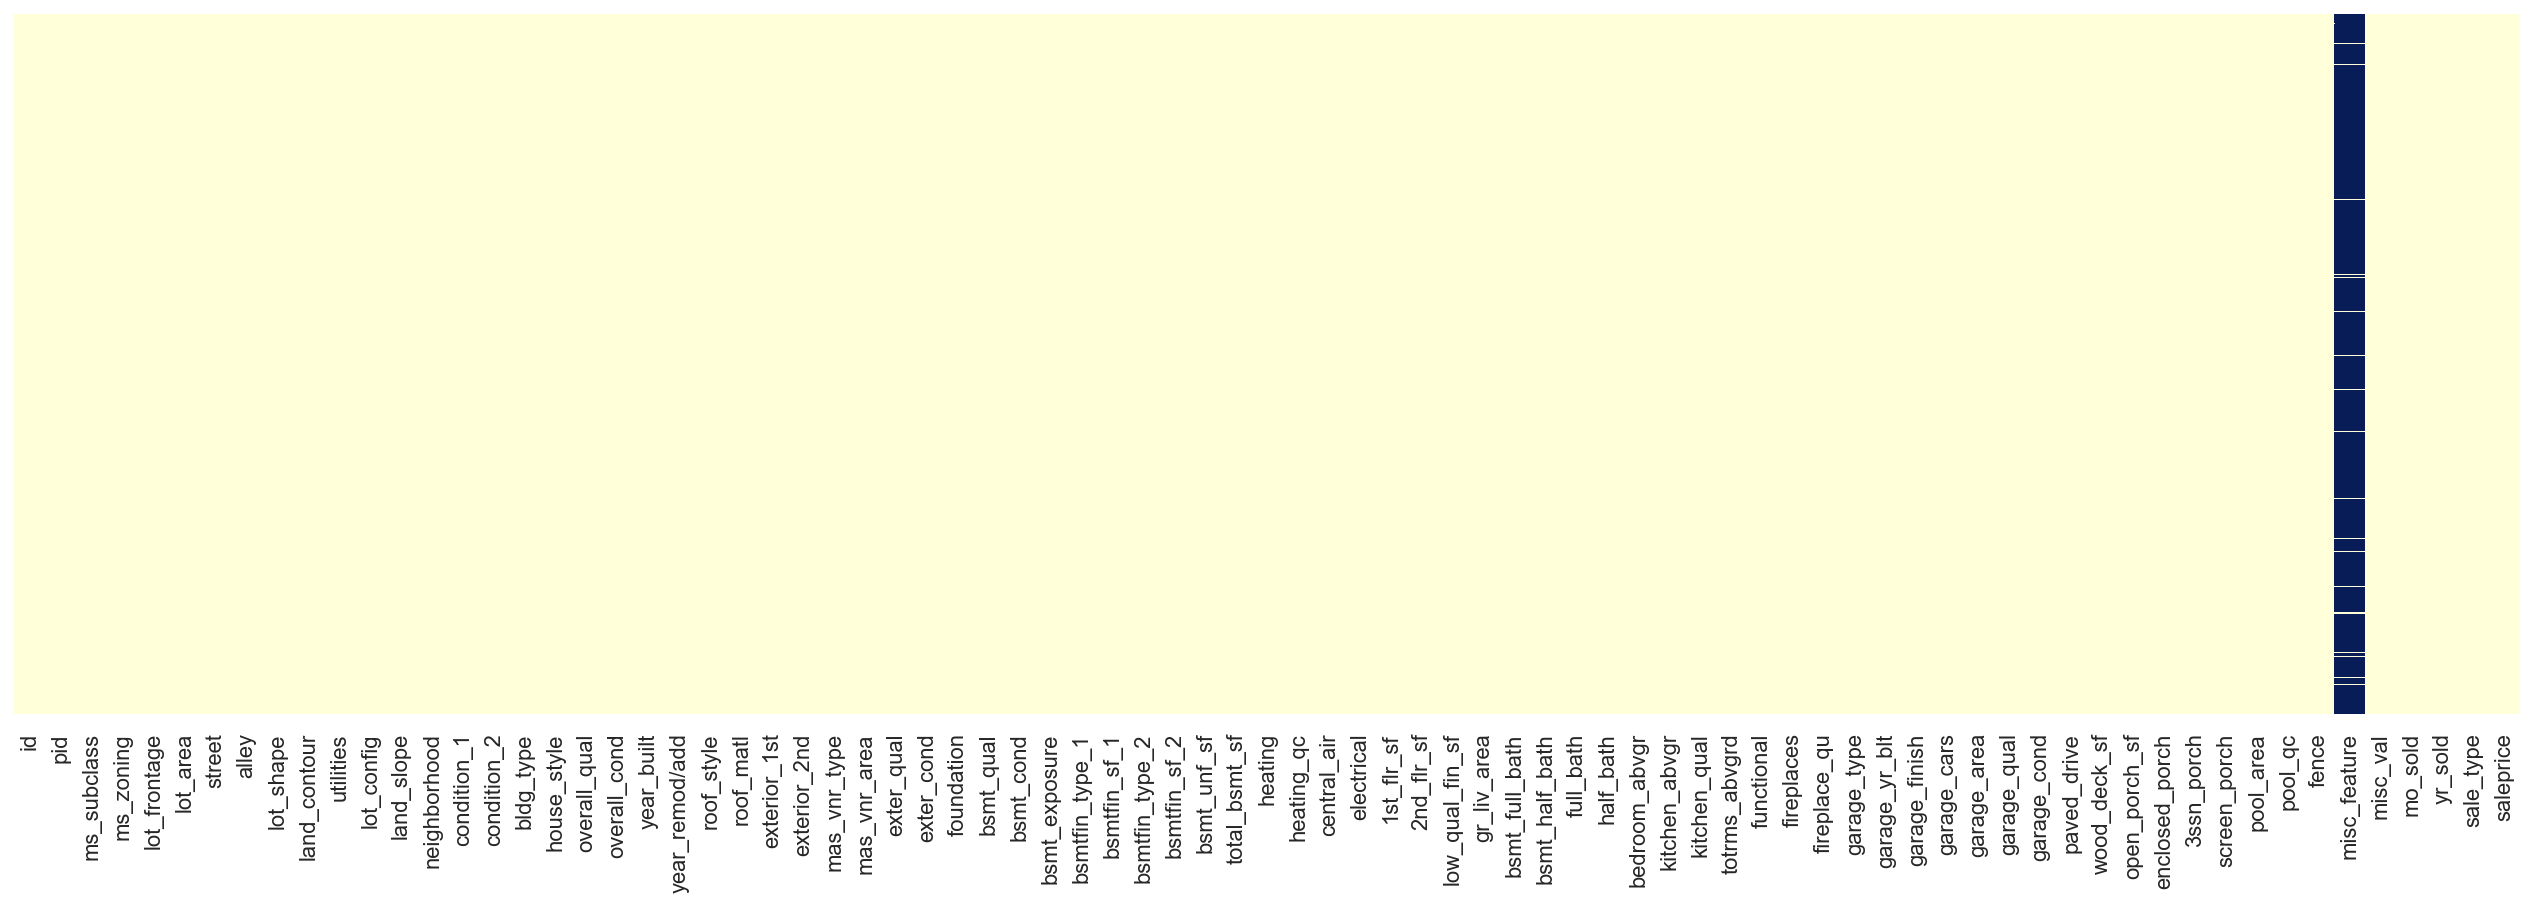

In [63]:
sns.set(font_scale=1)
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'YlGnBu');
#Fence feature is cleaned.

### REPLACING NULL VALUES:  Misc features 
Misc - 1986 null values

In [64]:
df['misc_feature'].isnull().sum()

1986

In [65]:
for i in df[(df['misc_feature'].isna()) & (df['misc_val'] == 0)]:
    df['misc_feature'] = df['misc_feature'].replace(np.nan, 'NA')
#this is done to ensure that the missing values in misc_feature tallies with misc_values, and that the replace only those who's values is definitely NA

In [66]:
df['misc_feature'].isnull().sum()

0

In [67]:
df['misc_feature'].value_counts().index
# To check whether 'NA' value shows up

Index(['NA', 'Shed', 'Gar2', 'Othr', 'Elev', 'TenC'], dtype='object')

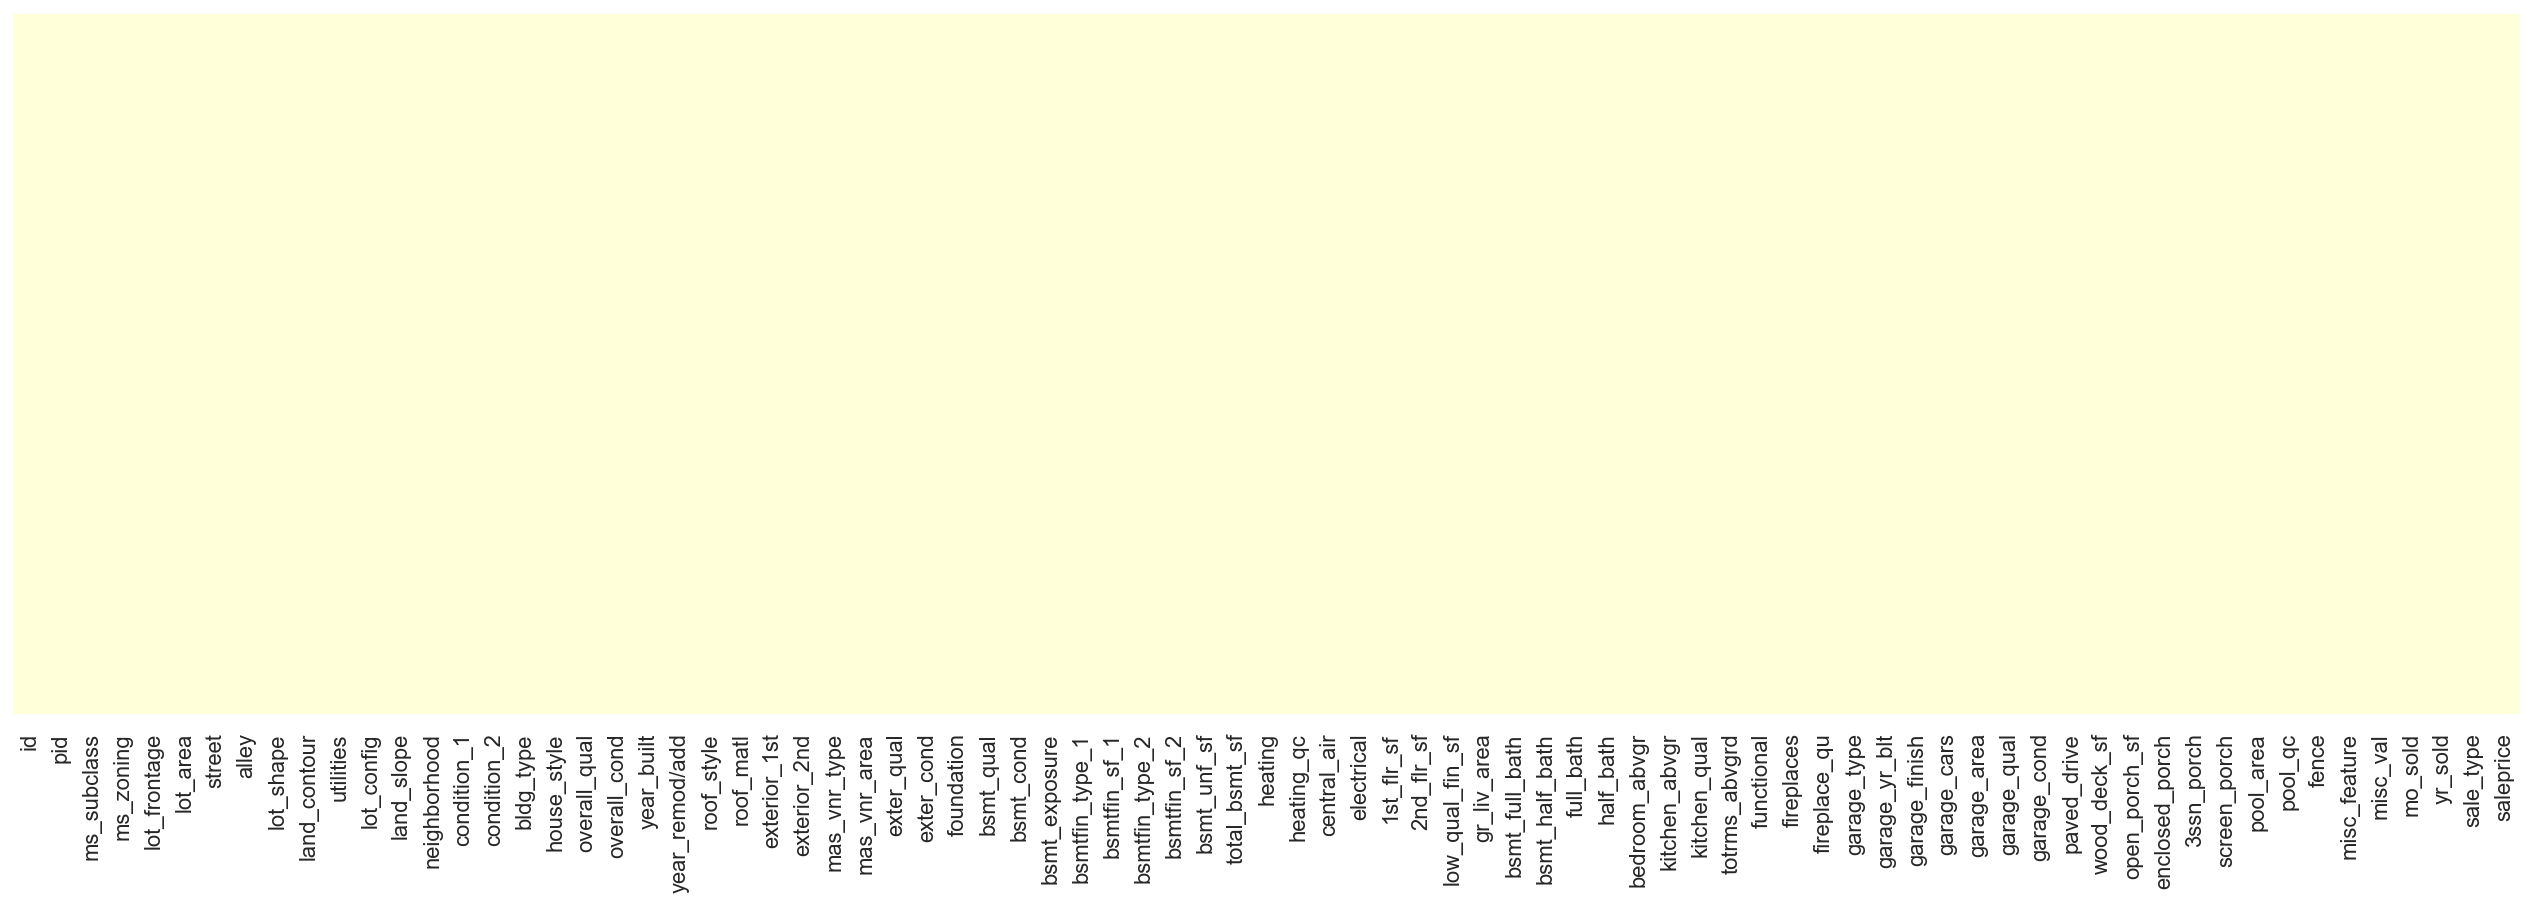

In [68]:
sns.set(font_scale=1)
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'YlGnBu');
#Misc_feature is cleaned.
#The missing data in this dataframe is cleaned up! 

## Confirmatory check on whether dataframe still missing data

In [69]:
df.isnull().sum()

id                 0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area  

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


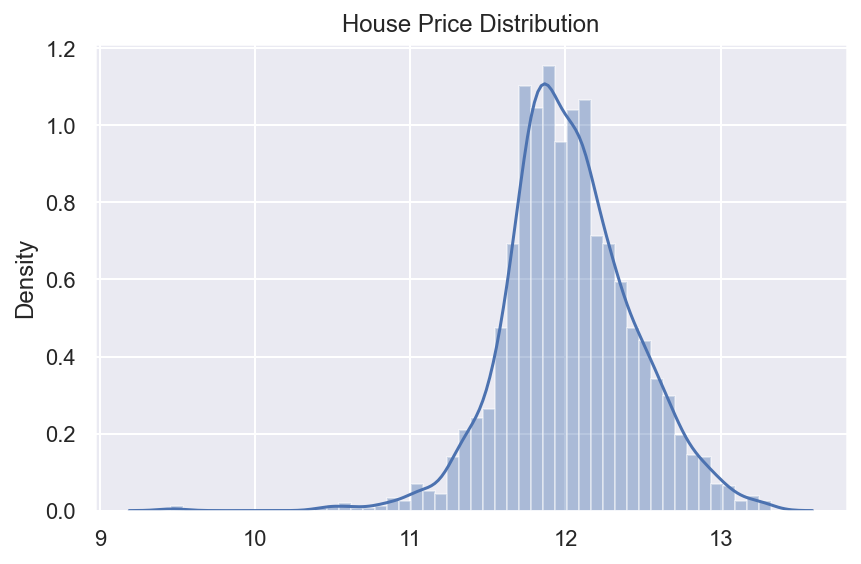

In [70]:
sns.distplot(bins = 50, x= np.log(df['saleprice']))
title = plt.title("House Price Distribution");

## Grouping by dtypes
- This would help with differentiating the data based on the type of columns
- From the data dictionary, the data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers). 

In [71]:
df_identifiers = df[['id', 'pid']]

In [72]:
df_nominal = df[['ms_subclass','ms_zoning','street','alley','land_contour','lot_config','neighborhood','condition_1',
       'condition_2','bldg_type','house_style','roof_style','roof_matl', 'exterior_1st', 'exterior_2nd','mas_vnr_type',
        'foundation','heating','central_air','garage_type','misc_feature','sale_type'     
]] 
# excluding pid

In [73]:
df_ordinal = df[['lot_shape','utilities','land_slope','overall_qual','overall_cond','exter_qual', 
                 'exter_cond','bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual',
                'functional','fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence']]

In [74]:
df_continuousnum = df[['lot_frontage', 'lot_area','year_built', 'year_remod/add','mas_vnr_area','bsmtfin_sf_2', 'bsmt_unf_sf', 
                'total_bsmt_sf','1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr','totrms_abvgrd','fireplaces','garage_yr_blt','garage_cars', 'garage_area','wood_deck_sf', 'open_porch_sf',
       'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area','misc_val','yr_sold']]

In [75]:
corr_mat = df.corr().saleprice.sort_values(ascending=False)
corr_mat.head(11)


saleprice         1.000000
overall_qual      0.800207
gr_liv_area       0.697038
garage_area       0.649897
garage_cars       0.647781
total_bsmt_sf     0.629303
1st_flr_sf        0.618486
year_built        0.571849
year_remod/add    0.550370
full_bath         0.537969
totrms_abvgrd     0.504014
Name: saleprice, dtype: float64

These are the top 10 numerical variables highly correlated with SalePrice!

In [76]:
df_nominal.dtypes
#all object except ms_subclass. 

ms_subclass      int64
ms_zoning       object
street          object
alley           object
land_contour    object
lot_config      object
neighborhood    object
condition_1     object
condition_2     object
bldg_type       object
house_style     object
roof_style      object
roof_matl       object
exterior_1st    object
exterior_2nd    object
mas_vnr_type    object
foundation      object
heating         object
central_air     object
garage_type     object
misc_feature    object
sale_type       object
dtype: object

In [77]:
df_continuousnum.dtypes
#all int64/float64

lot_frontage       float64
lot_area             int64
year_built           int64
year_remod/add       int64
mas_vnr_area       float64
bsmtfin_sf_2       float64
bsmt_unf_sf        float64
total_bsmt_sf      float64
1st_flr_sf           int64
2nd_flr_sf           int64
low_qual_fin_sf      int64
gr_liv_area          int64
bsmt_full_bath     float64
bsmt_half_bath     float64
full_bath            int64
half_bath            int64
bedroom_abvgr        int64
kitchen_abvgr        int64
totrms_abvgrd        int64
fireplaces           int64
garage_yr_blt      float64
garage_cars        float64
garage_area        float64
wood_deck_sf         int64
open_porch_sf        int64
enclosed_porch       int64
3ssn_porch           int64
screen_porch         int64
pool_area            int64
misc_val             int64
yr_sold              int64
dtype: object

In [78]:
df_ordinal.dtypes
#only overall_qual and overall_cond is numeric already

lot_shape         object
utilities         object
land_slope        object
overall_qual       int64
overall_cond       int64
exter_qual        object
exter_cond        object
bsmt_qual         object
bsmt_cond         object
bsmt_exposure     object
bsmtfin_type_1    object
bsmtfin_type_2    object
heating_qc        object
electrical        object
kitchen_qual      object
functional        object
fireplace_qu      object
garage_finish     object
garage_qual       object
garage_cond       object
paved_drive       object
pool_qc           object
fence             object
dtype: object

## Feature engineering: Changing ordinal features 

- We shall now change all the ordinal features to numeric in nature. 

In [79]:
df_ordinal.head().T
#We shall engineer these features to become numeric in nature 
#we shall remove the overall quality and overall condition since they are already numeric

0       1       2       3       4
lot_shape          IR1     IR1     Reg     Reg     IR1
utilities       AllPub  AllPub  AllPub  AllPub  AllPub
land_slope         Gtl     Gtl     Gtl     Gtl     Gtl
overall_qual         6       7       5       5       6
overall_cond         8       5       7       5       8
exter_qual          Gd      Gd      TA      TA      TA
exter_cond          TA      TA      Gd      TA      TA
bsmt_qual           TA      Gd      TA      Gd      Fa
bsmt_cond           TA      TA      TA      TA      Gd
bsmt_exposure       No      No      No      No      No
bsmtfin_type_1     GLQ     GLQ     GLQ     Unf     Unf
bsmtfin_type_2     Unf     Unf     Unf     Unf     Unf
heating_qc          Ex      Ex      TA      Gd      TA
electrical       SBrkr   SBrkr   SBrkr   SBrkr   SBrkr
kitchen_qual        Gd      Gd      Gd      TA      TA
functional         Typ     Typ     Typ     Typ     Typ
fireplace_qu        NA      TA      NA      NA      NA
garage_finish      RFn     RFn     Unf     Fin     Unf
garage_qual         TA      TA      TA      TA      TA
garage_cond         TA      TA      TA      TA      TA
paved_drive          Y       Y       Y       Y       N
pool_qc             NA      NA      NA      NA      NA
fence               NA      NA      NA      NA      NA

In [80]:
df_ordinal_strcolumns = df[['lot_shape','utilities','land_slope','exter_qual', 
                 'exter_cond','bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual',
                'functional','fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence']]

In [81]:
df_ordinal_strcolumns.head().T

0       1       2       3       4
lot_shape          IR1     IR1     Reg     Reg     IR1
utilities       AllPub  AllPub  AllPub  AllPub  AllPub
land_slope         Gtl     Gtl     Gtl     Gtl     Gtl
exter_qual          Gd      Gd      TA      TA      TA
exter_cond          TA      TA      Gd      TA      TA
bsmt_qual           TA      Gd      TA      Gd      Fa
bsmt_cond           TA      TA      TA      TA      Gd
bsmt_exposure       No      No      No      No      No
bsmtfin_type_1     GLQ     GLQ     GLQ     Unf     Unf
bsmtfin_type_2     Unf     Unf     Unf     Unf     Unf
heating_qc          Ex      Ex      TA      Gd      TA
electrical       SBrkr   SBrkr   SBrkr   SBrkr   SBrkr
kitchen_qual        Gd      Gd      Gd      TA      TA
functional         Typ     Typ     Typ     Typ     Typ
fireplace_qu        NA      TA      NA      NA      NA
garage_finish      RFn     RFn     Unf     Fin     Unf
garage_qual         TA      TA      TA      TA      TA
garage_cond         TA      TA      TA      TA      TA
paved_drive          Y       Y       Y       Y       N
pool_qc             NA      NA      NA      NA      NA
fence               NA      NA      NA      NA      NA

In [82]:
#Values I want to replace. 
#Generally, values with high quality, or weight, are assigned a larger number value than small numbers.
dict_ordinal = {
     #lot_shape
    'Reg':4,
    'IR1':3,
    'IR2':2,
    'IR3':1,
    #utilities
    'AllPub':4,
    'NoSewr':3,
    'NoSeWa':2,
    'ELO':1,
    #land_slope
    'Gtl':3,
    'Mod':2,
    'Sev':1,
    #bsmt_exposure
    'Av': 3,
    'Mn': 2,
    'No': 1,
    #bsmtfin_type_1, bsmtfin_type_1
    'GLQ':6,
    'ALQ':5,
    'BLQ':4,
    'Rec':3,
    'LwQ':2,
    'Unf':1,
    #Electrical (I choose for this to be either standard(1) or not(0)) 
    'SBrkr':1,
    'FuseA':0,
    'FuseF':0,
    'FuseP':0,
    'Mix':0,
    #Functional
    'Typ':2,
    'Min1':1,
    'Min2':1,
    'Mod':1,
    'Maj1':0,
    'Maj2':0,
    'Sev':0,
    'Sal':0,
    #garage_finish    
    'Fin': 3,
    'RFn': 2,
    'Unf':1,
    #paved_drive
    'Y' : 2,
    'P' : 1,
    'N' : 0,
    #fence
    'GdPrv':4,
    'MnPrv':3,
    'GdWo':2,
    'MnWw':1,
    #for all other features 
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0,
}

for i in df_ordinal_strcolumns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [83]:
print(df[['lot_shape','utilities','land_slope','exter_qual', 
                 'exter_cond','bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual',
                'functional','fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence']].dtypes)
df[['lot_shape','utilities','land_slope','exter_qual', 
                 'exter_cond','bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual',
                'functional','fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence']].head().T
#ordinal data features are engineered! They are now dtypes int64. 

lot_shape         int64
utilities         int64
land_slope        int64
exter_qual        int64
exter_cond        int64
bsmt_qual         int64
bsmt_cond         int64
bsmt_exposure     int64
bsmtfin_type_1    int64
bsmtfin_type_2    int64
heating_qc        int64
electrical        int64
kitchen_qual      int64
functional        int64
fireplace_qu      int64
garage_finish     int64
garage_qual       int64
garage_cond       int64
paved_drive       int64
pool_qc           int64
fence             int64
dtype: object


0  1  2  3  4
lot_shape       3  3  4  4  3
utilities       4  4  4  4  4
land_slope      3  3  3  3  3
exter_qual      4  4  3  3  3
exter_cond      3  3  4  3  3
bsmt_qual       3  4  3  4  2
bsmt_cond       3  3  3  3  4
bsmt_exposure   1  1  1  1  1
bsmtfin_type_1  6  6  6  1  1
bsmtfin_type_2  1  1  1  1  1
heating_qc      5  5  3  4  3
electrical      1  1  1  1  1
kitchen_qual    4  4  4  3  3
functional      2  2  2  2  2
fireplace_qu    0  3  0  0  0
garage_finish   2  2  1  3  1
garage_qual     3  3  3  3  3
garage_cond     3  3  3  3  3
paved_drive     2  2  2  2  0
pool_qc         0  0  0  0  0
fence           0  0  0  0  0

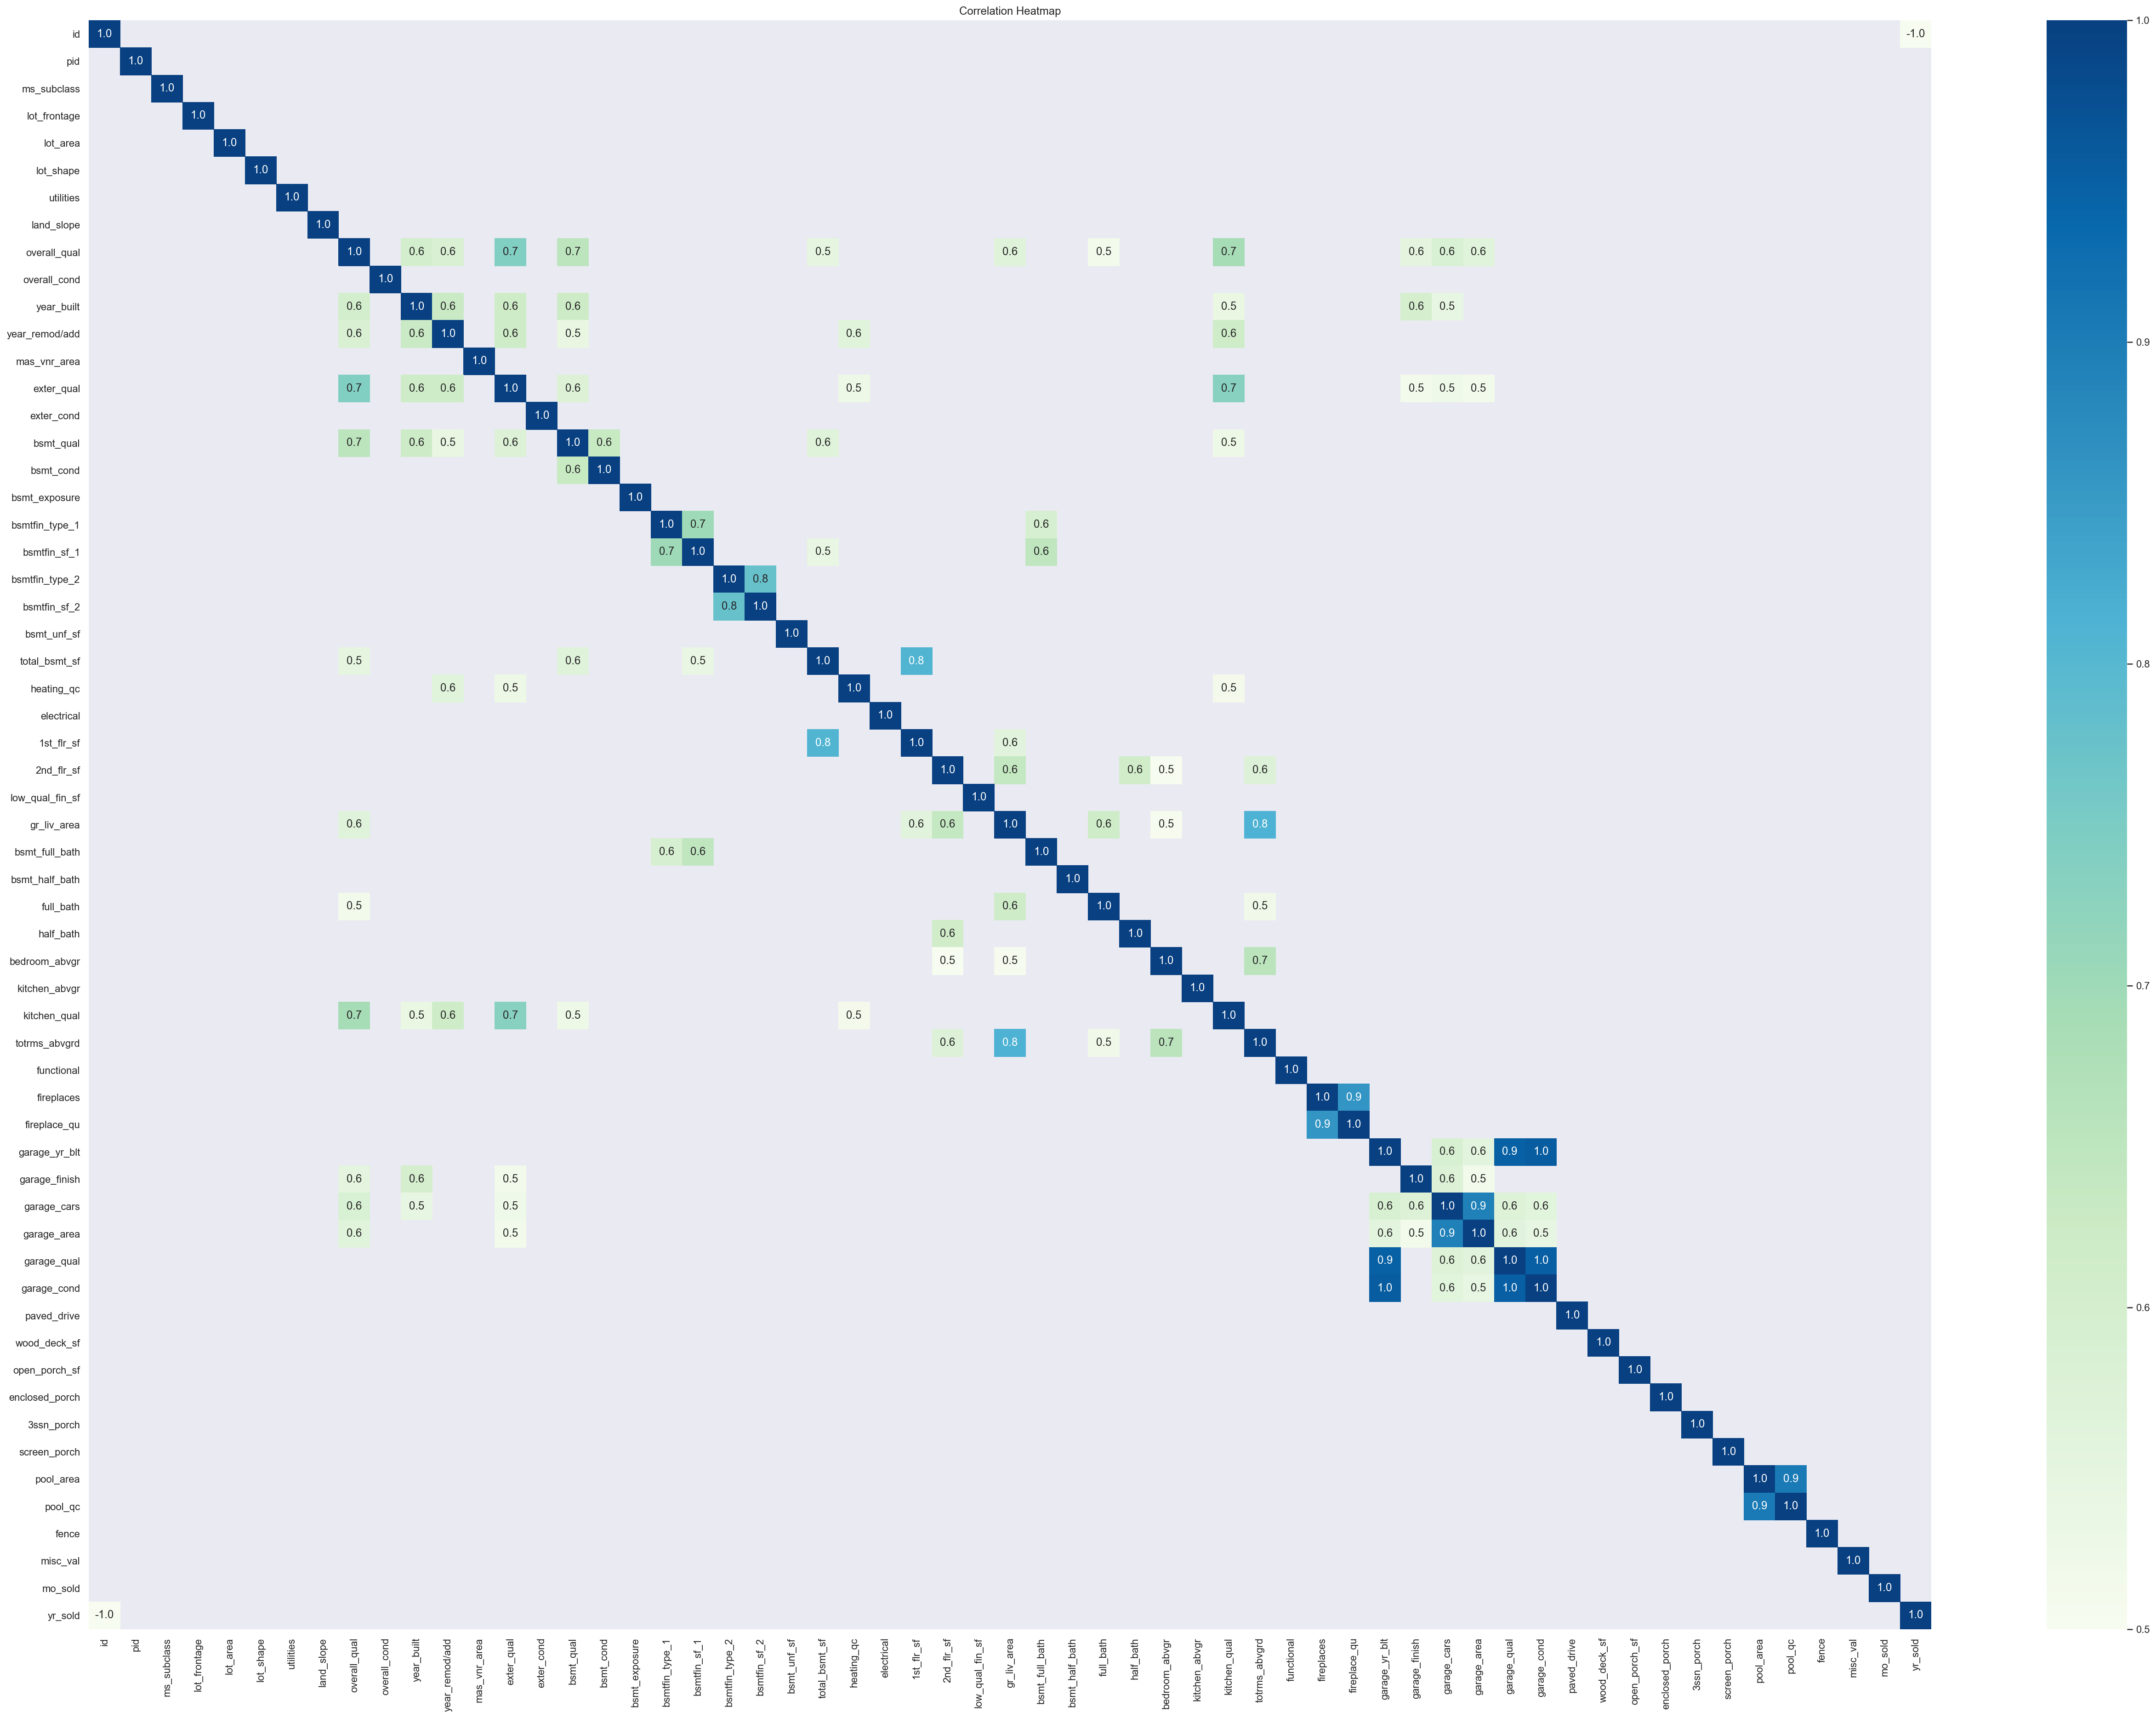

In [84]:
# Create correlation matrix from train data excluding `SalePrice`
corr_mat = df.iloc[:, :-1].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(40, 30))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

## Feature Engineering:  Changing Nominal features - Neighbourhood
- We will now engineer the neighborhood feature. 
- There's a few ways we can try to engineer the neighbourhood feature

##### 1) Dummify

In [85]:
df['neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64

- Based on value counts, dummifying may not be advisable as some neighborhood has single digits, while some have more than hundreds.

##### 2) Group by median sale price

In [86]:
neighborhood_order = df.groupby(by=["neighborhood"]).median().saleprice.sort_values(ascending=False).index
print(neighborhood_order)

Index(['StoneBr', 'NridgHt', 'NoRidge', 'GrnHill', 'Veenker', 'ClearCr',
       'Somerst', 'Timber', 'CollgCr', 'Crawfor', 'Blmngtn', 'Greens',
       'NWAmes', 'SawyerW', 'Gilbert', 'Mitchel', 'NPkVill', 'NAmes',
       'Blueste', 'Landmrk', 'SWISU', 'Sawyer', 'BrkSide', 'Edwards',
       'OldTown', 'BrDale', 'IDOTRR', 'MeadowV'],
      dtype='object', name='neighborhood')


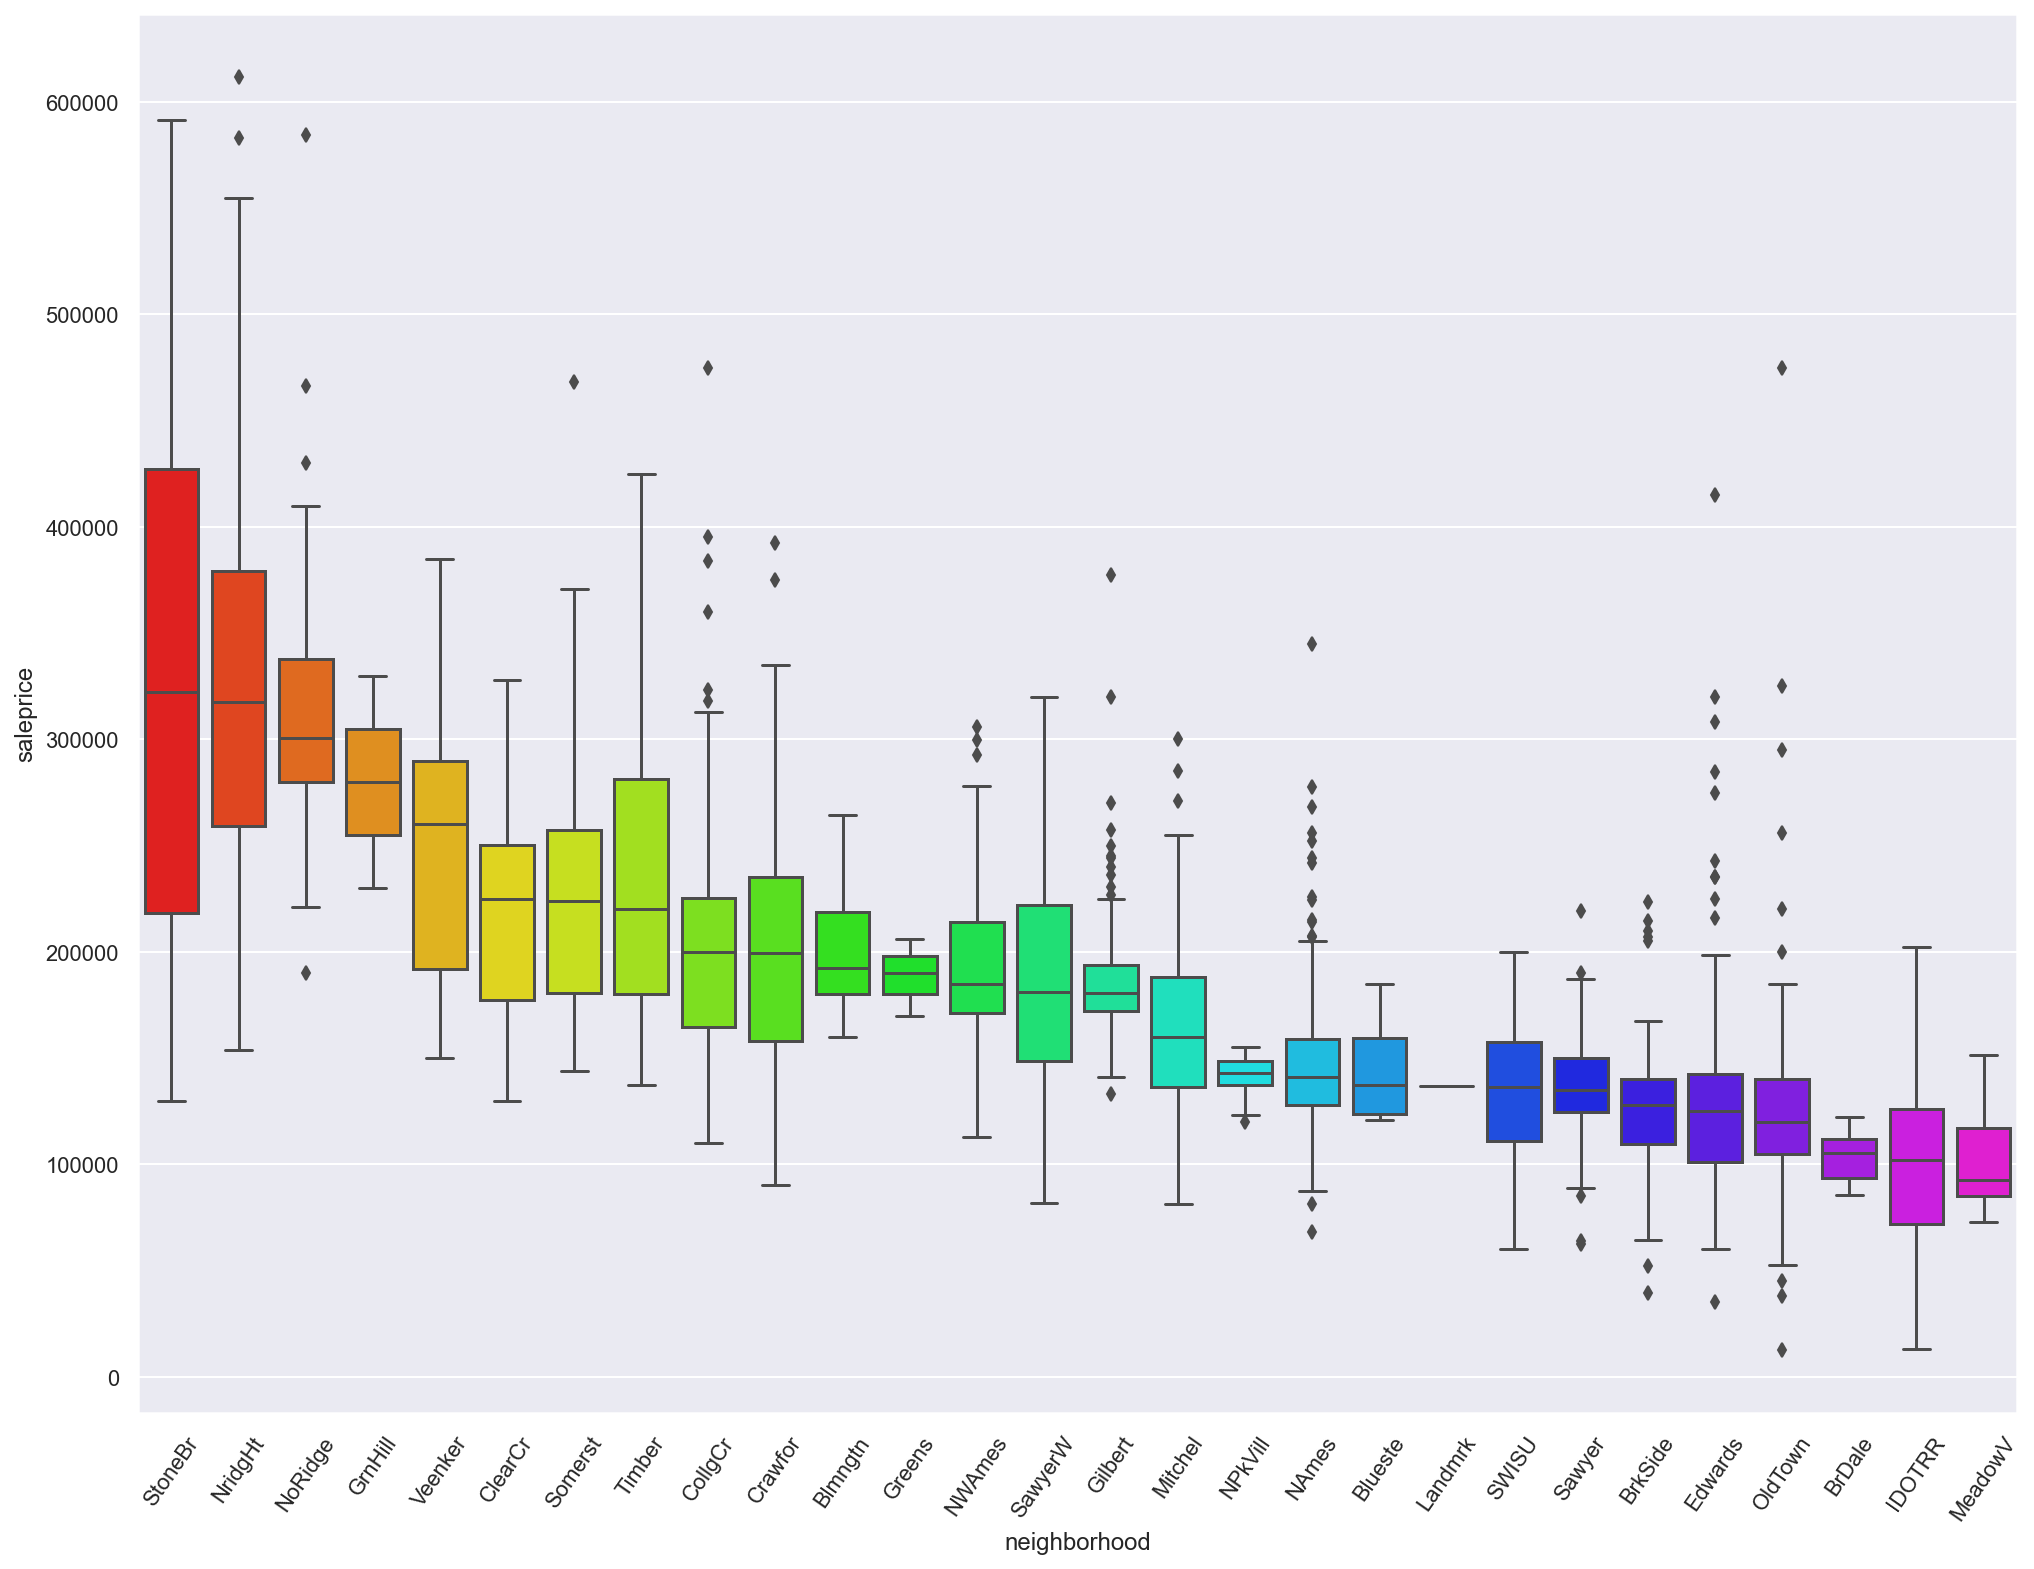

In [87]:
# Create box plot
plt.figure(figsize = (15,12))
ax = sns.boxplot(x='neighborhood', y='saleprice', data=df,palette='gist_rainbow', order =neighborhood_order )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 55);

- Based on the boxplot above, we could map numeric values to the neighbourhood according to the color/shades of the box plot. 

In [88]:
df['neighborhood_numeric'] = df['neighborhood']
print(df['neighborhood_numeric'])
print(df['neighborhood'])

0        Sawyer
1       SawyerW
2         NAmes
3        Timber
4       SawyerW
         ...   
2046     Timber
2047    Edwards
2048    Crawfor
2049      NAmes
2050    Gilbert
Name: neighborhood_numeric, Length: 2051, dtype: object
0        Sawyer
1       SawyerW
2         NAmes
3        Timber
4       SawyerW
         ...   
2046     Timber
2047    Edwards
2048    Crawfor
2049      NAmes
2050    Gilbert
Name: neighborhood, Length: 2051, dtype: object


In [89]:
# Mapping neighborhood unique values according to the color/shades of the box-plot
neigh_map={'None': 0,
        'MeadowV':1,'IDOTRR':1,'BrDale':1,
        'OldTown':2,'Edwards':2,
        'BrkSide':3,'Sawyer':3,'SWISU':3,'Landmrk':3,
        'Blueste':4,'NAmes':4,
        'NPkVill':5,'Mitchel':5,'Gilbert':5,
        'SawyerW':6,'NWAmes':6, 'Greens':6,'Blmngtn':6,'Crawfor':6,'CollgCr':6,
        'Timber':7,'Somerst':7,
        'ClearCr':8,'Veenker':8,'GrnHill':8, 
         'StoneBr':9,'NoRidge':9,'NridgHt':9 } 
df['neighborhood_numeric'] =df['neighborhood_numeric'].map(neigh_map)

In [90]:
print(df['neighborhood_numeric'].dtype)
df['neighborhood_numeric'].value_counts()
#neighbourhood_numeric is now all int64

int64


6    450
4    316
2    306
3    220
5    215
9    208
7    178
1    112
8     46
Name: neighborhood_numeric, dtype: int64

In [91]:
print(df['neighborhood'].dtype)
df['neighborhood'].value_counts()
#Neighborhood values remain as obj for now!

object


NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64

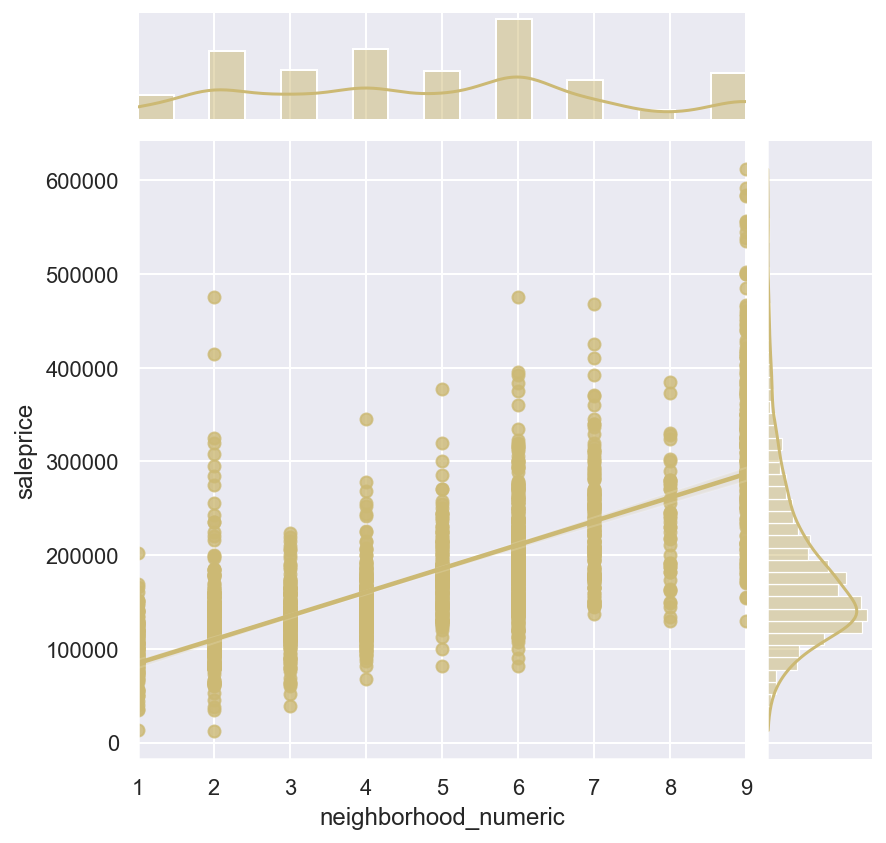

In [92]:
sns.jointplot(x=df['neighborhood_numeric'],y=df['saleprice'],kind="reg", color = 'y');

In [93]:
df.groupby('neighborhood_numeric')['saleprice'].agg(['mean','count'])

mean  count
neighborhood_numeric                      
1                     101301.071429    112
2                     127714.388889    306
3                     133319.095455    220
4                     145880.389241    316
5                     177146.246512    215
6                     198468.140000    450
7                     230923.438202    178
8                     233542.000000     46
9                     322573.177885    208

- There seems to be a linear relationship between ordered neighborhood by median price and saleprice. 
- Location matters!
- This feature is a valuable one in the model. However, we need to consider the outliers. 

In [94]:
location_price = df.groupby('neighborhood')['saleprice'].mean().sort_values()

In [95]:
location_price

neighborhood
MeadowV    100231.250000
IDOTRR     101103.188406
BrDale     103371.052632
OldTown    125276.300613
BrkSide    127022.697368
Edwards    130493.468531
SWISU      134758.875000
Landmrk    137000.000000
Sawyer     137181.909910
NPkVill    140476.470588
Blueste    144566.666667
NAmes      145905.816129
Mitchel    167656.707317
SawyerW    187760.160920
Greens     188666.666667
Gilbert    189228.387931
NWAmes     194619.022989
Blmngtn    200417.681818
CollgCr    202497.216667
Crawfor    205901.211268
ClearCr    217490.074074
Somerst    227183.900000
Timber     241051.354167
Veenker    253570.588235
GrnHill    280000.000000
NoRidge    316294.125000
NridgHt    322831.352459
StoneBr    329675.736842
Name: saleprice, dtype: float64

In [96]:
df['saleprice'].describe().T

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

- There is a fairly large deviation in the sales price (~ $80,000) one standard deviation from the mean. 

- These summary stats also suggest that there are outliers on the high end of the distribution as the 75th percentile is ~$400,000 less than the max sale price.

- Regression algorithms tend to be sensitive to non-normally distributed target variables so we may need to address this before creating a modeling dataset.

## Feature Engineering:  Changing Nominal features - Conditions 1 & 2
- We will now engineer the Condition feature. 


In [97]:
df.groupby('condition_1')['saleprice'].agg(['mean', 'count']).sort_values(by='mean')

mean  count
condition_1                      
Artery       128765.000000     70
RRNe         129616.666667      3
RRAe         139685.714286     21
Feedr        143223.605505    109
RRAn         172604.777778     36
Norm         185007.310130   1767
RRNn         198208.333333      6
PosA         254733.333333     12
PosN         254794.296296     27

In [98]:
df.groupby('condition_2')['saleprice'].agg(['mean', 'count']).sort_values(by='mean')

mean  count
condition_2                      
RRNn          96750.000000      2
Artery       119050.000000      5
Feedr        129181.818182     11
RRAn         136905.000000      1
Norm         181382.075556   2025
RRAe         190000.000000      1
PosA         390666.666667      3
PosN         395666.666667      3

- Based on the above condition, we can combine the conditions and sort them according to positive, negative and normal values. 

In [99]:
df['positive_condition1'] = df['condition_1']
df['positive_condition2'] = df['condition_2']
df_ordinal_str_columns = df[['positive_condition2', 'positive_condition1']]

dict_ordinal = {
   'Artery':0,
    'RRNe':0,
    'RRAe':0,
    'Feedr':0,
    'RRAn':0,
    'Norm':1,
    'RRNn':0,
    'PosN':2,
    'PosA':2,
        }

for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [100]:
df['local_conditions'] = df['positive_condition1']+df['positive_condition2'] 
#this a combined measure of local features. 

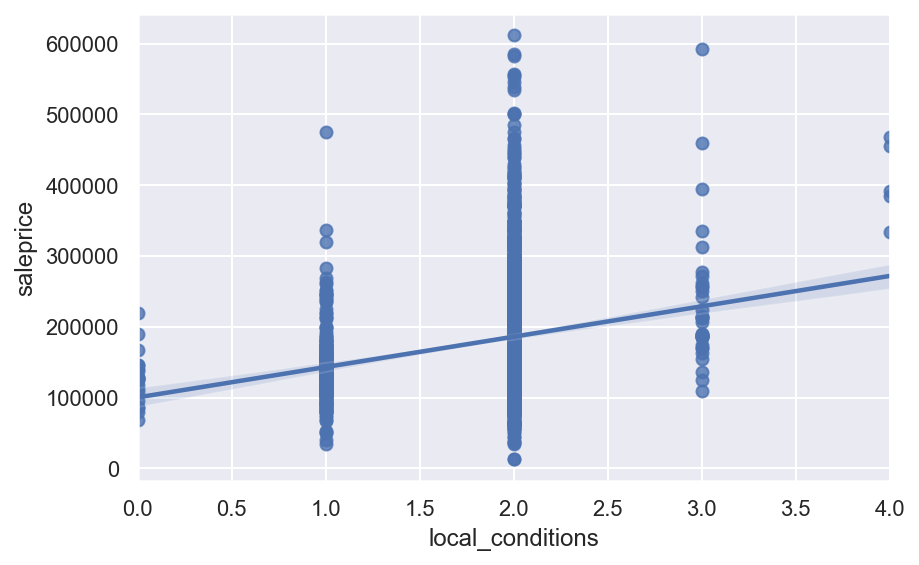

In [101]:
sns.regplot(x=df['local_conditions'],y=df['saleprice']); 
#Railroads and busy streets are just not quite as nice to live by as are greenbelts and parks and even normal places

## Feature Engineering:  Changing Nominal features -Sale Type
- We will now engineer the SaleType feature. 

In [102]:
#Sale Type ordered by price
df['sale_type_numeric'] = df['sale_type']
df_ordinal_str_columns = df[['sale_type_numeric']]

dict_ordinal = {
   'ConLw':1,
    'Oth':1,
    'ConLD':1,
    'COD':1,
    'WD':2,
    'WD ':2,
    'CWD':3,
    'ConLI':3,
    'Con':3,
    'New':3
        }

#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [103]:
df['sale_type_numeric'].unique()

array([2, 3, 1])

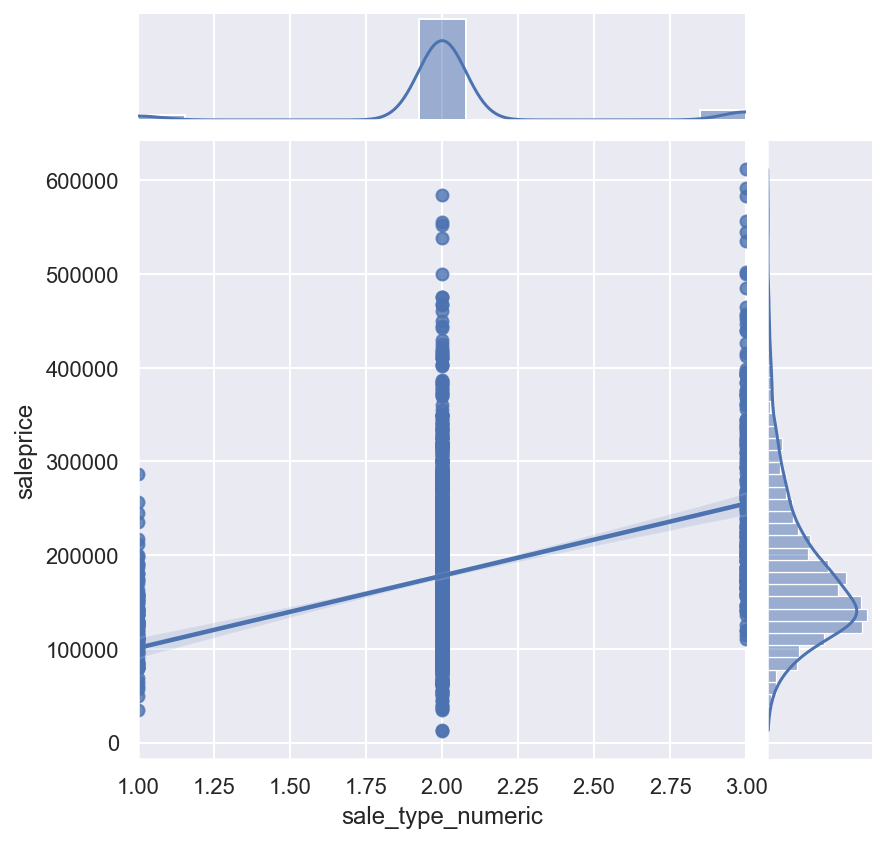

In [104]:
sns.jointplot(x=df['sale_type_numeric'],y=df['saleprice'], kind = 'reg'); 

In [105]:
df.groupby('sale_type')['saleprice'].mean().sort_values() 
#new and higher downpayment cost more

sale_type
ConLw    124600.000000
Oth      127497.750000
ConLD    129091.352941
COD      133574.523810
WD       174912.251544
CWD      186635.000000
ConLI    207992.857143
Con      241807.500000
New      279021.056250
Name: saleprice, dtype: float64

- The above jointplot tells us that certain types of payment have an impact on house sale price over other types. 
- Newer loans and higher downpayment homes cost more

## Feature Engineering:  Changing Nominal features -Exterior 1 & 2
- We will now engineer the Exterior feature. 

In [106]:
df['exterior_numeric1'] = df['exterior_1st']
df['exterior_numeric2'] = df['exterior_2nd']
df_ordinal_str_columns = df[['exterior_numeric2', 'exterior_numeric1']]

dict_ordinal = {
     'AsphShn':1,
    'CBlock':1,
    'AsbShng':1,
    'Brk Cmn':2,
    'BrkComm':2,
     'Stucco':2,
    'PreCast':2,
    'Other':3,
    'Wd Shng':3,
    'Wd Sdng':3,
    'MetalSd':3,
    'WdShing':3,
    'HdBoard':3,      
    'Plywood':4,
    'BrkFace':5,       
    'VinylSd':5,
    'CmentBd':5,
    'CemntBd':5,
    'Stone':5,    
    'ImStucc':5,        
        }
#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [107]:
df['external_feature'] = df['exterior_numeric1'] + df['exterior_numeric2']

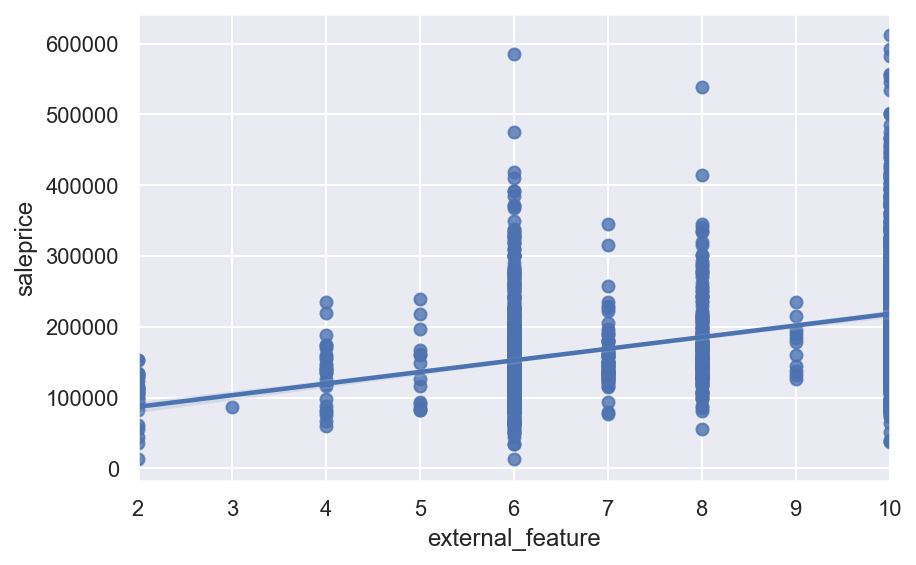

In [108]:
sns.regplot(x=df['external_feature'],y=df['saleprice']); 


## Feature Engineering:  Changing Nominal features - House style
- We will now engineer the house style feature.

In [109]:
df['house_style_numeric'] = df['house_style'] 
df_ordinal_str_columns = df[['house_style_numeric']]

dict_ordinal = {
    '1.5Unf':1.5,
    '1.5Fin':1.5,
    'SFoyer':1.5,
    'SLvl':1,
    '1Story':1,
     '2.5Unf':2,
    '2Story':2,
    '2.5Fin':2    
        }
#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

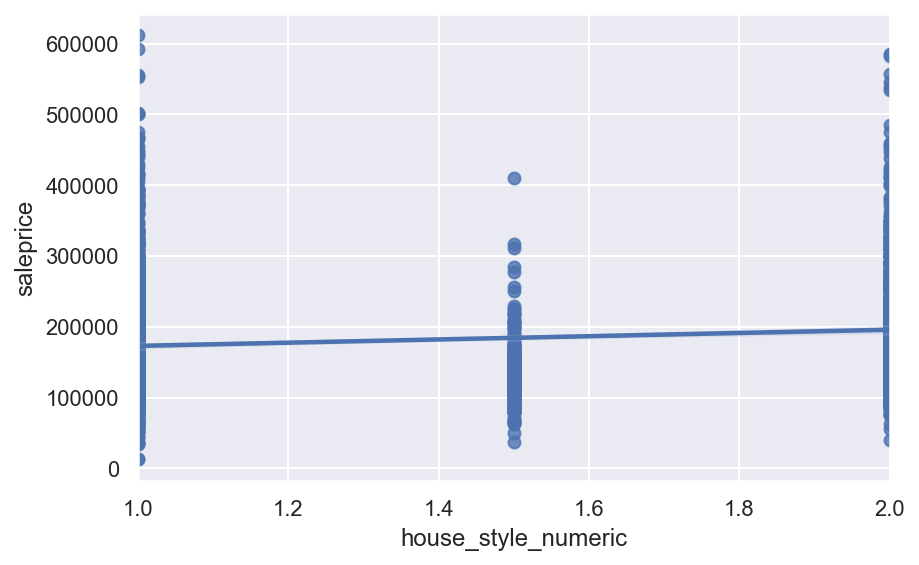

In [110]:
sns.regplot(x=df['house_style_numeric'],y=df['saleprice']); 

- Houses with multiple stories tend to cost more money than single-story houses

In [111]:
df.groupby('house_style')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
house_style                      
1.5Unf       112466.666667     12
1.5Fin       136480.091743    218
SFoyer       149343.920000     50
SLvl         166248.989362     94
1Story       179809.194523   1059
2.5Unf       191785.714286     14
2Story       206408.963211    598
2.5Fin       243666.666667      6

In [112]:
#dummy building type
df = pd.get_dummies(data = df, columns=['house_style_numeric'], drop_first=True)

## Feature Engineering:  Changing Nominal features - Building type
- We will now engineer the building type feature.

In [113]:
df.groupby('bldg_type')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
bldg_type                      
2fmCon     123179.891304     46
Twnhs      133100.000000     69
Duplex     139296.333333     75
1Fam       185275.685882   1700
TwnhsE     198312.372671    161

- Similar to house type: the bigger the building type, the more expensive the cost. 

In [114]:
#dummy building type
df = pd.get_dummies(data = df, columns=['bldg_type'], drop_first=True)

### Data Exploration/EDA

We now explore the dataset with some jointplots and regplots to examine how our feature columns interact with the sale price.
This, in combination with a correlation matrix below, helps provide insight into which features we will use to help with our problem statement. 
In addition, we will explore how related variables interact with one another in order to combine features and reduce dimensionality. 

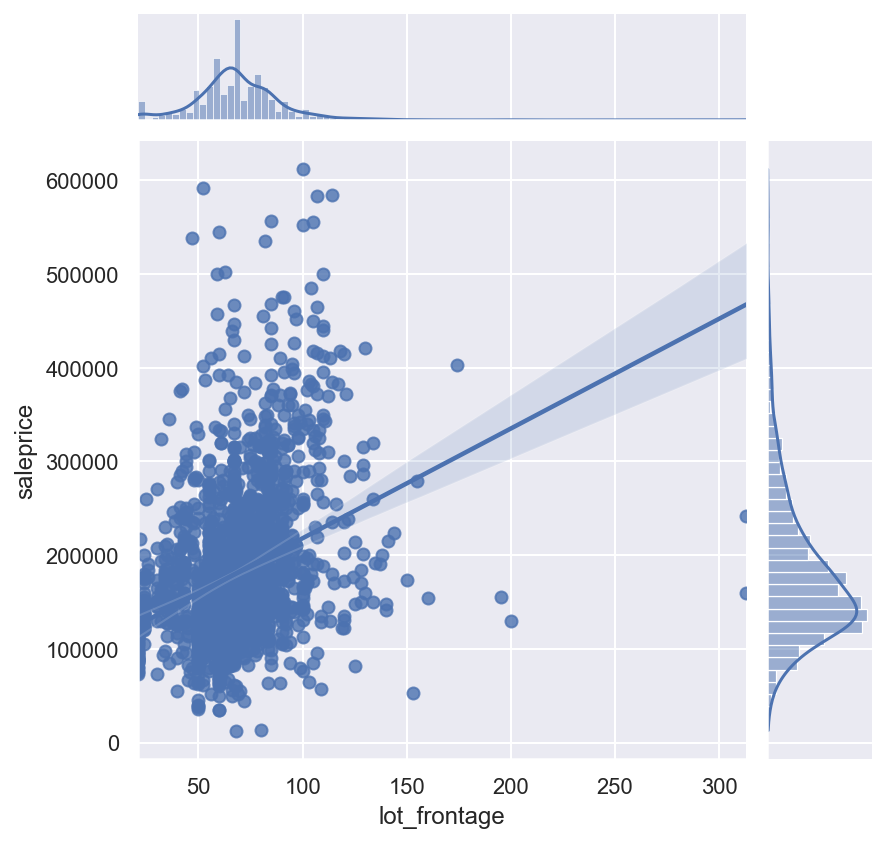

In [115]:
sns.jointplot(x=df['lot_frontage'],y=df['saleprice'],kind="reg");
#lot_frontage and saleprice have a linear r-ship
#there is also some outliers in lot_frontage

In [116]:
outlier_lotfrontage = df[df['lot_frontage']>250]
outlier_lotfrontage
#lotfrontage outlier value is 313. 

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1335  1266  535427070           20        RL         313.0     27650   Pave   

     alley  lot_shape land_contour  ...  sale_type_numeric exterior_numeric1  \
960     NA          1          Bnk  ...                  3                 2   
1335    NA          2          HLS  ...                  2                 3   

      exterior_numeric2 external_feature house_style_numeric_1.5  \
960                   2                4                       0   
1335                  3                6                       0   

     house_style_numeric_2.0 bldg_type_2fmCon  bldg_type_Duplex  \
960                        1                0                 0   
1335                       0                0                 0   

      bldg_type_Twnhs  bldg_type_TwnhsE  
960                 0                 0  
1335                0                 0  

[2 rows x 94 columns]

In [117]:
withoutoutlier_lotfrontage = df[df['lot_frontage'] < 313]

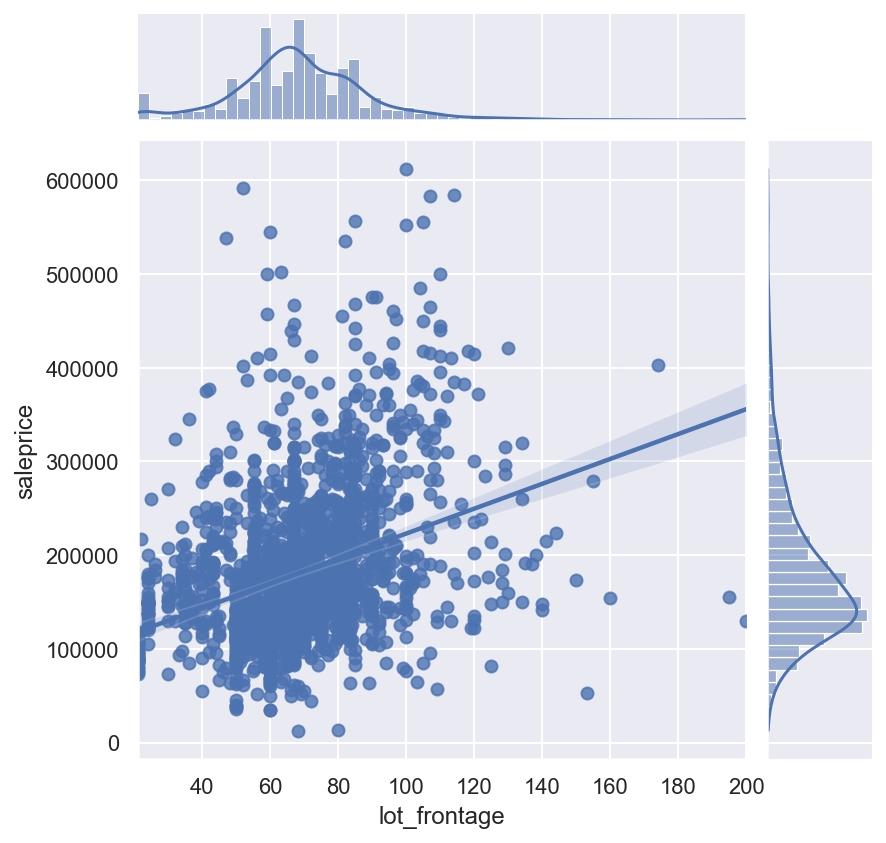

In [118]:
sns.jointplot(x=withoutoutlier_lotfrontage['lot_frontage'],y=withoutoutlier_lotfrontage['saleprice'],kind="reg"); 
#relationship without outliers look significantly more linear

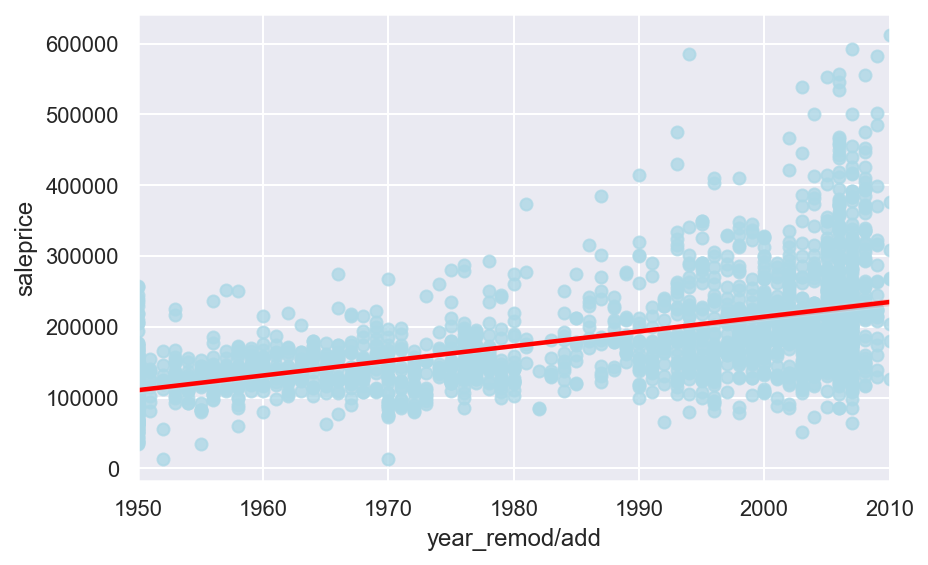

In [119]:
#For year_remod/add

sns.regplot(x=df["year_remod/add"],y=df['saleprice'], scatter_kws={"color": "lightblue"}, line_kws={"color": "red"} );
#there is a linear relationship here between year remodeled and saleprice.
#There seems to be more houses built in 2010

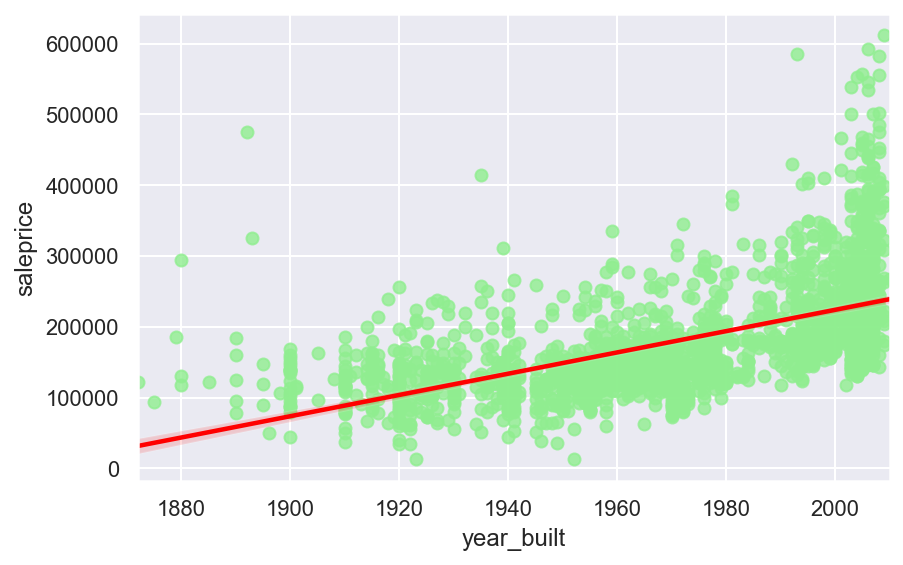

In [120]:
#For year built
sns.regplot(x=df['year_built'],y=df['saleprice'], scatter_kws={"color": "lightgreen"}, line_kws={"color": "red"}); 
# there is a linear relationship here between year bui,t and saleprice.
# maybe create a age column?

In [121]:
df['age'] = df['yr_sold'] - df['year_built'] #age of house at time of sale

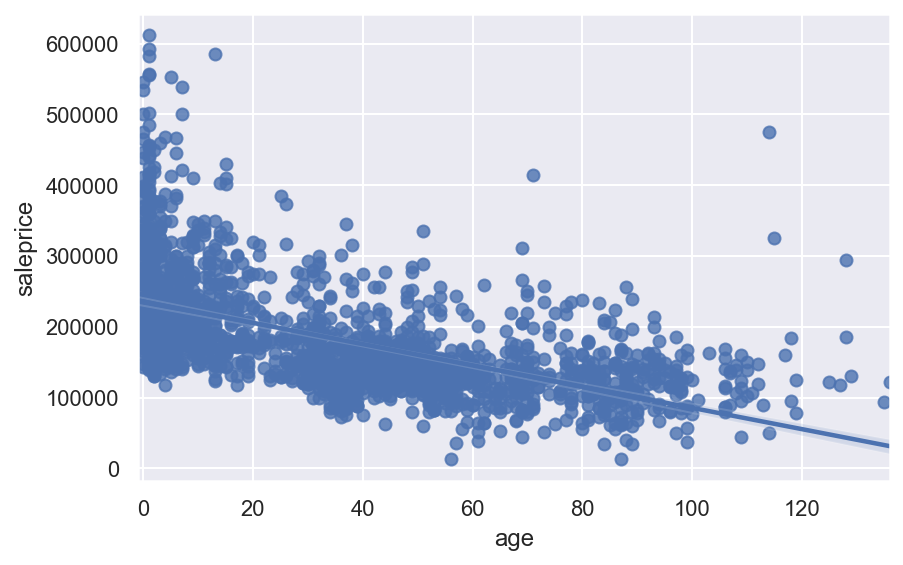

In [122]:
sns.regplot(x=df['age'],y=df['saleprice']);
#This makes sense, as the older the house, the lower the sale price

In [123]:
df['was_remodeled'] =  df['year_remod/add'] - df['year_built'] 
df['was_remodeled'] = [1 if i> 0 else 0 for i in df['was_remodeled']];

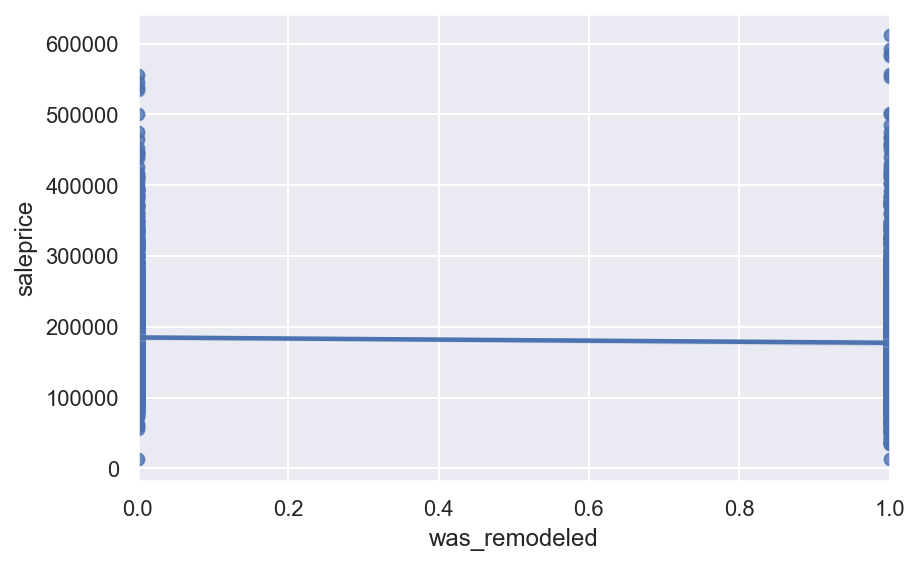

In [124]:
sns.regplot(x=df['was_remodeled'],y=df['saleprice']);

In [125]:
#for basement related features 
df['basement_overall'] = df['bsmt_qual'] *df['bsmt_exposure'] 
#an overall score of basement quality in ceiling height and access to outside

In [126]:
df['basement_overall']

0        3
1        4
2        3
3        4
4        2
        ..
2046    12
2047     3
2048     3
2049     3
2050     3
Name: basement_overall, Length: 2051, dtype: int64

<AxesSubplot:xlabel='bsmt_qual', ylabel='saleprice'>

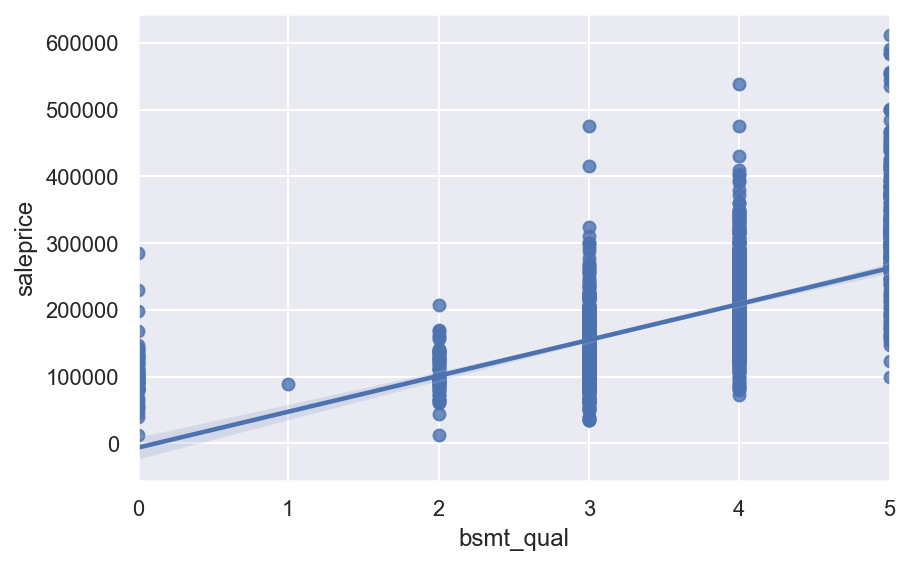

In [127]:
sns.regplot(x=df['bsmt_qual'],y=df['saleprice'])

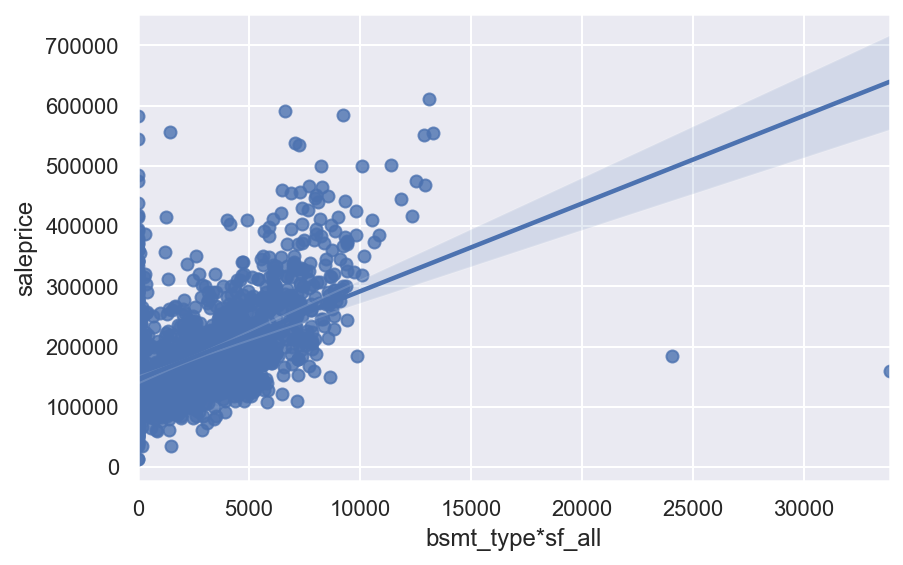

In [128]:
df['bsmt_type*sf_all'] = (df['bsmtfin_type_1']*df['bsmtfin_sf_1']) + (df['bsmtfin_type_2']*df['bsmtfin_sf_2']) 
#quality*sf interaction variable. Clear outliers
sns.regplot(x=df['bsmt_type*sf_all'],y=df['saleprice']);

- Here we engineer a variable that looks at the interaction between basement quality and basement square footage. 
- There are some outliers that we can drop 

In [129]:
bsmt_no_outliers = df[df['bsmt_type*sf_all'] < 20000]

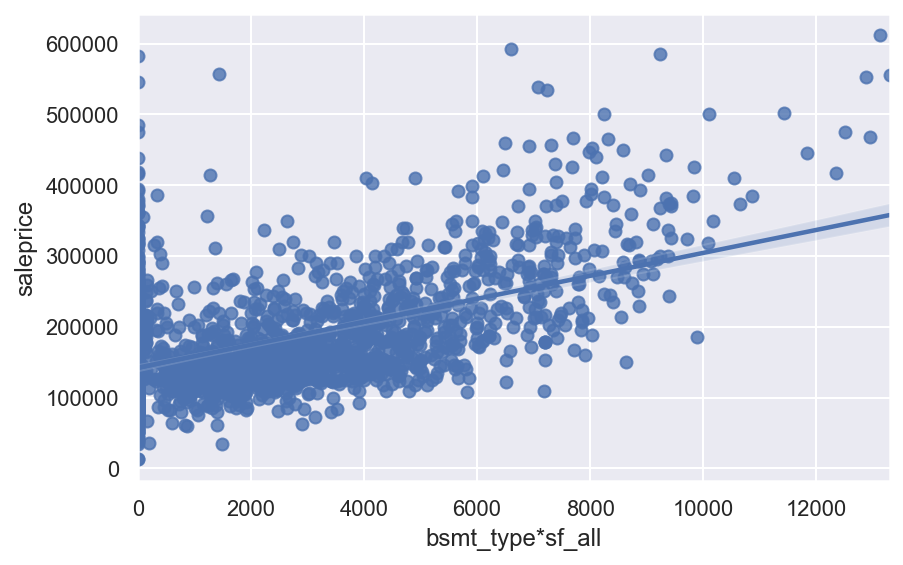

In [130]:
sns.regplot(x=bsmt_no_outliers['bsmt_type*sf_all'],y=bsmt_no_outliers['saleprice']);
#relationship without outliers look significantly more linear

In [131]:
bsmt_outliers = df[df['bsmt_type*sf_all'] > 20000] 
#outliers to drop?

In [132]:
bsmt_outliers
#This is the second time we’ve seen house ID 1499 as a clear outlier.
#The first time was with the lot frontage feature.

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1885  2181  908154195           20        RL         128.0     39290   Pave   

     alley  lot_shape land_contour  ...  house_style_numeric_1.5  \
960     NA          1          Bnk  ...                        0   
1885    NA          3          Bnk  ...                        0   

     house_style_numeric_2.0  bldg_type_2fmCon bldg_type_Duplex  \
960                        1                 0                0   
1885                       0                 0                0   

     bldg_type_Twnhs bldg_type_TwnhsE age  was_remodeled  basement_overall  \
960                0                0   0              0                20   
1885               0                0  -1              1                20   

      bsmt_type*sf_all  
960            33864.0  
1885           24060.0  

[2 rows x 98 columns]

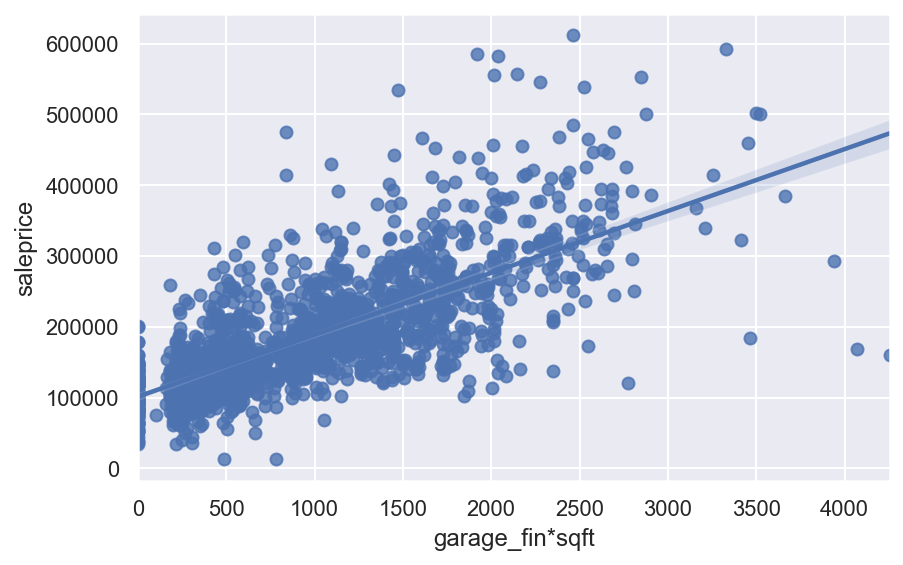

In [133]:
#for Garage related features 
#Let’s create a feature similar to our finished basement space interaction that measures the interaction between the quality of garage finish by garage area.
df['garage_fin*sqft'] = df['garage_area']*df['garage_finish'] 
sns.regplot(x=df['garage_fin*sqft'],y=df['saleprice']);

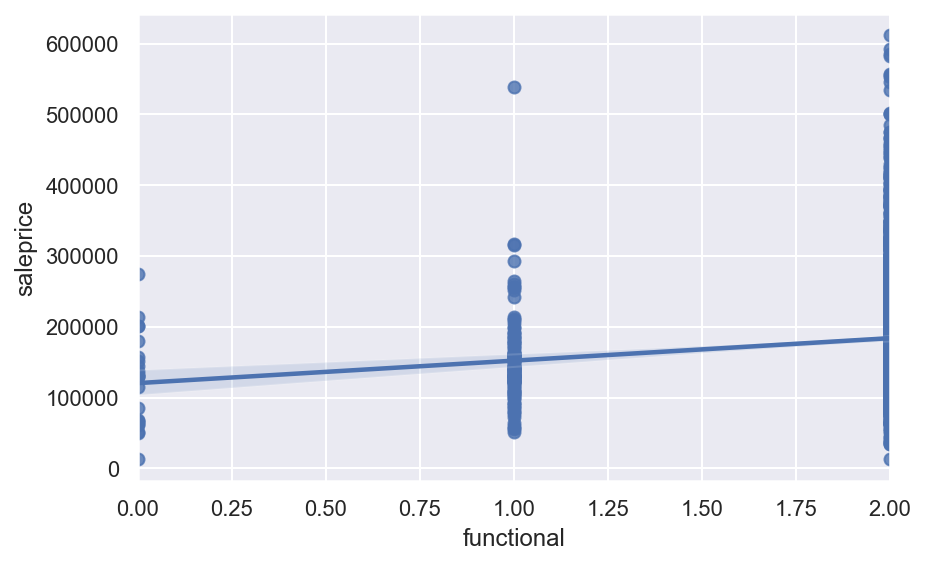

In [134]:
sns.regplot(x=df['functional'],y=df['saleprice']); 
#This feature combined with another house type feature could be worth exploring?

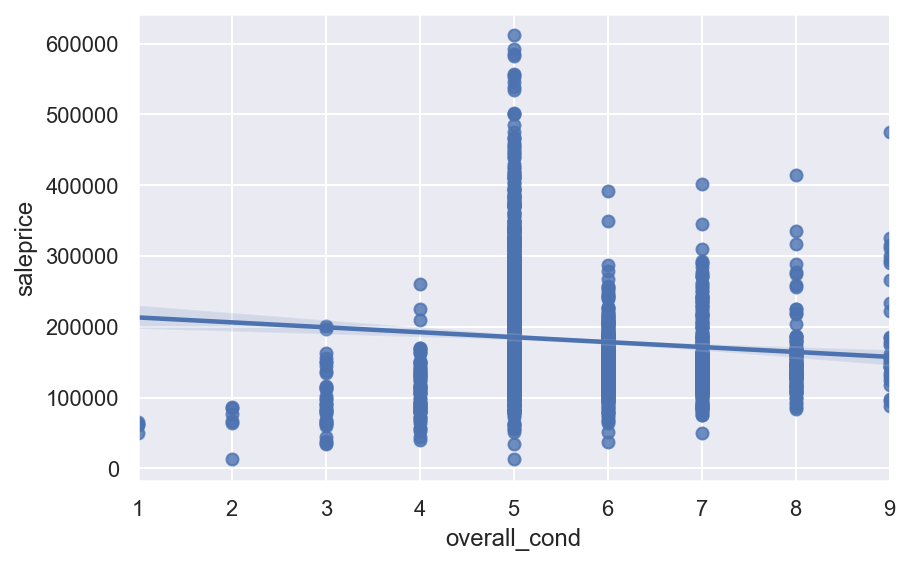

In [135]:
sns.regplot(x=df['overall_cond'],y=df['saleprice']); 
#The first downward sloping variable. Negatively correlated. 
#I would not expect that as the condition of a house increases, its value decreases.

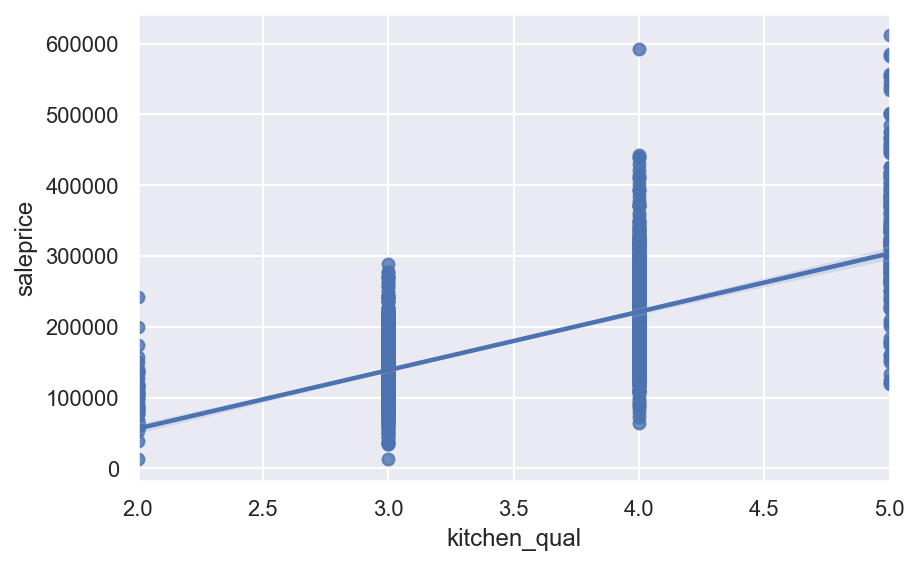

In [136]:
sns.regplot(x=df['kitchen_qual'],y=df['saleprice']); 
#This is a great feature for the model.

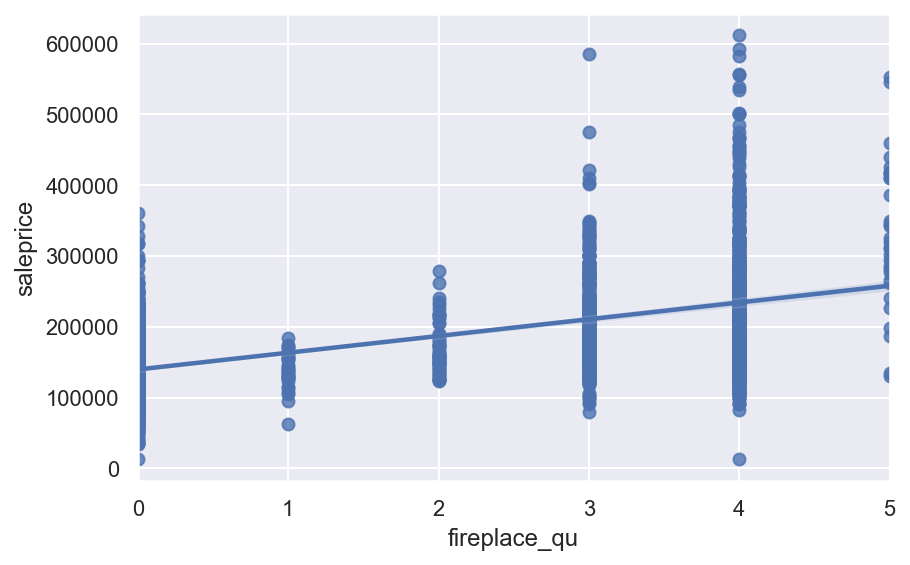

In [137]:
sns.regplot(x=df['fireplace_qu'],y=df['saleprice']); 
#fireplace quality is another great feature for the model. 
#It can tell me if a house has a fireplace and the quality of that 
#fireplace. 

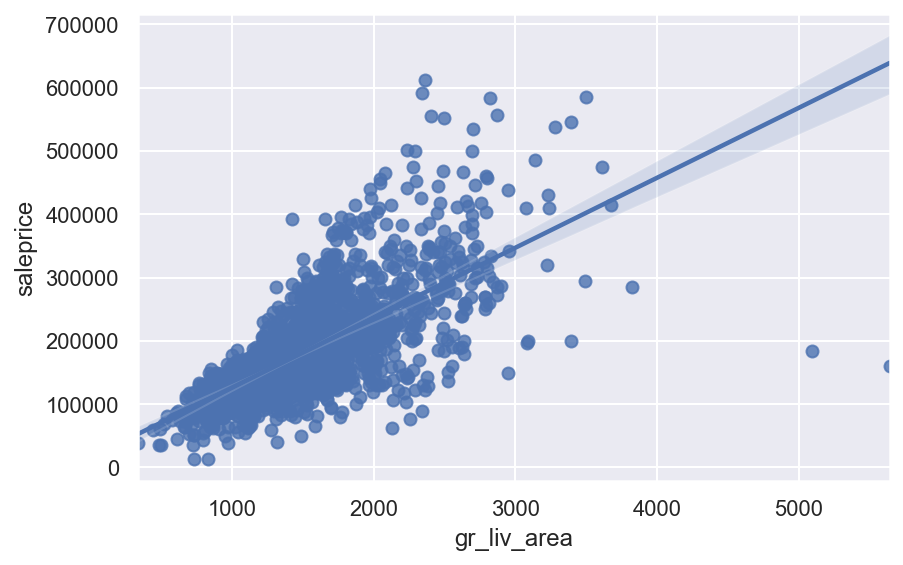

In [139]:
sns.regplot(x=df['gr_liv_area'],y=df['saleprice']); 
# Ground living area is a great feature. As living space increases sales price strongly increases.
# there are some outliers 

In [140]:
df['quality_above_sqft'] = (df['1st_flr_sf']+df['2nd_flr_sf']) - df['low_qual_fin_sf']  
# I'll combine these three into one and make a variable that is better than gr_liv_area while reducing 4 features into one. 

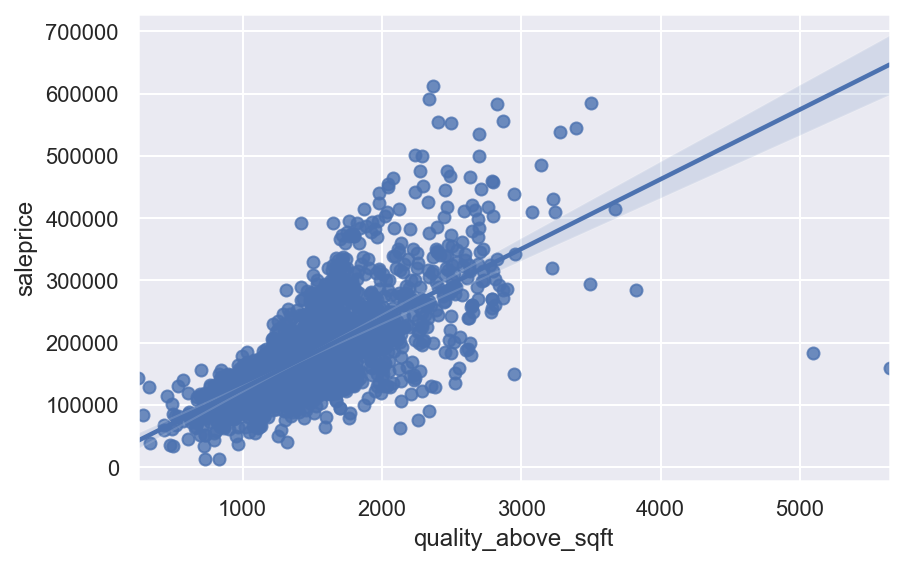

In [141]:
 sns.regplot(x=df['quality_above_sqft'],y=df['saleprice']); 
#There are some outliers 

In [142]:
flr_outlier = df[df['1st_flr_sf']>4000] #same ID's as for basement and 1499 was outlier on frontage as well. These will be dropped.

In [143]:
flr_outlier

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1885  2181  908154195           20        RL         128.0     39290   Pave   

     alley  lot_shape land_contour  ...  bldg_type_2fmCon bldg_type_Duplex  \
960     NA          1          Bnk  ...                 0                0   
1885    NA          3          Bnk  ...                 0                0   

      bldg_type_Twnhs bldg_type_TwnhsE age was_remodeled basement_overall  \
960                 0                0   0             0               20   
1885                0                0  -1             1               20   

      bsmt_type*sf_all  garage_fin*sqft  quality_above_sqft  
960            33864.0           4254.0                5642  
1885           24060.0           3462.0                5095  

[2 rows x 100 columns]

In [144]:
#This is the third time we’ve seen house ID 1499 as a clear outlier.
# This is the second time we've seen house ID 2181 as well. 
#We will definitely drop these 2 values 

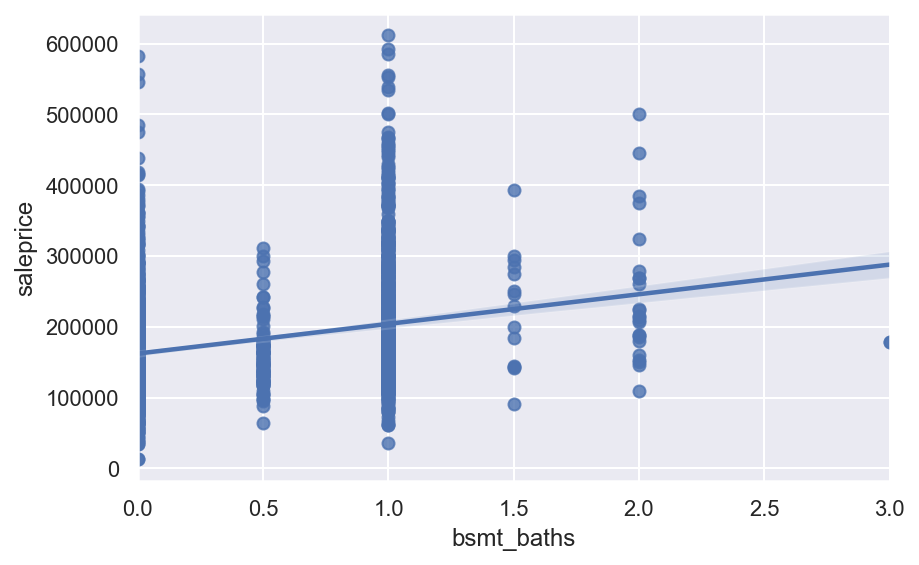

In [145]:
#basement baths
df['bsmt_baths'] = df['bsmt_full_bath']+(df['bsmt_half_bath']/2) #combine basment baths to reduce features and more accurately portray the bathroom story.
sns.regplot(x=df['bsmt_baths'],y=df['saleprice']);

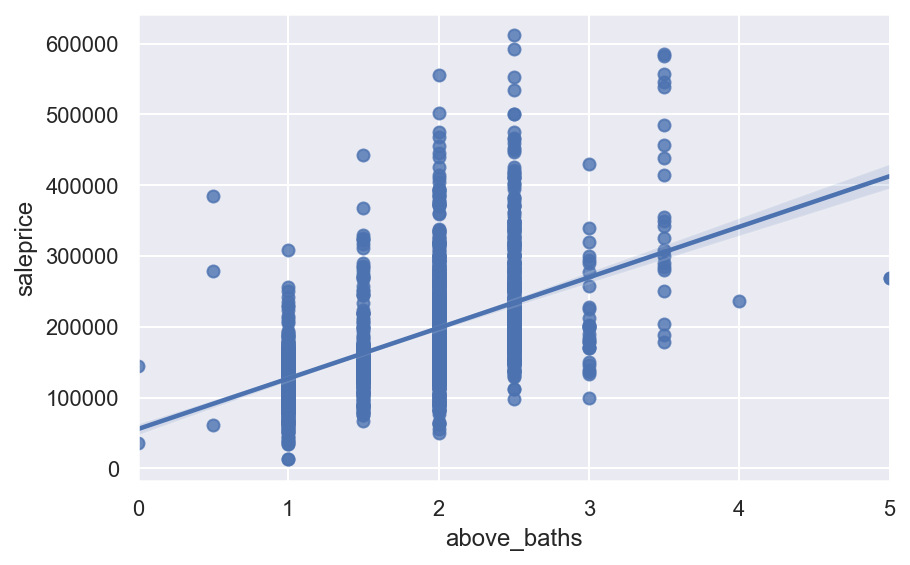

In [146]:
#for baths above grade
df['above_baths'] = df['full_bath']+(df['half_bath']/2) #combine upstairs baths
sns.regplot(x=df['above_baths'],y=df['saleprice']);

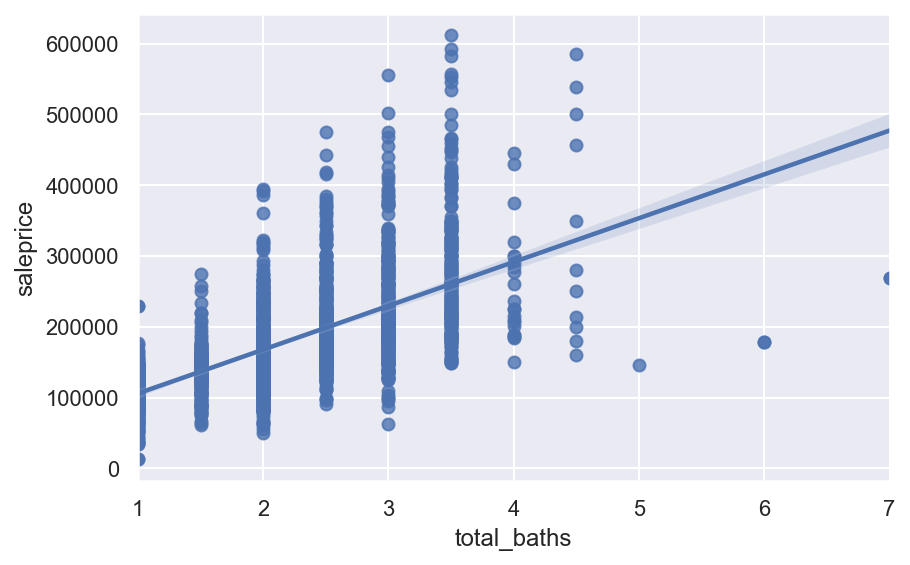

In [147]:
df['total_baths'] = df['above_baths'] + df['bsmt_baths'] 
sns.regplot(x=df['total_baths'],y=df['saleprice']);
#Total baths is a great feature as well . The more baths, the likelihood the sales price increases.

In [148]:
bath_outlier = df[df['total_baths'] == 7] 
#bath outliers, ID 816 and 817

In [149]:
#for bedrooms above grade
df.groupby('bedroom_abvgr')['saleprice'].agg(['mean','count']) 
#Was expecting a more linear r-ship here

mean  count
bedroom_abvgr                      
0              240791.800000      5
1              182388.920000     75
2              164656.601103    544
3              180627.309567   1108
4              215374.792453    265
5              203885.951220     41
6              164111.333333     12
8              200000.000000      1

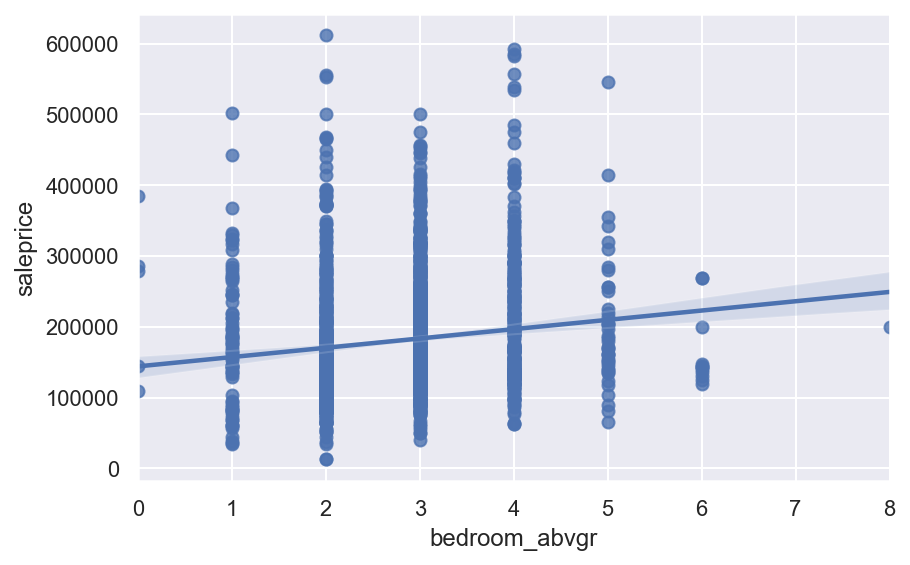

In [150]:
sns.regplot(x=df['bedroom_abvgr'],y=df['saleprice']);
#bedroom above grade not as linear

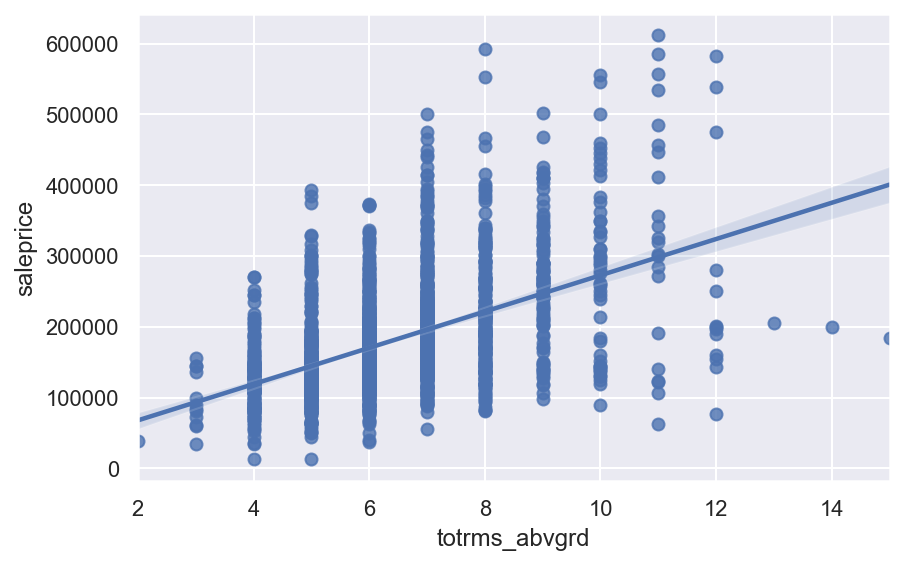

In [151]:
sns.regplot(x=df['totrms_abvgrd'],y=df['saleprice']); 
#this is a good feature - remember this does not include bathroom

In [152]:
df['room_size'] = df['gr_liv_area'] / (df['totrms_abvgrd'])
#created a new columns room size, where ground living area divided by total rooms (excluding baths)

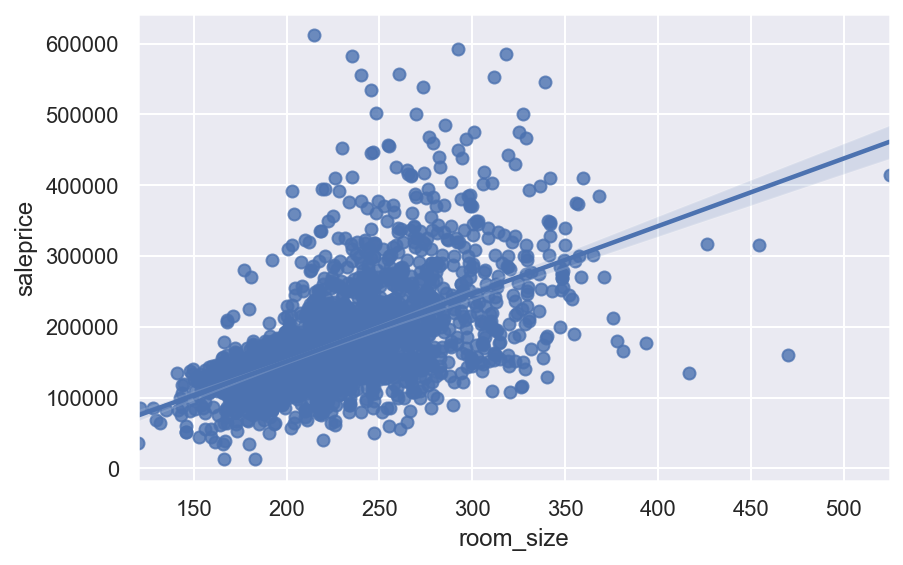

In [153]:
sns.regplot(x=df['room_size'],y=df['saleprice']); 
#the newly constructed room size seems pretty linear 

In [154]:
df['kitchen_abvgr'].value_counts()
#Almost every house has only 1 kitchen - column not worth including. 

1    1960
2      88
0       2
3       1
Name: kitchen_abvgr, dtype: int64

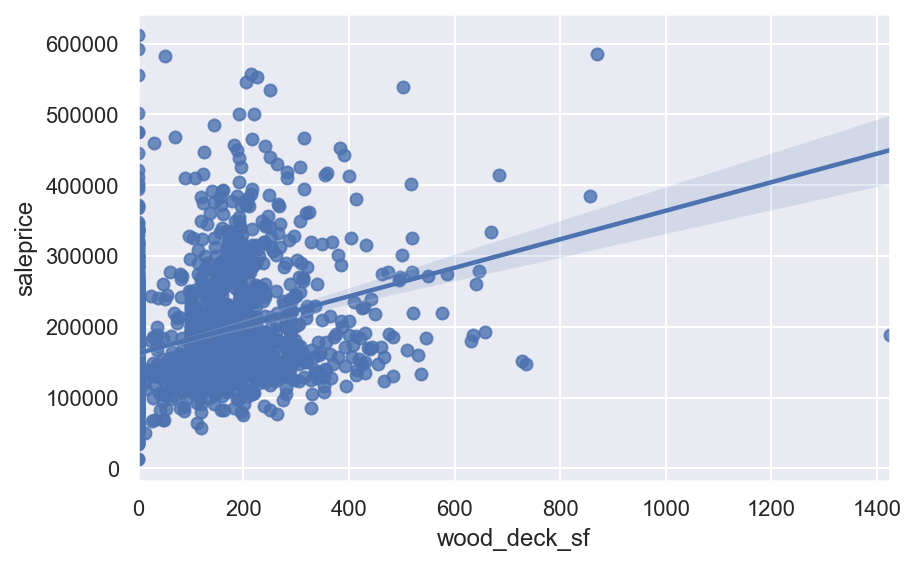

In [155]:
sns.regplot(x=df['wood_deck_sf'],y=df['saleprice']); 
#looking at exterior of the houses now

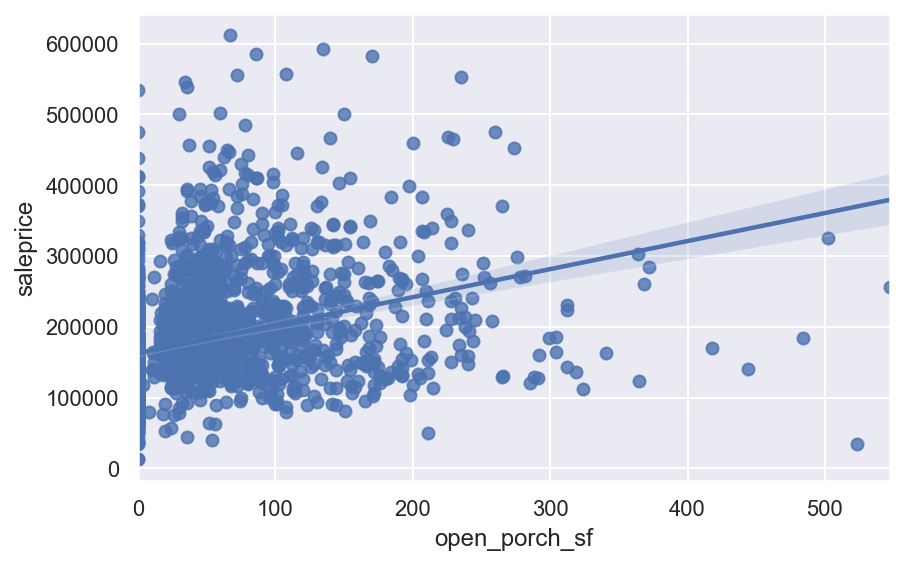

In [156]:
sns.regplot(x=df['open_porch_sf'],y=df['saleprice']); 
#open porch area and wood deck area seems similar 

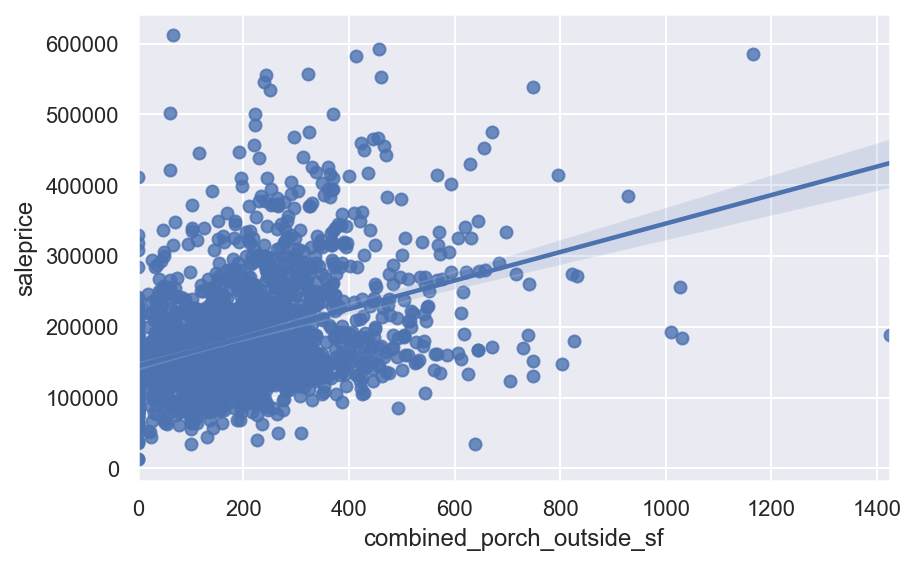

In [157]:
#combine different porches.
df['combined_porch_outside_sf'] = df['open_porch_sf']+ df['screen_porch'] + df['enclosed_porch'] +df['3ssn_porch'] +df['wood_deck_sf'] 
sns.regplot(x=df['combined_porch_outside_sf'],y=df['saleprice']); 

In [158]:
df.groupby('roof_matl')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean') 
# values reflect mostly Standard (Composite) Shingle

mean  count
roof_matl                      
ClyTile    160000.000000      1
CompShg    180849.197037   2025
Tar&Grv    187948.933333     15
Membran    241500.000000      1
WdShake    264250.000000      4
WdShngl    339400.000000      5

In [159]:
df.groupby('mo_sold')['saleprice'].agg(['mean', 'count']).sort_values(by = 'count') 
#while there are more houses sold in warmer months (i.e. June, July) house prices don't vary much by month

mean  count
mo_sold                      
12       182459.615385     78
1        195126.303797     79
11       184377.495146    103
2        177626.519231    104
9        188990.761468    109
10       179334.471545    123
8        186927.359281    167
3        174625.779762    168
4        163901.269231    208
5        180332.369650    257
7        188571.514851    303
6        182662.798295    352

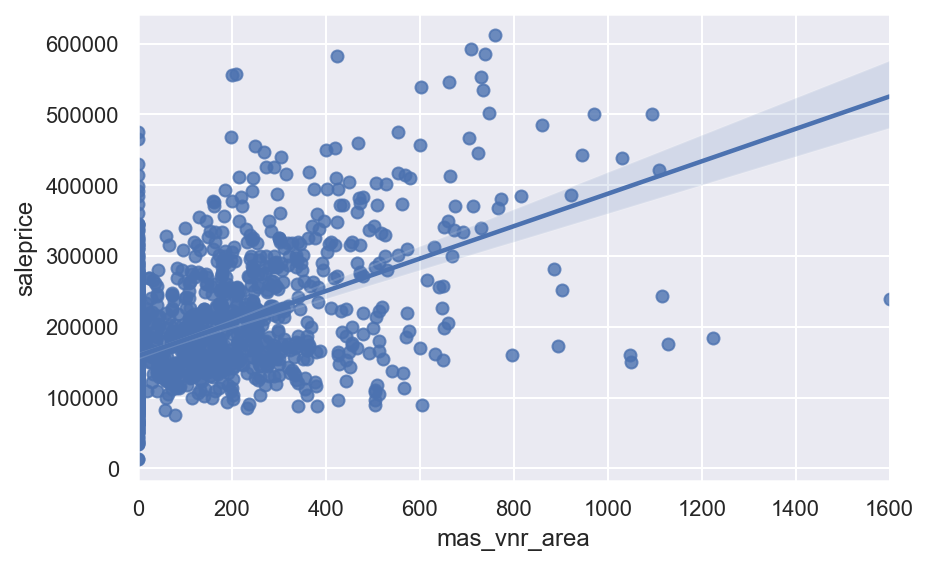

In [160]:
df['mas_vnr_area']
sns.regplot(x=df['mas_vnr_area'],y=df['saleprice']); 

In [161]:
df['mas_vnr_type']
df.groupby('mas_vnr_type')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
mas_vnr_type                      
BrkCmn        144515.692308     13
None          155120.870161   1240
BrkFace       212161.436508    630
Stone         263714.702381    168

In [162]:
df['mas_vnr_type_dummy'] = df['mas_vnr_type']
df_ordinal_str_columns = df[['mas_vnr_type_dummy']]

dict_ordinal = {
   'None':0,
    'BrkCmn':0,
    'CBlock':0,
    'BrkFace':1,
    'Stone':1,   
        }

#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [163]:
df['mas_vnr_type_dummy'].unique()

array([1, 0])

In [164]:
df.groupby('electrical')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean') #electrical 5 or broke. Maybe change this to 0/1

mean  count
electrical                      
0           117154.557377    183
1           187770.382227   1868

In [165]:
df.groupby('ms_zoning')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
ms_zoning                      
A (agr)     47300.000000      2
I (all)     57625.000000      1
C (all)     78010.894737     19
RM         129119.142405    316
RH         148859.571429     14
RL         191235.164581   1598
FV         218618.316832    101

In [166]:
df['is_residential'] = df['ms_zoning'] # a dummy variable for if a house is residential or other type
df_ordinal_str_columns = df[['is_residential']]

dict_ordinal = {
   'A (agr)':0,
    'I (all)':0,
    'C (all)':0,
    'RM':1,
    'RH':1,
    'RL':1,
    'FV':1,
        }

for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [167]:
df['is_residential'].value_counts()

1    2029
0      22
Name: is_residential, dtype: int64

In [168]:
df.groupby('roof_style')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean') 
#too many at the value 'gabel', maybe not. so crucial 

mean  count
roof_style                      
Gambrel     138208.333333     12
Mansard     152642.857143      7
Gable       171264.253243   1619
Flat        191613.076923     13
Shed        208666.666667      3
Hip         224366.654912    397

In [169]:
# dummify for hip/nicer roof styles
df['nicer_roof'] = df['roof_style'] 
df_ordinal_str_columns = df[['nicer_roof']]

dict_ordinal = {
    'Gambrel':0,
    'Mansard':0,
    'Gable':0,
    'Flat':1,
    'Shed':1,
     'Hip':1,   
        }

for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [170]:
df['nicer_roof'].value_counts()

0    1638
1     413
Name: nicer_roof, dtype: int64

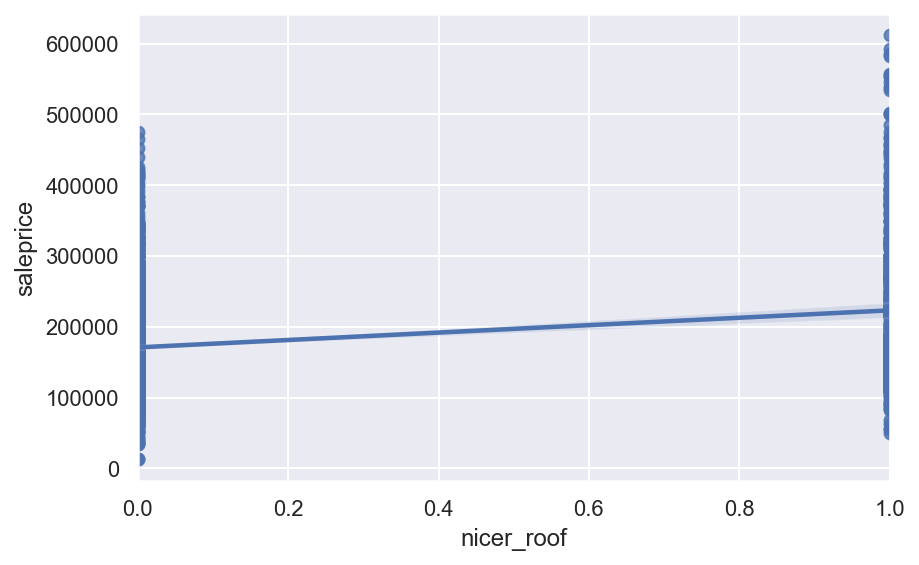

In [171]:
sns.regplot(x=df['nicer_roof'],y=df['saleprice']); 
#prices are on the higher range for houses with nicer roofs.

In [172]:
df.shape #108 columns now, compared to original 81 columns

(2051, 108)

In [173]:
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)

In [174]:
df.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL     55.228571     13517   Pave    NA   
1  544  531379050           60        RL     43.000000     11492   Pave    NA   
2  153  535304180           20        RL     68.000000      7922   Pave    NA   
3  318  916386060           60        RL     73.000000      9802   Pave    NA   
4  255  906425045           50        RL     82.000000     14235   Pave    NA   

   lot_shape land_contour  utilities lot_config  land_slope neighborhood  \
0          3          Lvl          4    CulDSac           3       Sawyer   
1          3          Lvl          4    CulDSac           3      SawyerW   
2          4          Lvl          4     Inside           3        NAmes   
3          4          Lvl          4     Inside           3       Timber   
4          3          Lvl          4     Inside           3      SawyerW   

  condition_1 condition_2 house_style  overall_qual  overall_cond  year_built  \
0        RRAe        Norm      2Story             6             8        1976   
1        Norm        Norm      2Story             7             5        1996   
2        Norm        Norm      1Story             5             7        1953   
3        Norm        Norm      2Story             5             5        2006   
4        Norm        Norm      1.5Fin             6             8        1900   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   mas_vnr_area  exter_qual  exter_cond foundation  bsmt_qual  bsmt_cond  \
0         289.0           4           3     CBlock          3          3   
1         132.0           4           3      PConc          4          3   
2           0.0           3           4     CBlock          3          3   
3           0.0           3           3      PConc          4          3   
4           0.0           3           3      PConc          2          4   

   bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  \
0              1               6         533.0               1           0.0   
1              1               6         637.0               1           0.0   
2              1               6         731.0               1           0.0   
3              1               1           0.0               1           0.0   
4              1               1           0.0               1           0.0   

   bsmt_unf_sf  total_bsmt_sf heating  heating_qc central_air  electrical  \
0        192.0          725.0    GasA           5           Y           1   
1        276.0          913.0    GasA           5           Y           1   
2        326.0         1057.0    GasA           3           Y           1   
3        384.0          384.0    GasA           4           Y           1   
4        676.0          676.0    GasA           3           Y           1   

   1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
0         725         754                0         1479             0.0   
1         913        1209                0         2122             1.0   
2        1057           0                0         1057             1.0   
3         744         700                0         1444             0.0   
4         831         614                0         1445             0.0   

   bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  \
0             0.0          2          1              3              1   
1             0.0          2          1              4              1   
2             0

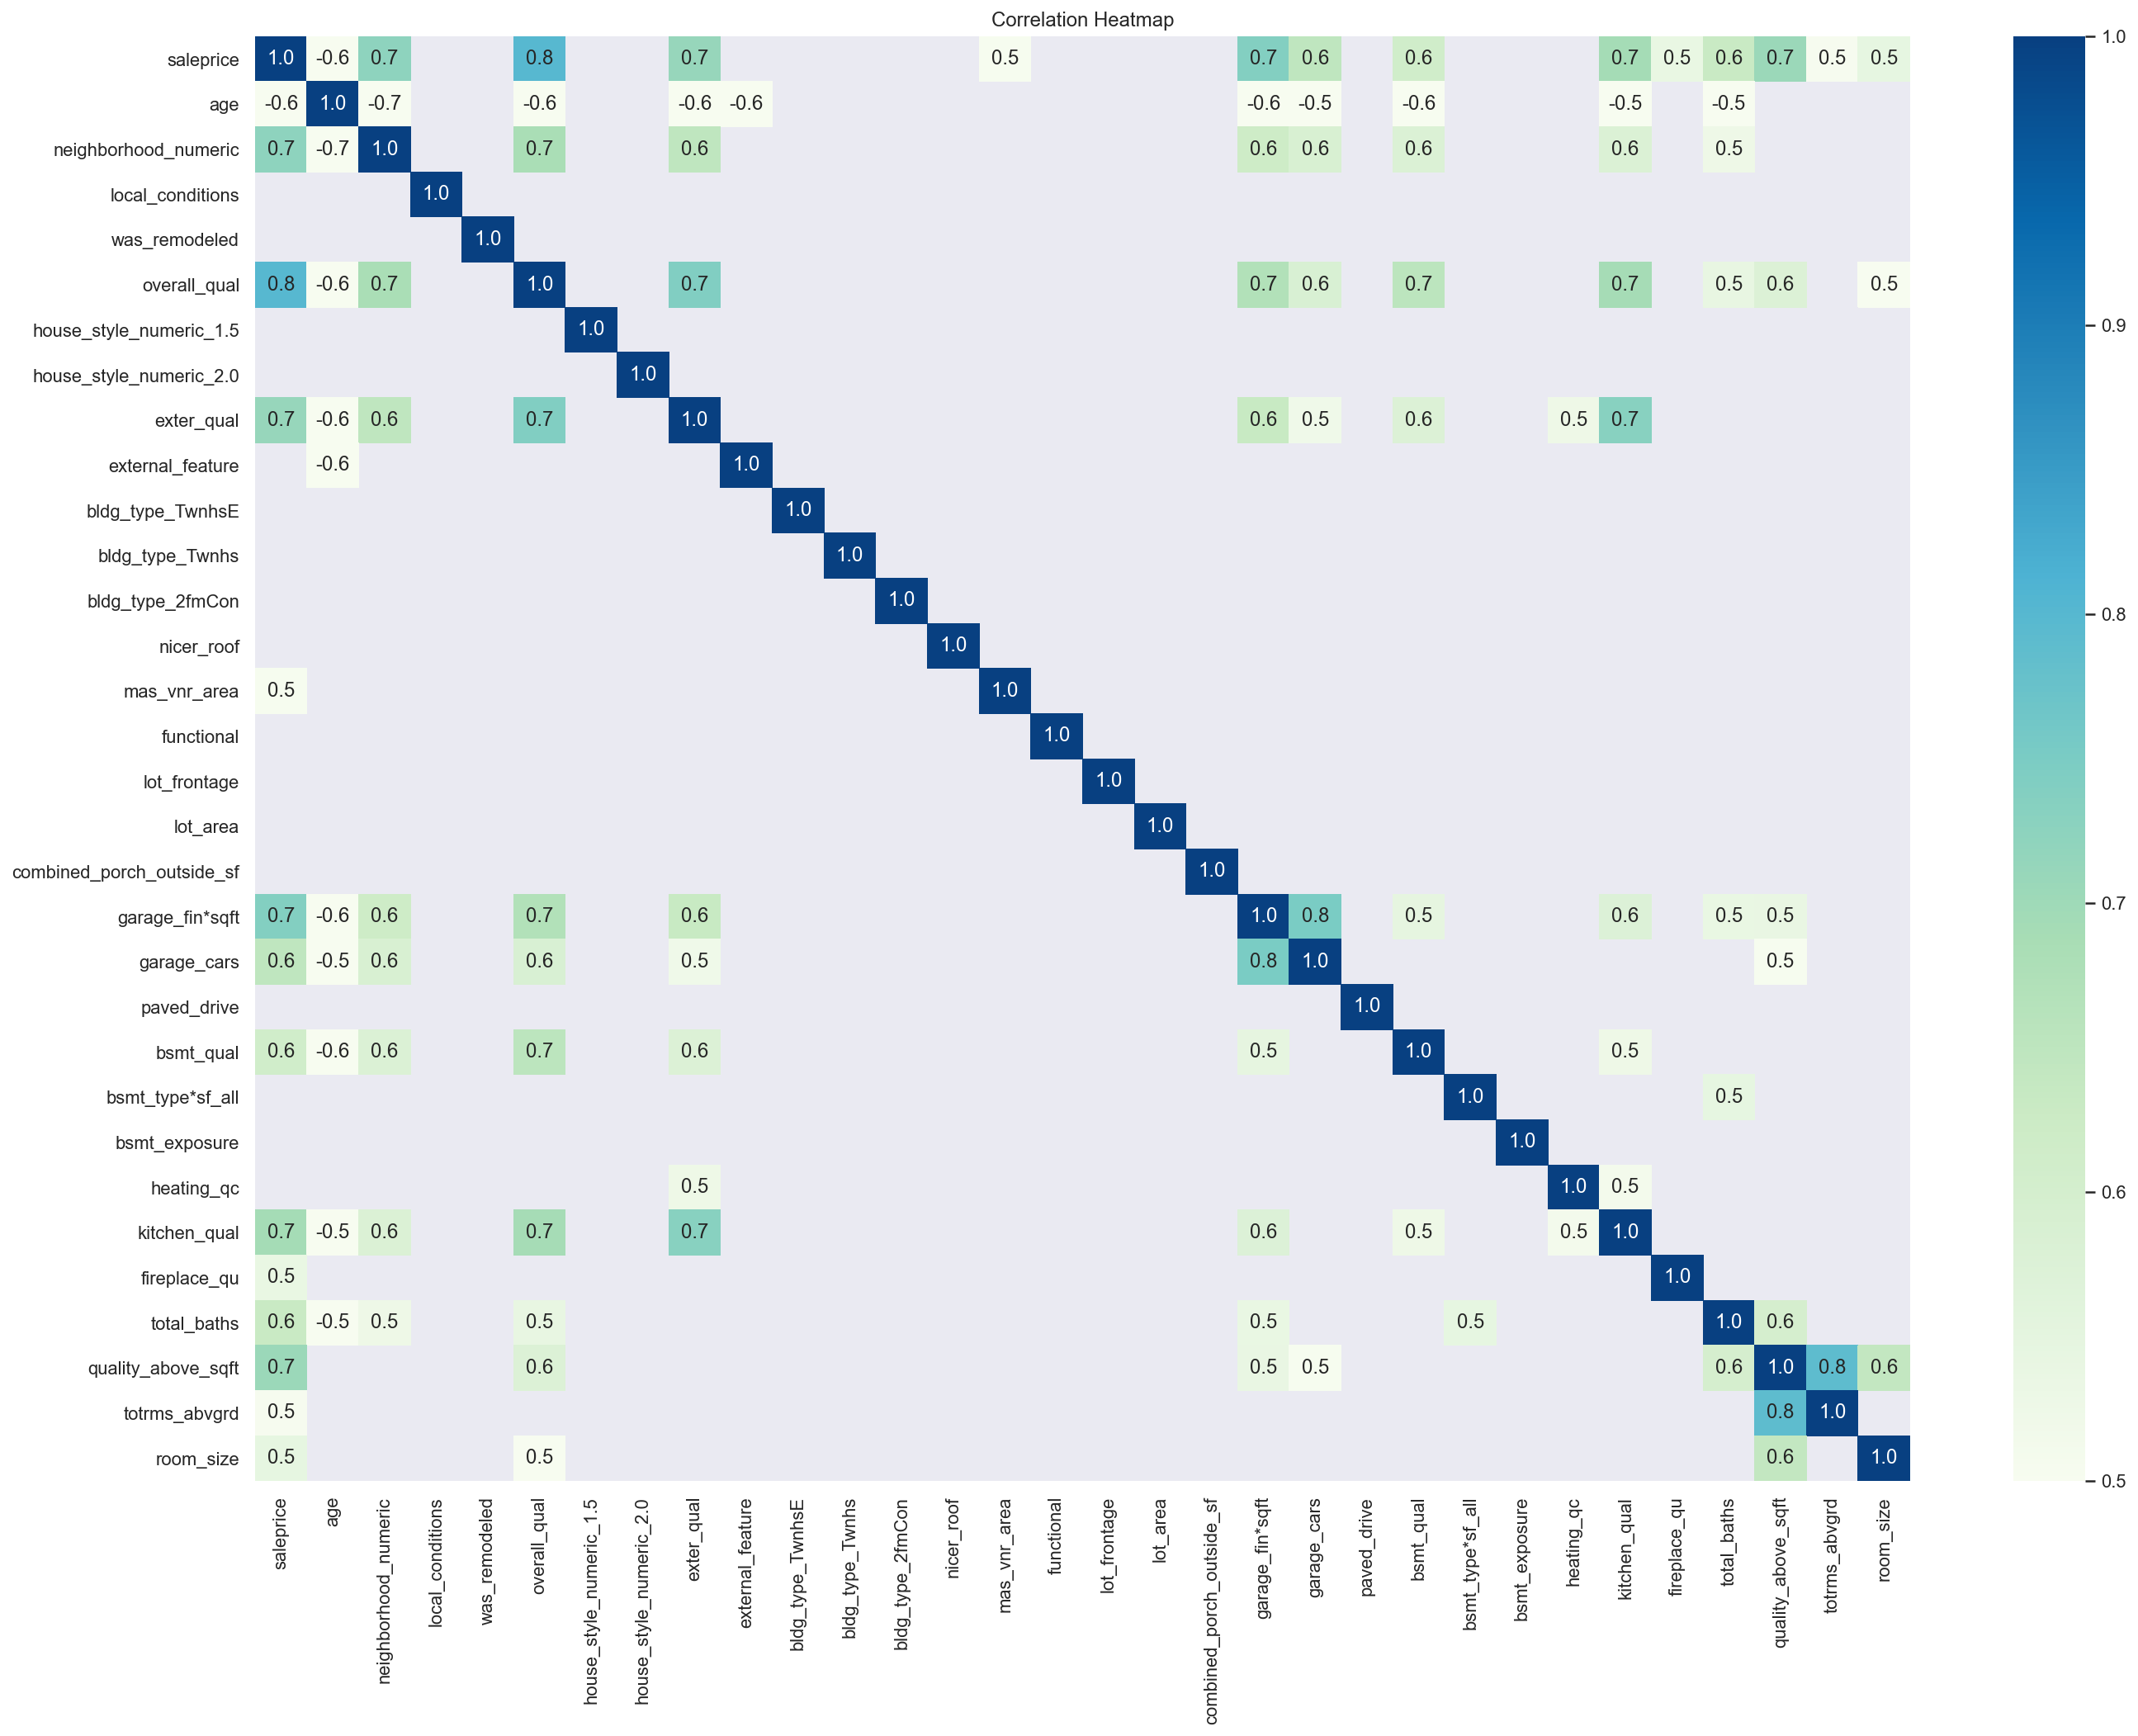

In [175]:
df_new=  df[['saleprice','age','neighborhood_numeric','local_conditions','was_remodeled','overall_qual', 
                  'house_style_numeric_1.5', 'house_style_numeric_2.0','exter_qual','external_feature',
                  'bldg_type_TwnhsE','bldg_type_Twnhs','bldg_type_2fmCon', 'nicer_roof','mas_vnr_area',  
                  'functional', 'lot_frontage', 'lot_area','combined_porch_outside_sf'
                  ,'garage_fin*sqft','garage_cars', 'paved_drive',
                 'bsmt_qual','bsmt_type*sf_all', 'bsmt_exposure',
                 'heating_qc','kitchen_qual', 'fireplace_qu', 'total_baths',  
                 'quality_above_sqft', 'totrms_abvgrd', 'room_size']]

corr_mat = df_new.corr()
high_corr_mat = corr_mat[abs(corr_mat)>=0.5]

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

# Plot correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

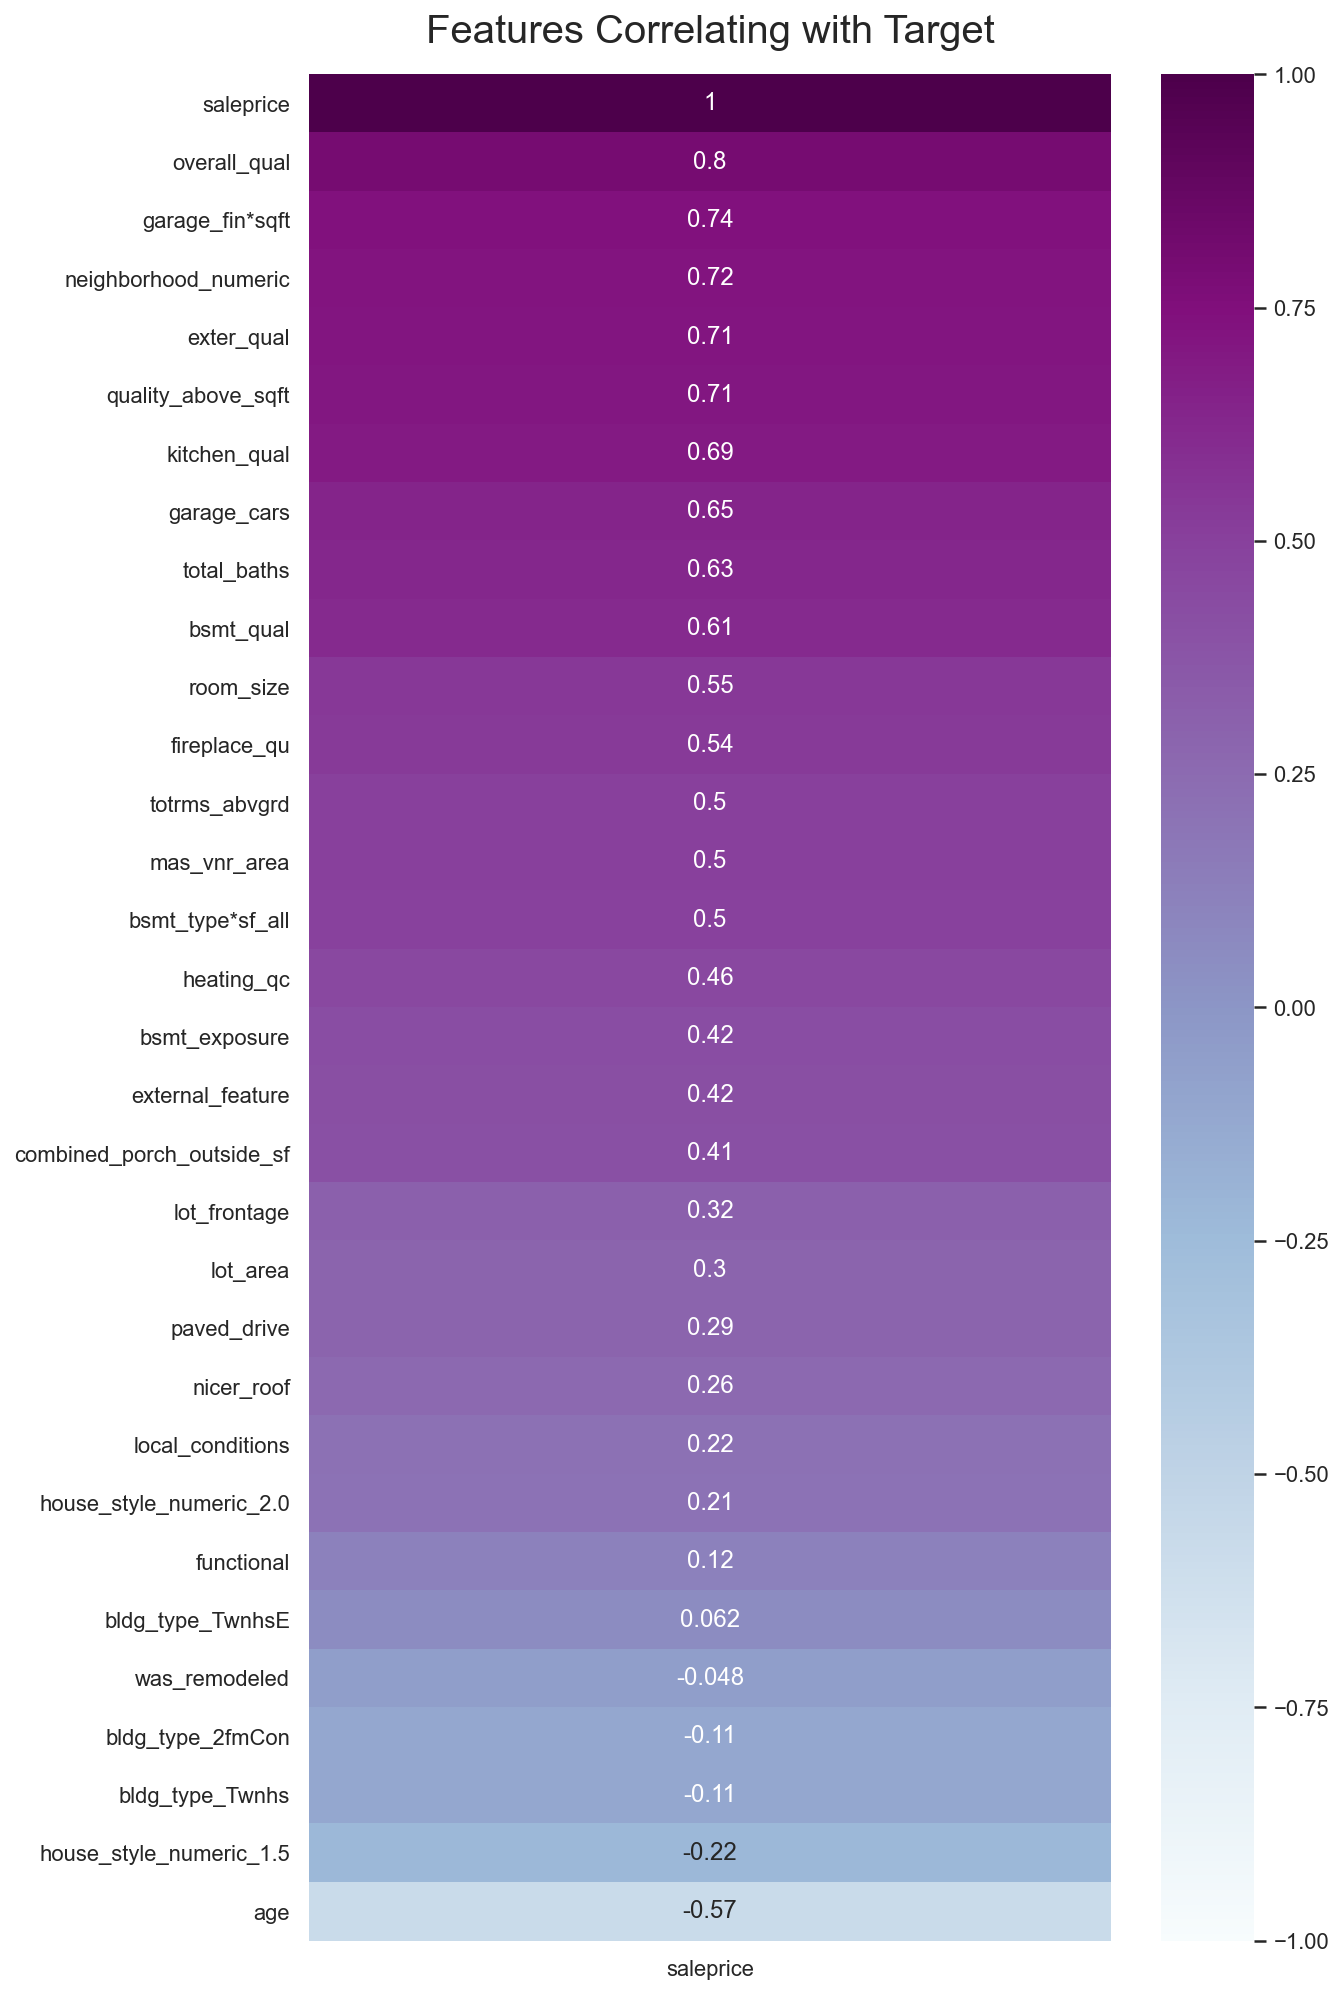

In [176]:
plt.figure(figsize=(8, 16))
heatmap = sns.heatmap(df_new.corr()[['saleprice']].sort_values(by='saleprice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BuPu')
heatmap.set_title('Features Correlating with Target', fontdict={'fontsize':20}, pad=16);

Sale price is correlated with 
- room size (0.5)
- total room above grade (0.5)
- quality above sqft (0.7) 
- total baths (0.6) 
- fireplace quality (0.5) 
- kitchen quality (0.7) 
- basement quality (0.6) 
- garage cars (0.6) 
- garage_fin*sqft (0.7)
- masonry veneer area(0.5)
- exterior quality 
- overall quality (0.8)
- neighbourhood (0.7)
- age (-0.6)

In [177]:
df_new.describe().T

count           mean           std      min  \
saleprice                  2051.0  181469.701609  79258.659352  12789.0   
age                        2051.0      36.066797     30.211061     -1.0   
neighborhood_numeric       2051.0       4.831302      2.272597      1.0   
local_conditions           2051.0       1.892735      0.403885      0.0   
was_remodeled              2051.0       0.462701      0.498728      0.0   
overall_qual               2051.0       6.112140      1.426271      1.0   
house_style_numeric_1.5    2051.0       0.136519      0.343422      0.0   
house_style_numeric_2.0    2051.0       0.301316      0.458942      0.0   
exter_qual                 2051.0       3.406143      0.587962      2.0   
external_feature           2051.0       7.759142      2.034701      2.0   
bldg_type_TwnhsE           2051.0       0.078498      0.269020      0.0   
bldg_type_Twnhs            2051.0       0.033642      0.180350      0.0   
bldg_type_2fmCon           2051.0       0.022428      0.148107      0.0   
nicer_roof                 2051.0       0.201365      0.401118      0.0   
mas_vnr_area               2051.0      98.626524    174.324690      0.0   
functional                 2051.0       1.922477      0.306573      0.0   
lot_frontage               2051.0      68.877439     21.613151     21.0   
lot_area                   2051.0   10065.208191   6742.488909   1300.0   
combined_porch_outside_sf  2051.0     183.065334    160.116258      0.0   
garage_fin*sqft            2051.0     916.139444    670.252650      0.0   
garage_cars                2051.0       1.775719      0.765357      0.0   
paved_drive                2051.0       1.833740      0.534792      0.0   
bsmt_qual                  2051.0       3.490005      0.901637      0.0   
bsmt_type*sf_all           2051.0    2444.008776   2693.591371      0.0   
bsmt_exposure              2051.0       1.628961      1.079440      0.0   
heating_qc                 2051.0       4.158459      0.964112      1.0   
kitchen_qual               2051.0       3.517309      0.665577      2.0   
fireplace_qu               2051.0       1.763530      1.807074      0.0   
total_baths                2051.0       2.221599      0.807294      1.0   
quality_above_sqft         2051.0    1488.304242    500.016702    249.0   
totrms_abvgrd              2051.0       6.435885      1.560225      2.0   
room_size                  2051.0     231.768744     45.291063    120.0   

                                   25%           50%       75%            max  
saleprice                  129825.0000  162500.00000  214000.0  611657.000000  
age                             7.0000      34.00000      54.0     136.000000  
neighborhood_numeric            3.0000       5.00000       6.0       9.000000  
local_conditions                2.0000       2.00000       2.0       4.000000  
was_remodeled                   0.0000       0.00000       1.0       1.000000  
overall_qual                    5.0000       6.00000       7.0      10.000000  
house_style_numeric_1.5         0.0000       0.00000       0.0       1.000000  
house_style_numeric_2.0         0.0000       0.00000       1.0       1.000000  
exter_qual                      3.0000       3.00000       4.0       5.000000  
external_feature                6.0000       7.00000      10.0      10.000000  
bldg_type_TwnhsE                0.0000       0.00000       0.0       1.000000  
bldg_type_Twnhs                 0.0000       0.00000       0.0       1.000000  
bldg_type_2fmCon                0.0000       0.00000       0.0       1.000000  
nicer_roof                      0.0000       0.00000       0.0       1.000000  
mas_vnr_area                    0.0000       0.00000     159.0    1600.000000  
functional                      2.0000       2.00000       2.0       2.000000  
lot_frontage                   59.0000      66.95278      80.0     313.000000  
lot_area                     7500.0000    9430.00000   11513.5  159000.000000  
combined_porch_outside_sf      4

### Time to Drop Outliers 

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64
1035    475000
1700    485000
1227    500000
800     500067
81      501837
1592    535000
823     538000
138     545224
623     552000
1164    555000
151     556581
1796    582933
1692    584500
1964    591587
1671    611657
Name: saleprice, dtype: int64


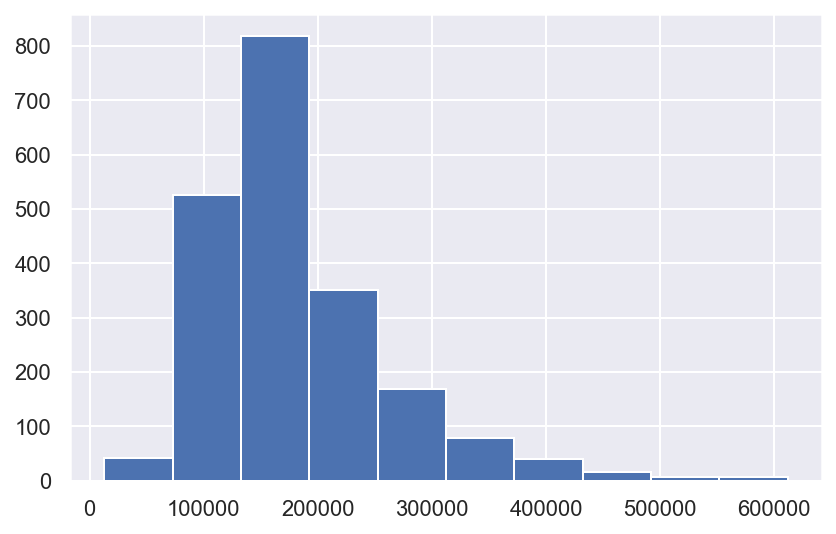

In [178]:
print(df['saleprice'].describe().T)
print(df['saleprice'].sort_values().tail(15))
df['saleprice'].hist();

In [179]:
print(f'Four + stdevs from mean {(79258.659352*4)+181469.701609}. Where max is 611657.000000' )
print(f'Four - stdevs from mean {(-79258.659352*4)+181469.701609}. Where min is 12789.000000')

Four + stdevs from mean 498504.33901700005. Where max is 611657.000000
Four - stdevs from mean -135564.935799. Where min is 12789.000000


In [180]:
df[(df['saleprice'] > 498504.33901700005)] 
#13 houses have 4 stdevs from the mean. Remove as outliers.

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
81     367  527214050           20        RL          63.0     17423   Pave   
138   2331  527210040           60        RL          60.0     18062   Pave   
151   2333  527212030           60        RL          85.0     16056   Pave   
623    457  528176030           20        RL         100.0     14836   Pave   
800   1702  528118050           20        RL          59.0     17169   Pave   
823     16  527216070           60        RL          47.0     53504   Pave   
1164   424  528106020           20        RL         105.0     15431   Pave   
1227    47  528176010           20        RL         110.0     14300   Pave   
1592  2335  527214060           60        RL          82.0     16052   Pave   
1671    45  528150070           20        RL         100.0     12919   Pave   
1692  2451  528360050           60        RL         114.0     17242   Pave   
1796   434  528110090           60        RL         107.0     13891   Pave   
1964  1638  527216080           20        RL          52.0     51974   Pave   

     alley  lot_shape land_contour  utilities lot_config  land_slope  \
81      NA          3          Lvl          4    CulDSac           3   
138     NA          3          HLS          4    CulDSac           3   
151     NA          3          Lvl          4     Inside           3   
623     NA          3          HLS          4     Inside           1   
800     NA          2          Lvl          4    CulDSac           3   
823     NA          2          HLS          4    CulDSac           1   
1164    NA          4          Lvl          4     Inside           3   
1227    NA          4          HLS          4     Inside           1   
1592    NA          3          Lvl          4    CulDSac           3   
1671    NA          3          Lvl          4     Inside           3   
1692    NA          3          Lvl          4     Inside           3   
1796    NA          4          Lvl          4     Inside           3   
1964    NA          3          Lvl          4    CulDSac           3   

     neighborhood condition_1 condition_2 house_style  overall_qual  \
81        StoneBr        Norm        Norm      1Story             9   
138       StoneBr        Norm        Norm      2Story            10   
151       StoneBr        Norm        Norm      2Story             9   
623       NridgHt        Norm        Norm      1Story            10   
800       NridgHt        Norm        Norm      1Story            10   
823       StoneBr        Norm        Norm      2Story             8   
1164      NridgHt        Norm        Norm      1Story            10   
1227      NridgHt        Norm        Norm      1Story             9   
1592      StoneBr        Norm        Norm      2Story            10   
1671      NridgHt        Norm        Norm      1Story             9   
1692      NoRidge        Norm        Norm      2Story             9   
1796      NridgHt        Norm        Norm      2Story             9   
1964      StoneBr        PosN        Norm      1Story             9   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
81               5        2008            2009        Hip   CompShg   
138              5        2006            2006        Hip   CompShg   
151              5        2005            2006        Hip   CompShg   
623              5        2004            2005        Hip   CompShg   
800              5        2007            2007        Hip   CompShg   
823              5        2003            2003        Hip   CompShg   
1164             5        2008            2008        Hip   CompShg   
1227             5        2003            2004        Hip   CompShg   
1592             5        2006            2006        Hip   CompShg   
1671             5        2009            2010        Hip   CompShg   
1692             5        1993            1994        Hip   CompShg   
1796             5        2008            200

In [181]:
df[(df['saleprice'] < -135564.935799)] 
#No houses with below 4 standard deviation from mean. 

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, 1st_flr_sf, 2nd_flr_sf, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, 3ssn_porch, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type, saleprice, neighborhood_numeric, positive_condition1, positive_condition2, local_conditions, sale_type_numeric, exterior_numeric1, exterior_numeric2, external_feature, house_style_numeric_1.5, house_style_numeric_2.0, bldg_type_2fmCon, bldg_type_Duplex, bldg_type_Twnhs, bldg_type_TwnhsE, age, was_remodeled, basement_overall, bsmt_type*sf_all, garage_fin*sqft, quality_above_sqft, ...]
Index: []

In [182]:
df = df[(df['saleprice'] < 498504.33901700005)] 

In [183]:
df.shape

(2038, 108)

In [184]:
df[(df['year_built']<1899) & (df['saleprice']>290000)]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1035  2667  902400110           75        RM          90.0     22950   Pave   
1141  1321  902401120           75        RM          75.0     13500   Pave   
1939  1307  902207220           75        RM          87.0     18386   Pave   

     alley  lot_shape land_contour  utilities lot_config  land_slope  \
1035    NA          2          Lvl          4     Inside           3   
1141    NA          4          Lvl          4     Inside           3   
1939    NA          4          Lvl          4     Inside           3   

     neighborhood condition_1 condition_2 house_style  overall_qual  \
1035      OldTown      Artery        Norm      2.5Fin            10   
1141      OldTown      Artery        PosA      2.5Unf            10   
1939      OldTown        Norm        Norm      2.5Fin             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1035             9        1892            1993      Gable   WdShngl   
1141             9        1893            2000      Gable   CompShg   
1939             9        1880            2002      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  exter_qual  \
1035      Wd Sdng      Wd Sdng         None           0.0           4   
1141      Wd Sdng      Wd Sdng         None           0.0           5   
1939      CemntBd      CmentBd         None           0.0           3   

      exter_cond foundation  bsmt_qual  bsmt_cond  bsmt_exposure  \
1035           4     BrkTil          3          3              2   
1141           5     BrkTil          3          3              1   
1939           3     BrkTil          3          3              1   

      bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  \
1035               1           0.0               1           0.0       1107.0   
1141               1           0.0               1           0.0       1237.0   
1939               1           0.0               1           0.0       1470.0   

      total_bsmt_sf heating  heating_qc central_air  electrical  1st_flr_sf  \
1035         1107.0    GasA           5           Y           1        1518   
1141         1237.0    GasA           4           Y           1        1521   
1939         1470.0    GasA           5           Y           1        1675   

      2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
1035        1518              572         3608             0.0   
1141        1254                0         2775             0.0   
1939        1818                0         3493             0.0   

      bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  \
1035             0.0          2          1              4              1   
1141             0.0          3          1              3              1   
1939             0.0          3          0              3              1   

      kitchen_qual  totrms_abvgrd  functional  fireplaces  fireplace_qu  \
1035             5             12           2           2             3   
1141             4              9           2           1             4   
1939             4             10           2           1             5   

     garage_type  garage_yr_blt  garage_finish  garage_cars  garage_area  \
1035      Detchd         1993.0              1          3.0        840.0   
1141      Detchd         1988.0              1          2.0        880.0   
1939      Attchd         2003.0              1          3.0        870.0   

      garage_qual  garage_cond  paved_drive  wood_deck_sf  open_porch_sf  \
1035            5            3            2             0            260   
1141            4            3            2           105            502   
1939            3            3            2           302              0   

      enclosed_porch  3ssn_porch  screen_porch  pool_area  pool_qc  fence  \
1035               0           0           410          0        0

In [185]:
df = df[df['id'] != 2667]
df = df[df['id'] != 1321]
df = df[df['id'] != 1307]

In [186]:
#dropping sqft outliers for basement/frontage/first floor
df = df[df['id'] != 1499]
df = df[df['id'] != 2181]

In [187]:
df_new.shape
#18 outliers dropped 

(2051, 32)

In [188]:
df_new = df[['saleprice','age','neighborhood_numeric','local_conditions','was_remodeled','overall_qual', 
                  'house_style_numeric_1.5', 'house_style_numeric_2.0','exter_qual','external_feature',
                  'bldg_type_TwnhsE','bldg_type_Twnhs','bldg_type_2fmCon', 'nicer_roof','mas_vnr_area',  
                  'functional', 'lot_frontage', 'lot_area','combined_porch_outside_sf'
                  ,'garage_fin*sqft','garage_cars', 'paved_drive',
                 'bsmt_qual','bsmt_type*sf_all', 'bsmt_exposure',
                 'heating_qc','kitchen_qual', 'fireplace_qu', 'total_baths',  
                 'quality_above_sqft', 'totrms_abvgrd', 'room_size']]

In [189]:
df_new.shape

(2033, 32)

In [190]:
df_new.to_csv('../project_2/datasets/cleaned_train_data', index = False)

In [191]:
df_new.describe().T

count           mean           std      min  \
saleprice                  2033.0  178849.543532  73440.103247  12789.0   
age                        2033.0      36.192327     30.035427      0.0   
neighborhood_numeric       2033.0       4.811608      2.253698      1.0   
local_conditions           2033.0       1.892277      0.403850      0.0   
was_remodeled              2033.0       0.460895      0.498591      0.0   
overall_qual               2033.0       6.083620      1.397725      1.0   
house_style_numeric_1.5    2033.0       0.137727      0.344699      0.0   
house_style_numeric_2.0    2033.0       0.299065      0.457961      0.0   
exter_qual                 2033.0       3.394491      0.574909      2.0   
external_feature           2033.0       7.749139      2.032955      2.0   
bldg_type_TwnhsE           2033.0       0.079193      0.270107      0.0   
bldg_type_Twnhs            2033.0       0.033940      0.181119      0.0   
bldg_type_2fmCon           2033.0       0.022627      0.148747      0.0   
nicer_roof                 2033.0       0.195770      0.396890      0.0   
mas_vnr_area               2033.0      94.284801    165.387579      0.0   
functional                 2033.0       1.922282      0.307166      0.0   
lot_frontage               2033.0      68.613196     20.854514     21.0   
lot_area                   2033.0    9939.434333   6472.912858   1300.0   
combined_porch_outside_sf  2033.0     180.685686    156.400223      0.0   
garage_fin*sqft            2033.0     902.987703    652.070693      0.0   
garage_cars                2033.0       1.765863      0.760928      0.0   
paved_drive                2033.0       1.832268      0.536926      0.0   
bsmt_qual                  2033.0       3.480079      0.896582      0.0   
bsmt_type*sf_all           2033.0    2387.641417   2505.929101      0.0   
bsmt_exposure              2033.0       1.616331      1.069609      0.0   
heating_qc                 2033.0       4.151500      0.965278      1.0   
kitchen_qual               2033.0       3.505657      0.655903      2.0   
fireplace_qu               2033.0       1.743237      1.801406      0.0   
total_baths                2033.0       2.209297      0.798373      1.0   
quality_above_sqft         2033.0    1474.505657    472.290935    249.0   
totrms_abvgrd              2033.0       6.400394      1.510801      2.0   
room_size                  2033.0     231.192394     44.747013    120.0   

                                     25%           50%            75%  \
saleprice                  129500.000000  161000.00000  213000.000000   
age                             7.000000      34.00000      54.000000   
neighborhood_numeric            3.000000       5.00000       6.000000   
local_conditions                2.000000       2.00000       2.000000   
was_remodeled                   0.000000       0.00000       1.000000   
overall_qual                    5.000000       6.00000       7.000000   
house_style_numeric_1.5         0.000000       0.00000       0.000000   
house_style_numeric_2.0         0.000000       0.00000       1.000000   
exter_qual                      3.000000       3.00000       4.000000   
external_feature                6.000000       7.00000      10.000000   
bldg_type_TwnhsE                0.000000       0.00000       0.000000   
bldg_type_Twnhs                 0.000000       0.00000       0.000000   
bldg_type_2fmCon                0.000000       0.00000       0.000000   
nicer_roof                      0.000000       0.00000       0.000000   
mas_vnr_area                    0.000000       0.00000     150.000000   
functional                      2.000000       2.00000       2.000000   
lot_frontage                   59.000000      66.95278      80.000000   
lot_area                     7500.000000    9373.00000   11428.000000   
combined_porch_outside_sf      48.000000     163.00000     266.000000   
garage_fin*sqft               384.000000     768.00000    1302.000000   
garage_cars        

### Now time to rename the columns

In [192]:
df_new = pd.read_csv('../project_2/datasets/cleaned_train_data')

In [193]:
df_new.head()

saleprice  age  neighborhood_numeric  local_conditions  was_remodeled  \
0     130500   34                     3                 1              1   
1     220000   13                     6                 2              1   
2     109000   57                     4                 2              1   
3     174000    4                     7                 2              1   
4     138500  110                     6                 2              1   

   overall_qual  house_style_numeric_1.5  house_style_numeric_2.0  exter_qual  \
0             6                        0                        1           4   
1             7                        0                        1           4   
2             5                        0                        0           3   
3             5                        0                        1           3   
4             6                        1                        0           3   

   external_feature  bldg_type_TwnhsE  bldg_type_Twnhs  bldg_type_2fmCon  \
0                 7                 0                0                 0   
1                10                 0                0                 0   
2                10                 0                0                 0   
3                10                 0                0                 0   
4                 7                 0                0                 0   

   nicer_roof  mas_vnr_area  functional  lot_frontage  lot_area  \
0           0         289.0           2     55.228571     13517   
1           0         132.0           2     43.000000     11492   
2           0           0.0           2     68.000000      7922   
3           0           0.0           2     73.000000      9802   
4           0           0.0           2     82.000000     14235   

   combined_porch_outside_sf  garage_fin*sqft  garage_cars  paved_drive  \
0                         44            950.0          2.0            2   
1                         74           1118.0          2.0            2   
2                         52            246.0          1.0            2   
3                        100           1200.0          2.0            2   
4                         59            484.0          2.0            0   

   bsmt_qual  bsmt_type*sf_all  bsmt_exposure  heating_qc  kitchen_qual  \
0          3            3198.0              1           5             4   
1          4            3822.0              1           5             4   
2          3            4386.0              1           3             4   
3          4               0.0              1           4             3   
4          2               0.0              1           3             3   

   fireplace_qu  total_baths  quality_above_sqft  totrms_abvgrd   room_size  
0             0          2.5                1479              6  246.500000  
1             3          3.5                2122              8  265.250000  
2             0          2.0                1057              5  211.400000  
3             0          2.5                1444              7  206.285714  
4             0          2.0                1445              6  240.833333

In [194]:
df_new.rename(columns={'saleprice': 'saleprice', #no change
                          'age': 'building_age',#engineered from 
                           'neighborhood_numeric': 'neighborhood_by_medianprice',#engineered from 
                           'local_conditions': 'positive_features',#engineered from 
                           'was_remodeled': 'remodeled_home',#engineered from 
                           'overall_qual': 'overall_home_quality',#no change
                           'house_style_numeric_1.5': 'single_storey_home',#engineered from 
                           'house_style_numeric_2.0': 'multiple_storey_home',#engineered from 
                           'exter_qual': 'quality_of_exterior_material', #no change
                           'external_feature': 'type_of_exterior_covering_house',#engineered from 
                           'bldg_type_TwnhsE': 'middle_unit_townhouse',#engineered from 
                           'bldg_type_Twnhs': 'end_unit_townhouse',#engineered from 
                           'bldg_type_2fmCon': 'family_house',#engineered from 
                           'nicer_roof': 'good_roof_quality',#engineered from 
                           'mas_vnr_area': 'masonry_veneer_sqft',#no change
                           'functional': 'home_functionality',#no change
                           'lot_frontage': 'lot_frontage',#no change
                           'lot_area': 'lot_size', #no change
                           'combined_porch_outside_sf': 'outdoor_porch_space',#engineered from 
                           'garage_fin*sqft': 'garage_space',#engineered from 
                           'garage_cars': 'size_of_car_garage',#no change
                           'paved_drive': 'paved_driveway',#no change
                           'bsmt_qual': 'basement_quality', #no change
                           'bsmt_type*sf_all': 'finished_basement_in_sqft', #engineered from 
                           'bsmt_exposure': 'basement_ceiling_height', #no change
                           'heating_qc': 'heater_quality',#no change
                           'kitchen_qual': 'kitchen_quality ',#no change
                           'fireplace_qu': 'fireplace_quality', #no change
                           'quality_above_sqft': 'finished_upstairs_in_sqft',#engineered from 
                           'totrms_abvgrd': 'rooms_upstairs', #engineered from 
                           'room_size': 'size_of_rooms', #engineered from 
                           'total_baths': "total_number_of_baths"}, inplace=True)

In [195]:
df_new.head()

saleprice  building_age  neighborhood_by_medianprice  positive_features  \
0     130500            34                            3                  1   
1     220000            13                            6                  2   
2     109000            57                            4                  2   
3     174000             4                            7                  2   
4     138500           110                            6                  2   

   remodeled_home  overall_home_quality  single_storey_home  \
0               1                     6                   0   
1               1                     7                   0   
2               1                     5                   0   
3               1                     5                   0   
4               1                     6                   1   

   multiple_storey_home  quality_of_exterior_material  \
0                     1                             4   
1                     1                             4   
2                     0                             3   
3                     1                             3   
4                     0                             3   

   type_of_exterior_covering_house  middle_unit_townhouse  end_unit_townhouse  \
0                                7                      0                   0   
1                               10                      0                   0   
2                               10                      0                   0   
3                               10                      0                   0   
4                                7                      0                   0   

   family_house  good_roof_quality  masonry_veneer_sqft  home_functionality  \
0             0                  0                289.0                   2   
1             0                  0                132.0                   2   
2             0                  0                  0.0                   2   
3             0                  0                  0.0                   2   
4             0                  0                  0.0                   2   

   lot_frontage  lot_size  outdoor_porch_space  garage_space  \
0     55.228571     13517                   44         950.0   
1     43.000000     11492                   74        1118.0   
2     68.000000      7922                   52         246.0   
3     73.000000      9802                  100        1200.0   
4     82.000000     14235                   59         484.0   

   size_of_car_garage  paved_driveway  basement_quality  \
0                 2.0               2                 3   
1                 2.0               2                 4   
2                 1.0               2                 3   
3                 2.0               2                 4   
4                 2.0               0                 2   

   finished_basement_in_sqft  basement_ceiling_height  heater_quality  \
0                     3198.0                        1               5   
1                     3822.0                        1               5   
2                     4386.0                        1               3   
3                        0.0                        1               4   
4                        0.0                        1               3   

   kitchen_quality   fireplace_quality  total_number_of_baths  \
0                 4                  0                    2.5   
1                 4                  3                    3.5   
2                 4                  0                    2.0   
3                 3                  0                    2.5   
4                 3                  0                    2.0   

   finished_upstairs_in_sqft  rooms_upstairs  size_of_rooms  
0                       1479               6     246.500000  
1                       2122               8     265.250000  
2                       1057               5     211.400000  
3                       1444    

In [196]:
p_val = df_new.corr()['saleprice'].sort_values(ascending=False)
p_val

saleprice                          1.000000
overall_home_quality               0.806832
garage_space                       0.748715
neighborhood_by_medianprice        0.740200
finished_upstairs_in_sqft          0.719890
quality_of_exterior_material       0.708434
kitchen_quality                    0.690418
size_of_car_garage                 0.652584
total_number_of_baths              0.633095
basement_quality                   0.620684
size_of_rooms                      0.564769
fireplace_quality                  0.543341
finished_basement_in_sqft          0.516757
rooms_upstairs                     0.478775
masonry_veneer_sqft                0.472358
heater_quality                     0.468068
type_of_exterior_covering_house    0.432348
basement_ceiling_height            0.415380
outdoor_porch_space                0.400169
lot_frontage                       0.335437
paved_driveway                     0.303855
lot_size                           0.274077
good_roof_quality               

In [197]:
p_val_high = p_val[p_val>0.5]
p_val_high.index

Index(['saleprice', 'overall_home_quality', 'garage_space',
       'neighborhood_by_medianprice', 'finished_upstairs_in_sqft',
       'quality_of_exterior_material', 'kitchen_quality ',
       'size_of_car_garage', 'total_number_of_baths', 'basement_quality',
       'size_of_rooms', 'fireplace_quality', 'finished_basement_in_sqft'],
      dtype='object')

In [198]:
response = ['saleprice']
p_val_high.index.isin(response)

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [199]:
~p_val_high.index.isin(response)

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [200]:
response = ['saleprice']
top_corr_features = p_val_high[~p_val_high.index.isin(response)]
print(top_corr_features.index)
top_corr_features
#To see what are the top features that have the highest correlations with sale price. 

Index(['overall_home_quality', 'garage_space', 'neighborhood_by_medianprice',
       'finished_upstairs_in_sqft', 'quality_of_exterior_material',
       'kitchen_quality ', 'size_of_car_garage', 'total_number_of_baths',
       'basement_quality', 'size_of_rooms', 'fireplace_quality',
       'finished_basement_in_sqft'],
      dtype='object')


overall_home_quality            0.806832
garage_space                    0.748715
neighborhood_by_medianprice     0.740200
finished_upstairs_in_sqft       0.719890
quality_of_exterior_material    0.708434
kitchen_quality                 0.690418
size_of_car_garage              0.652584
total_number_of_baths           0.633095
basement_quality                0.620684
size_of_rooms                   0.564769
fireplace_quality               0.543341
finished_basement_in_sqft       0.516757
Name: saleprice, dtype: float64

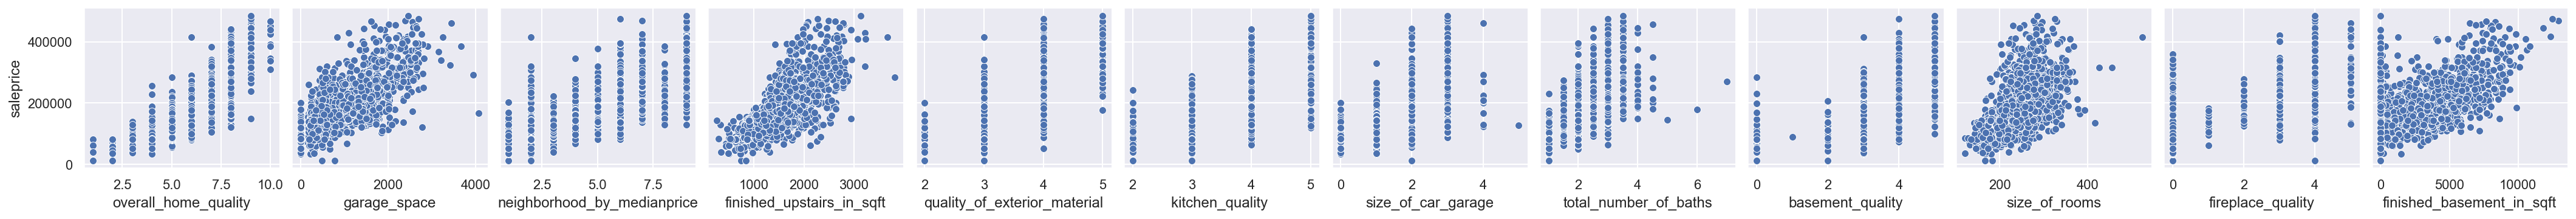

In [201]:
sns.pairplot(df_new, y_vars=['saleprice'], x_vars=top_corr_features.index);

# Training and Testing Data
Now that we've explored and cleaned the data a bit, let's go ahead and split the data into training and testing sets. 

In [202]:
# Create X and y.
X = df_new.drop('saleprice', axis=1)# take all cols except, 'quality' --> response
y = df_new['saleprice']

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [204]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1423, 31)
(610, 31)
(1423,)
(610,)


In [205]:
X.columns

Index(['building_age', 'neighborhood_by_medianprice', 'positive_features',
       'remodeled_home', 'overall_home_quality', 'single_storey_home',
       'multiple_storey_home', 'quality_of_exterior_material',
       'type_of_exterior_covering_house', 'middle_unit_townhouse',
       'end_unit_townhouse', 'family_house', 'good_roof_quality',
       'masonry_veneer_sqft', 'home_functionality', 'lot_frontage', 'lot_size',
       'outdoor_porch_space', 'garage_space', 'size_of_car_garage',
       'paved_driveway', 'basement_quality', 'finished_basement_in_sqft',
       'basement_ceiling_height', 'heater_quality', 'kitchen_quality ',
       'fireplace_quality', 'total_number_of_baths',
       'finished_upstairs_in_sqft', 'rooms_upstairs', 'size_of_rooms'],
      dtype='object')

In [206]:
y

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2028    298751
2029     82500
2030    177000
2031    144000
2032    189000
Name: saleprice, Length: 2033, dtype: int64

- Train test split the data already 
##### Model 1) Linear regression model (unscaled data)
    - instantiate, fit and predict using linear regression, followed by evaluating this model using RMSE [np.sqrt(metrics.mean_squared_error(y_test, predictions)))]


##### Model 2) Linear regression model (scaled data)
    - ss = StandardScaler()
    - Z_train = ss.fit_transform(X_train)# the same as doing ss.fit(X_train), then X_train=ss.transform(X_train)
    - Z_test = ss.transform(X_test)
    
    - instantiate, fit and predict using linear regression, followed by evaluating this model using RMSE [np.sqrt(metrics.mean_squared_error(y_test, predictions)))]
    
    
    



We'll be evaluating `LinearRegression`, `LassoCV` and `RidgeCV`, and see which one yields the best model metric.

#### Linear Regression Model,  unscaled

In [207]:
#instantiate Linear Regression model
lr = LinearRegression()

In [208]:
#fitting model on unscaled data
lr.fit(X_train, y_train)

LinearRegression()

In [209]:
print(len(lr.coef_)) #matches our number of columns
lr.coef_

31


array([-9.62434594e+01,  3.50281292e+03,  8.51521883e+03,  6.17790954e+03,
        8.90612472e+03, -8.52586639e+02, -8.97183225e+03,  1.23200176e+04,
        9.42881373e+02, -1.06603912e+04, -9.46426225e+03, -1.30044598e+03,
        5.17317498e+03,  1.91331560e+01,  1.41711019e+04,  1.01483457e+02,
        5.32560601e-01,  1.75831603e+01,  1.07078049e+01,  1.78381010e+03,
        7.25082439e+02,  2.26225317e+03,  5.20221002e+00,  1.79080998e+03,
        9.20297002e+02,  9.82491707e+03,  1.90951964e+03, -3.74426407e+03,
        4.01937041e+01,  2.80673242e+03,  9.68020577e+01])

In [212]:
# How does the model score (R^2) on the training and test data? R^2 scores are not very far off! 
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9021075609167194
0.8943876499227205


In [213]:
#let's evaluate our models! 
predictions = lr.predict(X_test)

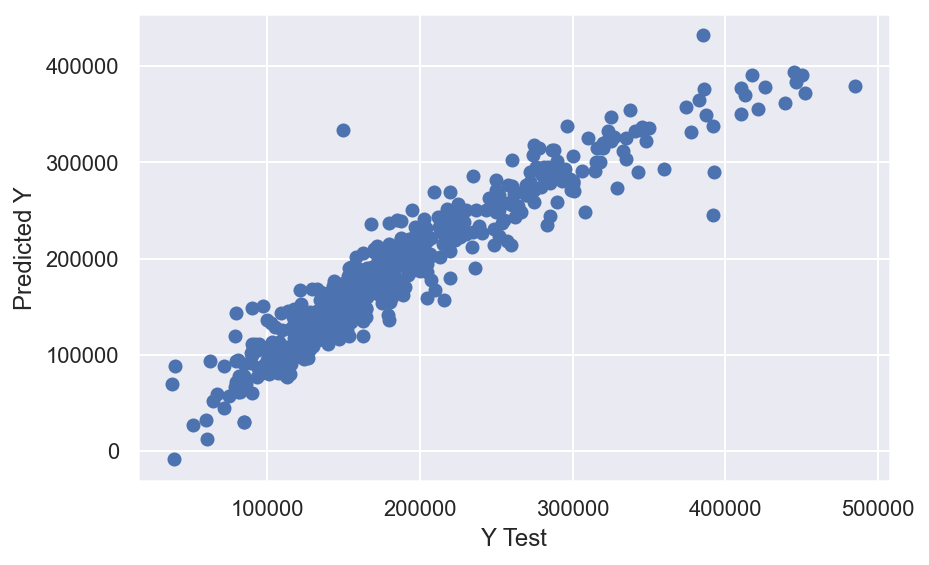

In [214]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y');

In [215]:
print('RMSE using OLS for unscaled data:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE using OLS for unscaled data: 24722.10969069088


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


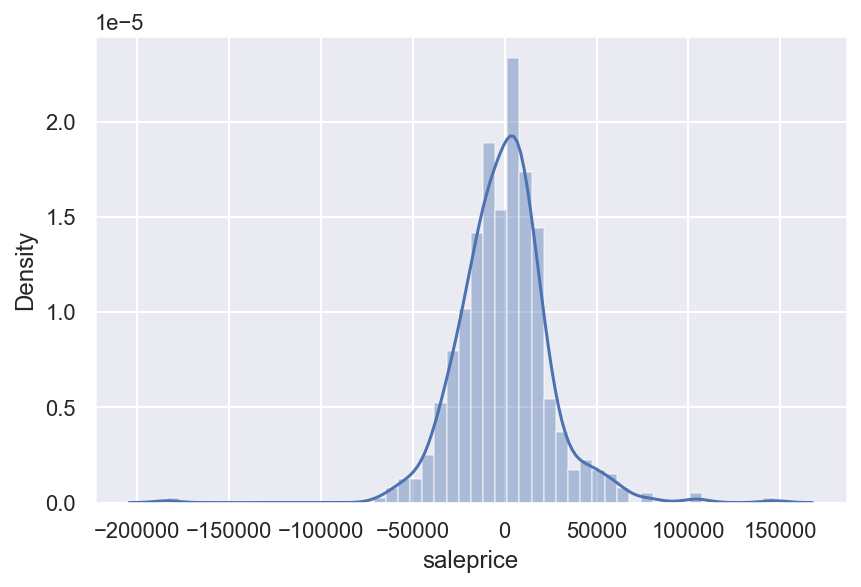

In [216]:
sns.distplot((y_test-predictions),bins=50);

#### Linear Regression Model, scaled (every model from here onwards will be scaled) 

In [217]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [218]:
lr_standardized = LinearRegression()

In [219]:
# cross_val_score: Evaluates a score by cross-validation. number of folds is given in cv
lr_scores = cross_val_score(lr_standardized, Z_train, y_train, cv=7)

print(lr_scores) # to show r^2 from each of the 7 fold validations
lr_scores.mean() # to average r^2 from across cv evaluations

[0.88589957 0.89426858 0.90412263 0.87813345 0.90397953 0.88982432
 0.90543587]


0.8945234217219522

In [220]:
lr_standardized.fit(Z_train, y_train)

LinearRegression()

In [221]:
print(f' Scaled Linear Regression training R^2 score: {round(lr_standardized.score(Z_train, y_train),4)}')
print(f' Scaled Linear Regression test R^2 score: {round(lr_standardized.score(Z_test, y_test),4)}')

 Scaled Linear Regression training R^2 score: 0.9021
 Scaled Linear Regression test R^2 score: 0.8944


In [222]:
y_pred_lrstandard = lr_standardized.predict(Z_test)

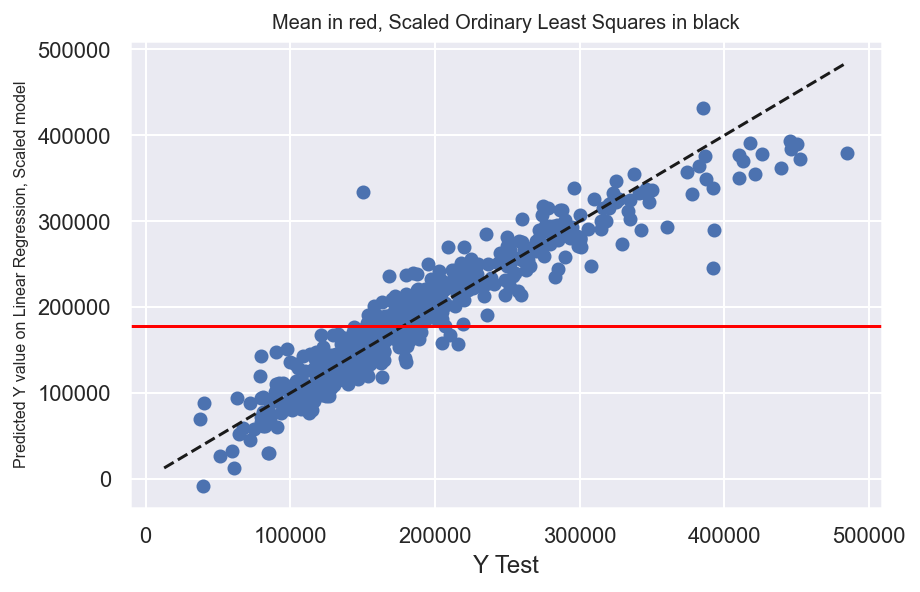

In [223]:
fig, ax = plt.subplots()

ax.scatter(y_test,y_pred_lrstandard)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')


ax.set_xlabel('Y Test')
ax.set_ylabel('Predicted Y value on Linear Regression, Scaled model', fontsize=8);

plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, Scaled Ordinary Least Squares in black", fontsize=10)
plt.show()


In [225]:
print('RMSE using OLS for scaled data:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lrstandard)))
print('This is the RMSE in dollars.')

RMSE using OLS for scaled data: 24722.109690692236
This is the MRSE in dollars.


#### RidgeCV regression, scaled

In [322]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=7)

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train);

In [323]:
print(f' RidgeCV Regression training R^2 score: {round(ridge_cv.score(Z_train, y_train),4)}')
print(f' RidgeCV Regression test R^2 score: {round(ridge_cv.score(Z_test, y_test),4)}')

 RidgeCV Regression training R^2 score: 0.9018
 RidgeCV Regression test R^2 score: 0.8947


In [324]:
# Here is the optimal value of alpha
ridge_cv.alpha_

46.4158883361278

In [325]:
ridge_preds = ridge_cv.predict(Z_test)

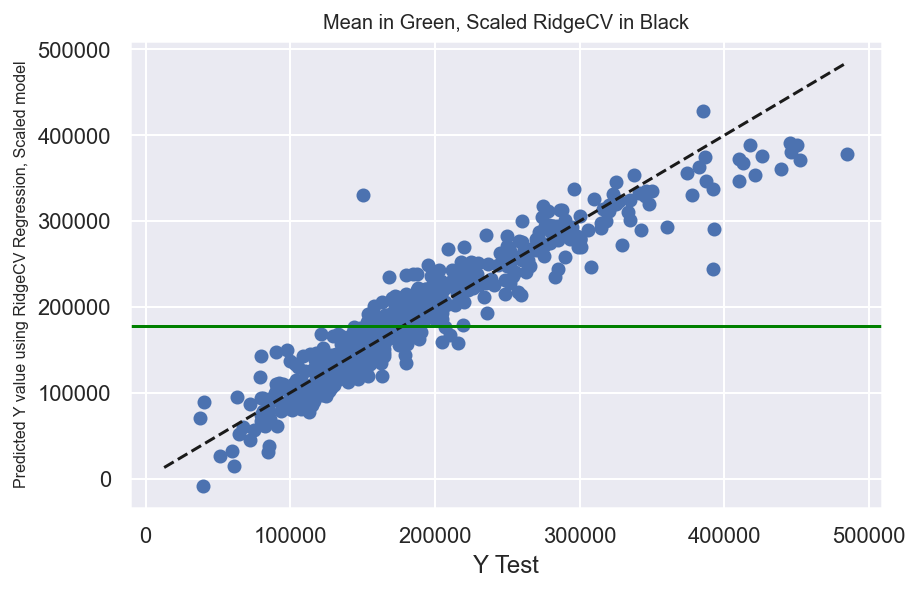

In [326]:
fig, ax = plt.subplots()

ax.scatter(y_test,ridge_preds)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')


ax.set_xlabel('Y Test')
ax.set_ylabel('Predicted Y value using RidgeCV Regression, Scaled model', fontsize=8);

plt.axhline(y_train.mean(),c='green')
plt.title("Mean in Green, Scaled RidgeCV in Black", fontsize=10)
plt.show()

In [327]:
print('RMSE using RidgeCV for scaled data:', np.sqrt(metrics.mean_squared_error(y_test, ridge_preds)))
print('This is the RMSE in dollars. Based on RMSE, this model only performs slightly better than OLS model')

RMSE using RidgeCV for scaled data: 24683.74143851314
This is the RMSE in dollars. Based on RMSE, this model only performs slightly better than OLS model


#### LassoCV regression, scaled

In [239]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 3, 500)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=10000)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);

#best found alpha
lasso_cv.alpha_

97.71921283717997

In [240]:
print(f' LassoCV Regression training R^2 score: {round(lasso_cv.score(Z_train, y_train),4)}')
print(f' LassoCV Regression test R^2 score: {round(lasso_cv.score(Z_test, y_test),4)}')

 LassoCV Regression training R^2 score: 0.9021
 LassoCV Regression test R^2 score: 0.8946


In [264]:
lasso_preds = lasso_cv.predict(Z_test)

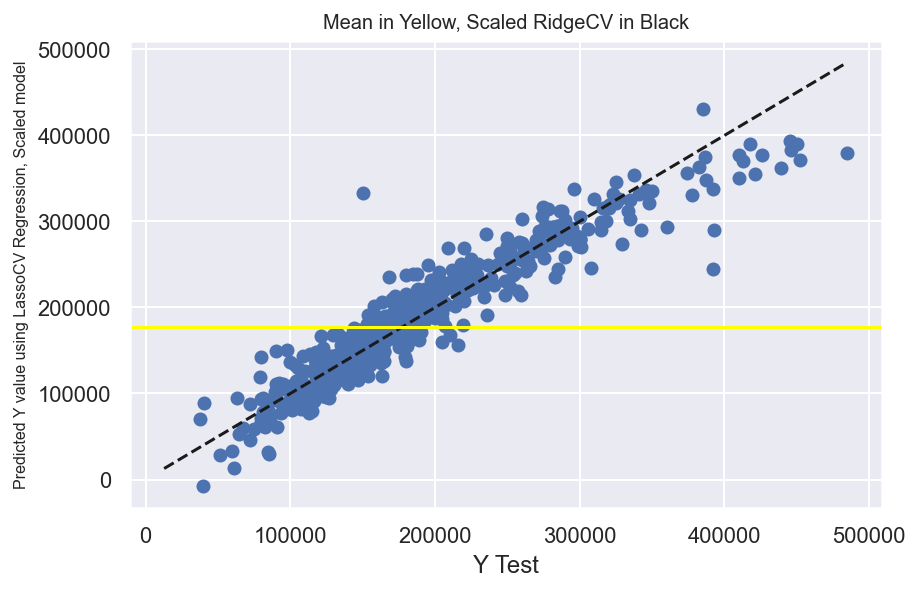

In [268]:
fig, ax = plt.subplots()

ax.scatter(y_test,lasso_preds)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')


ax.set_xlabel('Y Test')
ax.set_ylabel('Predicted Y value using LassoCV Regression, Scaled model', fontsize=8);

plt.axhline(y_train.mean(),c='yellow')
plt.title("Mean in Yellow, Scaled RidgeCV in Black", fontsize=10)
plt.show()

In [244]:
print('RMSE using LassoCV for scaled data:', np.sqrt(metrics.mean_squared_error(y_test, lasso_preds)))
print('This is the RMSE in dollars. Based on RMSE, this model only performs slightly better than the OLS model  but slightly worse than the ridgeCV regression')

RMSE using LassoCV for scaled data: 24698.165451624092
This is the RMSE in dollars. Based on RMSE, this model only performs slightly better than the OLS model  but slightly worse than the ridgeCV regression


In [250]:
# Reminder of results from evaluations before this
print(" OLS ".center(18, "="))# syntax: str.center(width, fillchar=' ')
print('R^2 score for train set:', lr_standardized.score(Z_train, y_train))
print('R^2 score for test set:',lr_standardized.score(Z_test, y_test))
print('RMSE using OLS for scaled data:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lrstandard)))
print()
print(" Ridge ".center(18, "="))
print('R^2 score for train set:',ridge_cv.score(Z_train, y_train))
print('R^2 score for test set:',ridge_cv.score(Z_test, y_test))
print('RMSE using RidgeCV for scaled data:', np.sqrt(metrics.mean_squared_error(y_test, ridge_preds)))
print()
print(" Lasso ".center(18, "="))
print('R^2 score for train set:',lasso_cv.score(Z_train, y_train))
print('R^2 score for test set:',lasso_cv.score(Z_test, y_test))
print('RMSE using LassoCV for scaled data:', np.sqrt(metrics.mean_squared_error(y_test, lasso_preds)))

====== OLS =======
R^2 score for train set: 0.9021075609167194
R^2 score for test set: 0.8943876499227089
RMSE using OLS for scaled data: 24722.109690692236

===== Ridge ======
R^2 score for train set: 0.9017884429701811
R^2 score for test set: 0.8947152123267565
RMSE using RidgeCV for scaled data: 24683.74143851314

===== Lasso ======
R^2 score for train set: 0.9020538899954831
R^2 score for test set: 0.8945921294570742
RMSE using LassoCV for scaled data: 24698.165451624092


#### Apply a power transform, featurewise, to make data more Gaussian-like (Gaussian is another name for normal distribution). 

In [252]:
#Model prep: Scaling with standardscaler and with powertransformer
pt = PowerTransformer()

In [253]:
# repeating train-test split from original df's X, y
X_train_pwr, X_test_pwr, y_train_pwr, y_test_pwr = train_test_split(X, y, test_size=0.3, random_state=42)

In [254]:
X_train_pwr = pt.fit_transform(X_train_pwr)
X_test_pwr = pt.transform(X_test_pwr)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [255]:
pt_y = PowerTransformer()

# PowerTransformer requires a matrix/DataFrame, which is why we're using the .to_frame() method on y_train
# while we didn't need to do this with X_train, which was already a dataframe
y_train_pt = pt_y.fit_transform(y_train_pwr.to_frame())
y_test_pt = pt_y.transform(y_test_pwr.to_frame())

In [256]:
# instantiating the same 3 models as before: linear regression, lassoCV and ridgeCV
lr_pwr = LinearRegression()
lasso_pwr = LassoCV(n_alphas=200)
ridge_pwr = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [257]:
# cross validating the above instantiated models
lr_pwr_scores = cross_val_score(lr_pwr, X_train_pwr, y_train_pt, cv=7)
print(f'lr_power: {lr_pwr_scores.mean()}')

lasso_pwr_scores = cross_val_score(lasso_pwr, X_train_pwr, y_train_pt[:, 0], cv=7)
print(f'lasso_power: {lasso_pwr_scores.mean()}')

ridge_pwr_scores = cross_val_score(ridge_pwr, X_train_pwr, y_train_pt, cv=7)
print(f'ridge_power: {ridge_pwr_scores.mean()}')

lr_power: 0.8878846292365302
lasso_power: 0.8879156384819578
ridge_power: 0.8880553869348252


#### Since applying a power transformer makes the cross validation scores fare worse than using standard scaler, we will forgo using power transformer. 

###### Models utilizing Pipeline and Gridsearch. A glance at Lasso, Ridge and Elastic net
- Pipeline saves time by executing scaling, model initiation and polynomial feature creation.

In [275]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [271]:
pipe_ridge = Pipeline([
    ('sc', StandardScaler()),
    ('ridge', Ridge())
])

In [272]:
#create parameters for gridsearch
ridge_params1 = {'ridge__alpha':np.logspace(-1, 3, 500),
               'ridge__max_iter':[10000]}

In [276]:
#apply pipeline and gridsearch to GridSearchCV
pipe_ridge_gridsearch = GridSearchCV(
                                pipe_ridge, 
                                param_grid=ridge_params1,
                            )

In [342]:
#fit best result from grid search
pipe_ridge_gridsearch.fit(X_train, y_train)
pipe_ridge_gridsearch.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('ridge', Ridge(alpha=39.55436244734702, max_iter=10000))])

In [343]:
pipe_ridge_gridsearch.best_score_ #this is based on Z train and y_train

0.8934184892752766

In [344]:
# Evaluate the best fit model on the test data.
pipe_ridge_gridsearch.score(X_test, y_test)

0.8946907950665247

In [345]:
y_preds_ridgegridsearch = pipe_ridge_gridsearch.predict(X_test)

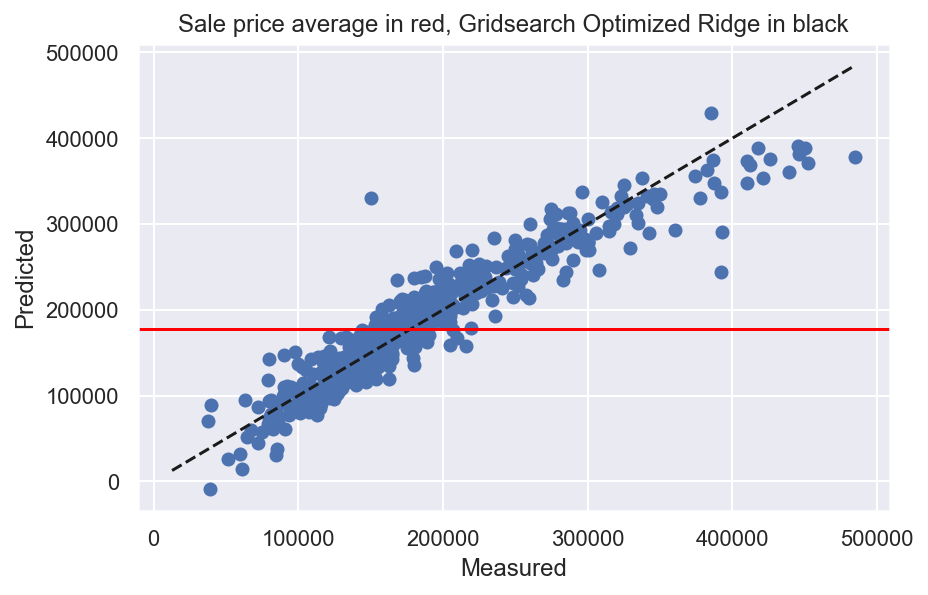

In [346]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds_ridgegridsearch)

ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Sale price average in red, Gridsearch Optimized Ridge in black")
plt.show()

In [347]:
print('RMSE using GridSearch_Ridge:', np.sqrt(metrics.mean_squared_error(y_test, y_preds_ridgegridsearch)))
print('This is the RMSE in dollars.')

RMSE using GridSearch_Ridge: 24686.60355378656
This is the RMSE in dollars.


#### Now lasso

In [305]:
pipe_lasso = Pipeline([
    ('sc', StandardScaler()),
    ('lassocv', Lasso())
])

In [306]:
lasso_params = {'lassocv__alpha':np.logspace(-1, 3, 1000),
               'lassocv__max_iter':[5000],
               'lassocv__warm_start':[True]}

In [307]:
pipe_lasso_gridsearch = GridSearchCV(pipe_lasso, 
                               param_grid=lasso_params)

In [348]:
pipe_lasso_gridsearch.fit(X_train, y_train)
pipe_lasso_gridsearch.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('lassocv',
                 Lasso(alpha=85.29644499741025, max_iter=5000,
                       warm_start=True))])

In [349]:
pipe_lasso_gridsearch.best_score_

0.893175622898122

In [350]:
# Evaluate the best fit model on the test data.
pipe_lasso_gridsearch.score(X_test, y_test)

0.8945712520143212

In [351]:
y_preds_lasso = pipe_lasso_gridsearch.predict(X_test)

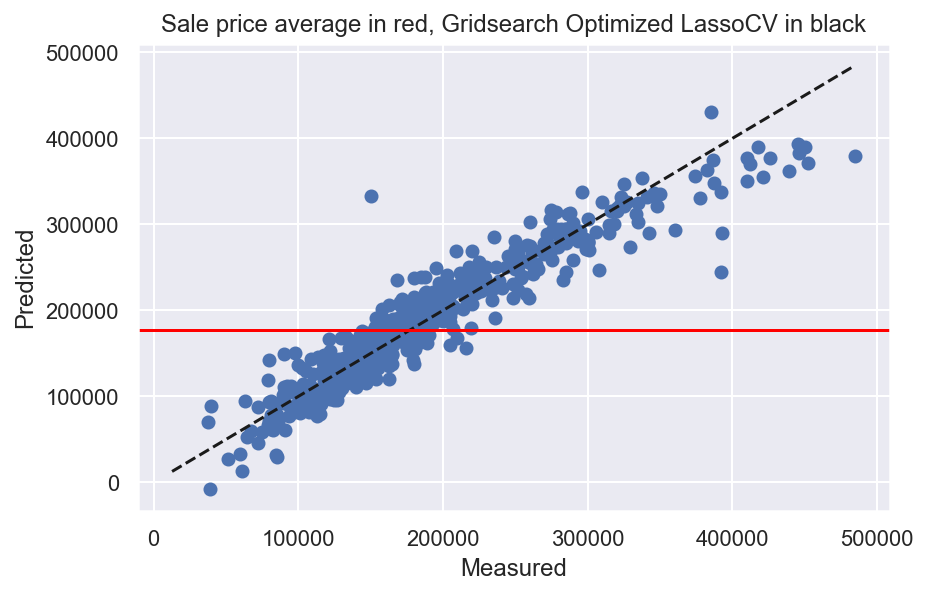

In [352]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds_lasso)

ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Sale price average in red, Gridsearch Optimized LassoCV in black")
plt.show()

In [353]:
print('RMSE using GridSearch_Lasso:', np.sqrt(metrics.mean_squared_error(y_test, y_preds_lasso)))
print('This is the RMSE in dollars.')

RMSE using GridSearch_Lasso: 24700.61123201559
This is the RMSE in dollars.


##### Now Elastic Net

In [314]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

In [354]:
pipe_elastic = Pipeline([
            #('poly', PolynomialFeatures(degree=2)),
            ('sc', StandardScaler()),
            ('elasticnet', ElasticNet())
                        ])

In [355]:
parameters_elastic = {'elasticnet__alpha': np.logspace(-1, 4, 500),
                      #'elasticnet__normalize': [True, False],
                      'elasticnet__selection': ['cyclic', 'random'],
                        'elasticnet__max_iter': [10000],
                        'elasticnet__warm_start': [True]
                        #'elasticnet__tol': [.1]
                       }

In [356]:
elastic_net_model = GridSearchCV(
                pipe_elastic, 
           param_grid= parameters_elastic)
elastic_net_model.fit(X_train, y_train)
elastic_net_model.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.1, max_iter=10000, warm_start=True))])

In [357]:
elastic_net_model.best_score_

0.8933848380297544

In [361]:
elastic_net_model.score(X_test, y_test)

0.8947561286903017

In [362]:
y_preds_en = elastic_net_model.predict(X_test)

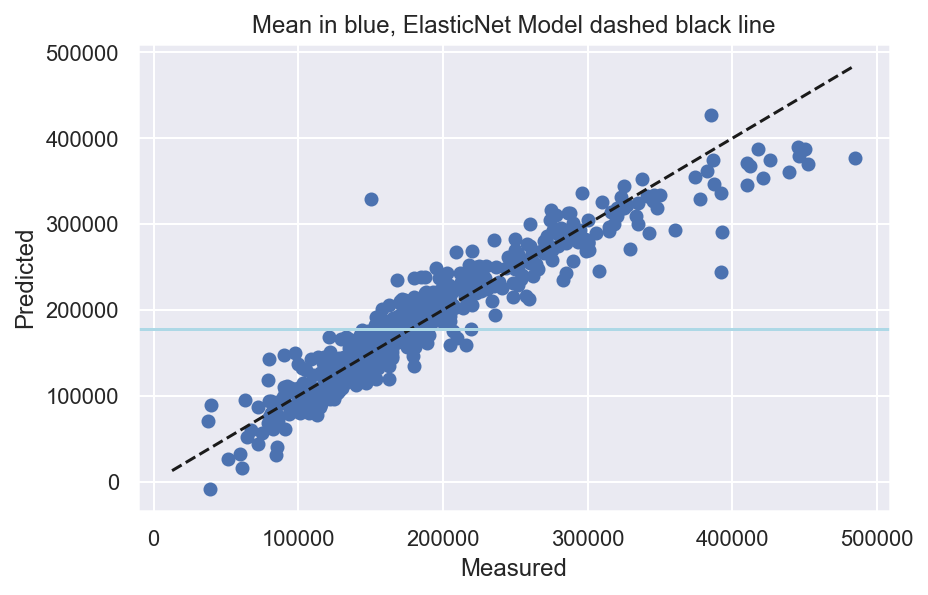

In [363]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds_en)

ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.axhline(y_train.mean(),c='lightblue')
plt.title("Mean in blue, ElasticNet Model dashed black line")
plt.show()

In [364]:
print('RMSE using GridSearch_Elastic:', np.sqrt(metrics.mean_squared_error(y_test, y_preds_en)))
print('This is the RMSE in dollars.')

RMSE using GridSearch_Elastic: 24678.944605539004
This is the RMSE in dollars.


### Since the scaled RidgeCV is the best model in terms of the test score and RMSE score, we will use it!

In [372]:
ridge_cv.fit(X_train, y_train)# fitting ridgeCV instantiated model

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=7, scoring='r2')

In [379]:
ridge_cv.score(X_train, y_train)

0.9019767251596155

In [375]:
ridge_cv.score(X_test, y_test)

0.8945886286254618

In [380]:
y_pred = ridge_cv.predict(X_test) # making predictions on testing set

r2_score(y_test, y_pred) # comparing model predictions vs true observations

0.8945886286254618

In [382]:
ridge_cv.coef_

array([-9.15404230e+01,  3.54252586e+03,  8.02612960e+03,  5.97560567e+03,
        9.01705711e+03, -5.54682839e+02, -8.36770403e+03,  1.15212650e+04,
        9.79850778e+02, -8.43798824e+03, -6.80735438e+03, -1.18091494e+03,
        4.95831928e+03,  1.90198458e+01,  1.28497589e+04,  1.16808844e+02,
        5.50980732e-01,  1.77365099e+01,  1.10122649e+01,  1.70387129e+03,
        7.40479538e+02,  2.28352055e+03,  5.21641316e+00,  1.78961657e+03,
        1.06550066e+03,  9.70127048e+03,  1.91428779e+03, -3.74651065e+03,
        4.11416011e+01,  2.54007358e+03,  8.57443164e+01])

In [471]:
import pickle

In [472]:
filename = 'finalized_model.sav'

In [473]:
pickle.dump(ridge_cv, open(filename, 'wb'))

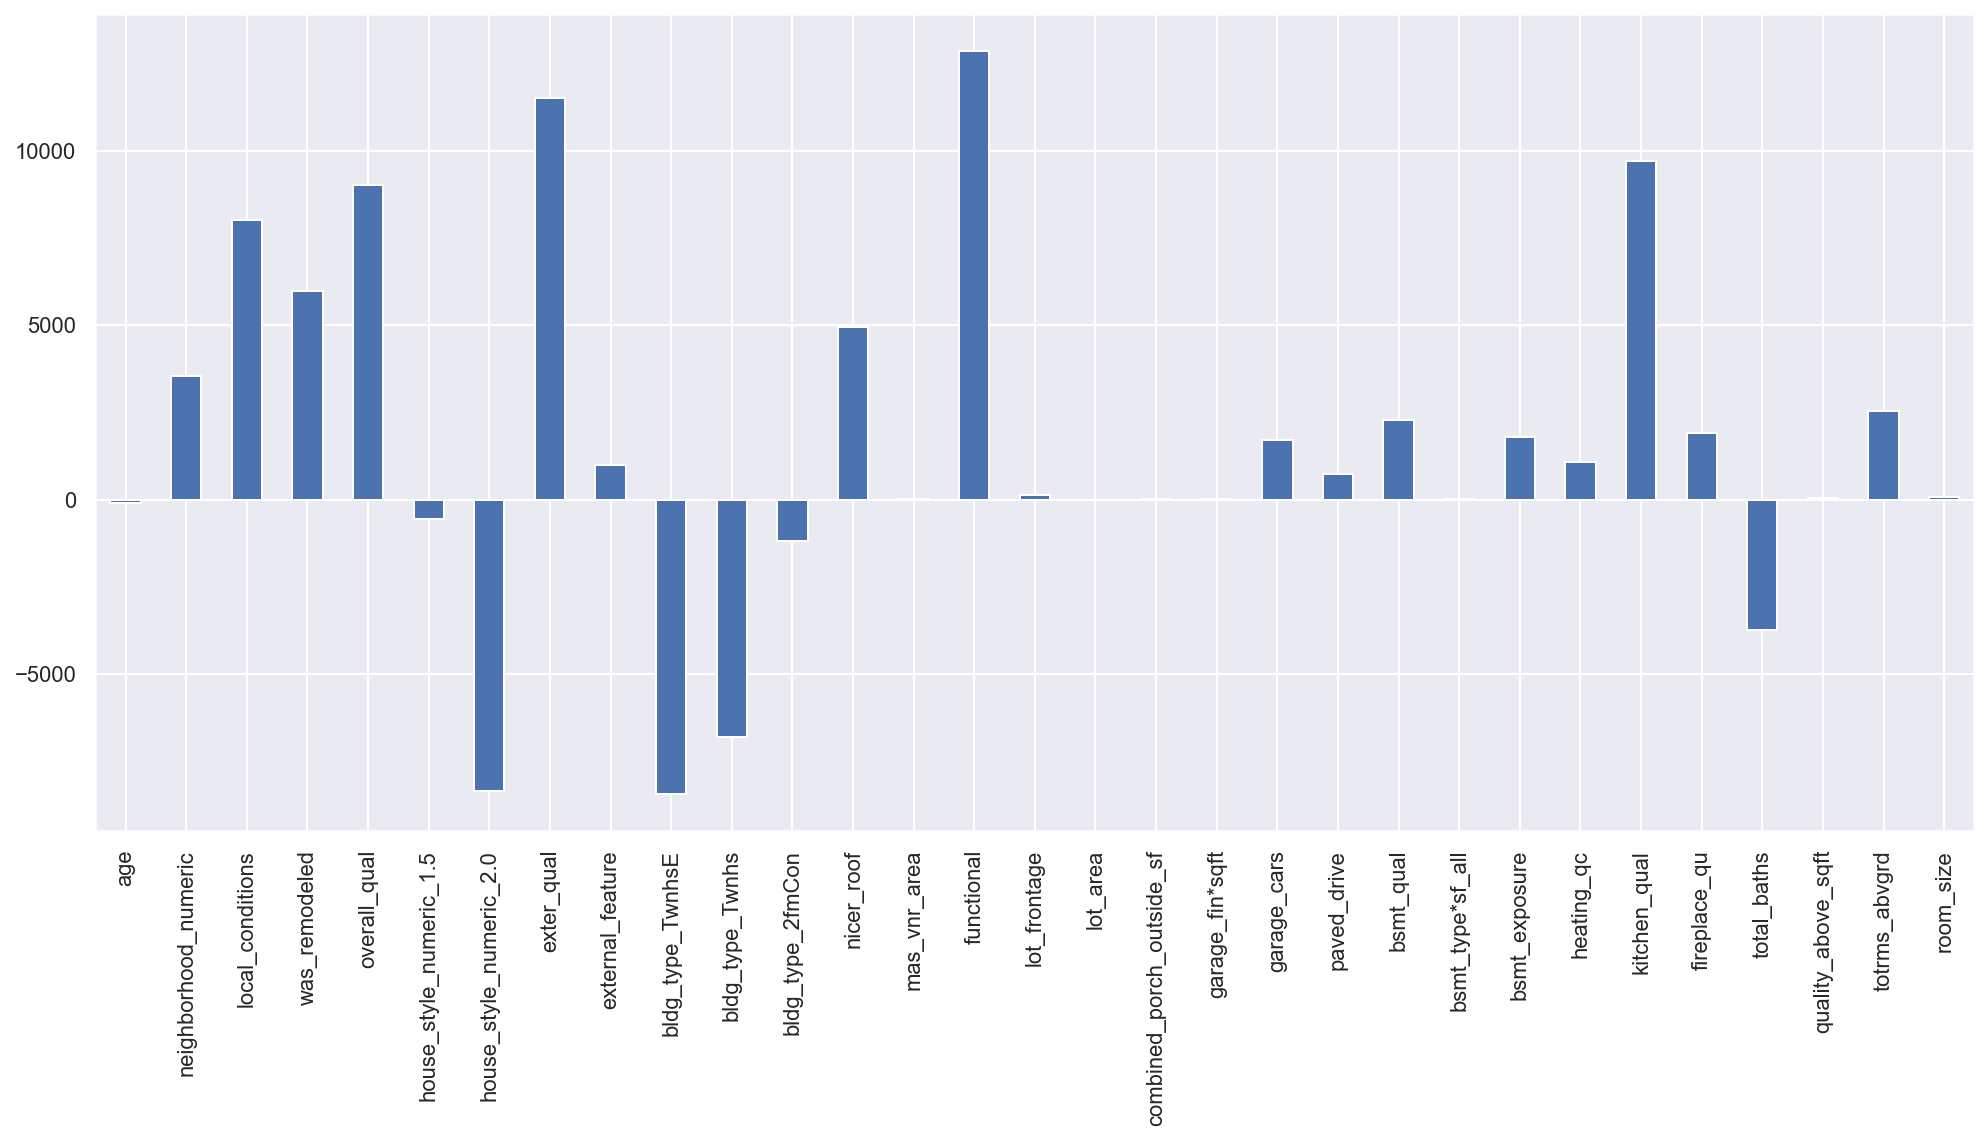

In [383]:
# plotting coefficients with corresponding features
pd.Series(ridge_cv.coef_, index=['age', 'neighborhood_numeric', 'local_conditions', 'was_remodeled',
       'overall_qual', 'house_style_numeric_1.5', 'house_style_numeric_2.0',
       'exter_qual', 'external_feature', 'bldg_type_TwnhsE', 'bldg_type_Twnhs',
       'bldg_type_2fmCon', 'nicer_roof', 'mas_vnr_area', 'functional',
       'lot_frontage', 'lot_area', 'combined_porch_outside_sf',
       'garage_fin*sqft', 'garage_cars', 'paved_drive', 'bsmt_qual',
       'bsmt_type*sf_all', 'bsmt_exposure', 'heating_qc', 'kitchen_qual',
       'fireplace_qu', 'total_baths', 'quality_above_sqft', 'totrms_abvgrd',
       'room_size']).plot.bar(figsize=(15, 7));

In [395]:
coefficients = pd.DataFrame(ridge_cv.coef_,X.columns)
coefficients.columns = ['Coefficient']
coefficients

Coefficient
building_age                       -91.540423
neighborhood_by_medianprice       3542.525861
positive_features                 8026.129597
remodeled_home                    5975.605674
overall_home_quality              9017.057107
single_storey_home                -554.682839
multiple_storey_home             -8367.704028
quality_of_exterior_material     11521.265008
type_of_exterior_covering_house    979.850778
middle_unit_townhouse            -8437.988237
end_unit_townhouse               -6807.354381
family_house                     -1180.914939
good_roof_quality                 4958.319280
masonry_veneer_sqft                 19.019846
home_functionality               12849.758856
lot_frontage                       116.808844
lot_size                             0.550981
outdoor_porch_space                 17.736510
garage_space                        11.012265
size_of_car_garage                1703.871290
paved_driveway                     740.479538
basement_quality                  2283.520549
finished_basement_in_sqft            5.216413
basement_ceiling_height           1789.616567
heater_quality                    1065.500661
kitchen_quality                   9701.270484
fireplace_quality                 1914.287793
total_number_of_baths            -3746.510652
finished_upstairs_in_sqft           41.141601
rooms_upstairs                    2540.073582
size_of_rooms                       85.744316

In [416]:
coefficient_sorted = coefficients.sort_values(by='Coefficient',ascending=False)
highest_df = coefficient_sorted.head(10)

In [470]:
coefficient_sorted.head(20)

Coefficient
home_functionality               12849.758856
quality_of_exterior_material     11521.265008
kitchen_quality                   9701.270484
overall_home_quality              9017.057107
positive_features                 8026.129597
remodeled_home                    5975.605674
good_roof_quality                 4958.319280
neighborhood_by_medianprice       3542.525861
rooms_upstairs                    2540.073582
basement_quality                  2283.520549
fireplace_quality                 1914.287793
basement_ceiling_height           1789.616567
size_of_car_garage                1703.871290
heater_quality                    1065.500661
type_of_exterior_covering_house    979.850778
paved_driveway                     740.479538
lot_frontage                       116.808844
size_of_rooms                       85.744316
finished_upstairs_in_sqft           41.141601
masonry_veneer_sqft                 19.019846

In [466]:
coefficient_sorted.tail(10)

Coefficient
garage_space                 11.012265
finished_basement_in_sqft     5.216413
lot_size                      0.550981
building_age                -91.540423
single_storey_home         -554.682839
family_house              -1180.914939
total_number_of_baths     -3746.510652
end_unit_townhouse        -6807.354381
multiple_storey_home      -8367.704028
middle_unit_townhouse     -8437.988237

In [418]:
highest_df.reset_index()

index   Coefficient
0            home_functionality  12849.758856
1  quality_of_exterior_material  11521.265008
2              kitchen_quality    9701.270484
3          overall_home_quality   9017.057107
4             positive_features   8026.129597
5                remodeled_home   5975.605674
6             good_roof_quality   4958.319280
7   neighborhood_by_medianprice   3542.525861
8                rooms_upstairs   2540.073582
9              basement_quality   2283.520549

In [419]:
highest_df = highest_df.reset_index()

In [424]:
highest_df.rename(columns={"index": "Features"}, inplace=True)

In [425]:
highest_df

Features   Coefficient
0            home_functionality  12849.758856
1  quality_of_exterior_material  11521.265008
2              kitchen_quality    9701.270484
3          overall_home_quality   9017.057107
4             positive_features   8026.129597
5                remodeled_home   5975.605674
6             good_roof_quality   4958.319280
7   neighborhood_by_medianprice   3542.525861
8                rooms_upstairs   2540.073582
9              basement_quality   2283.520549

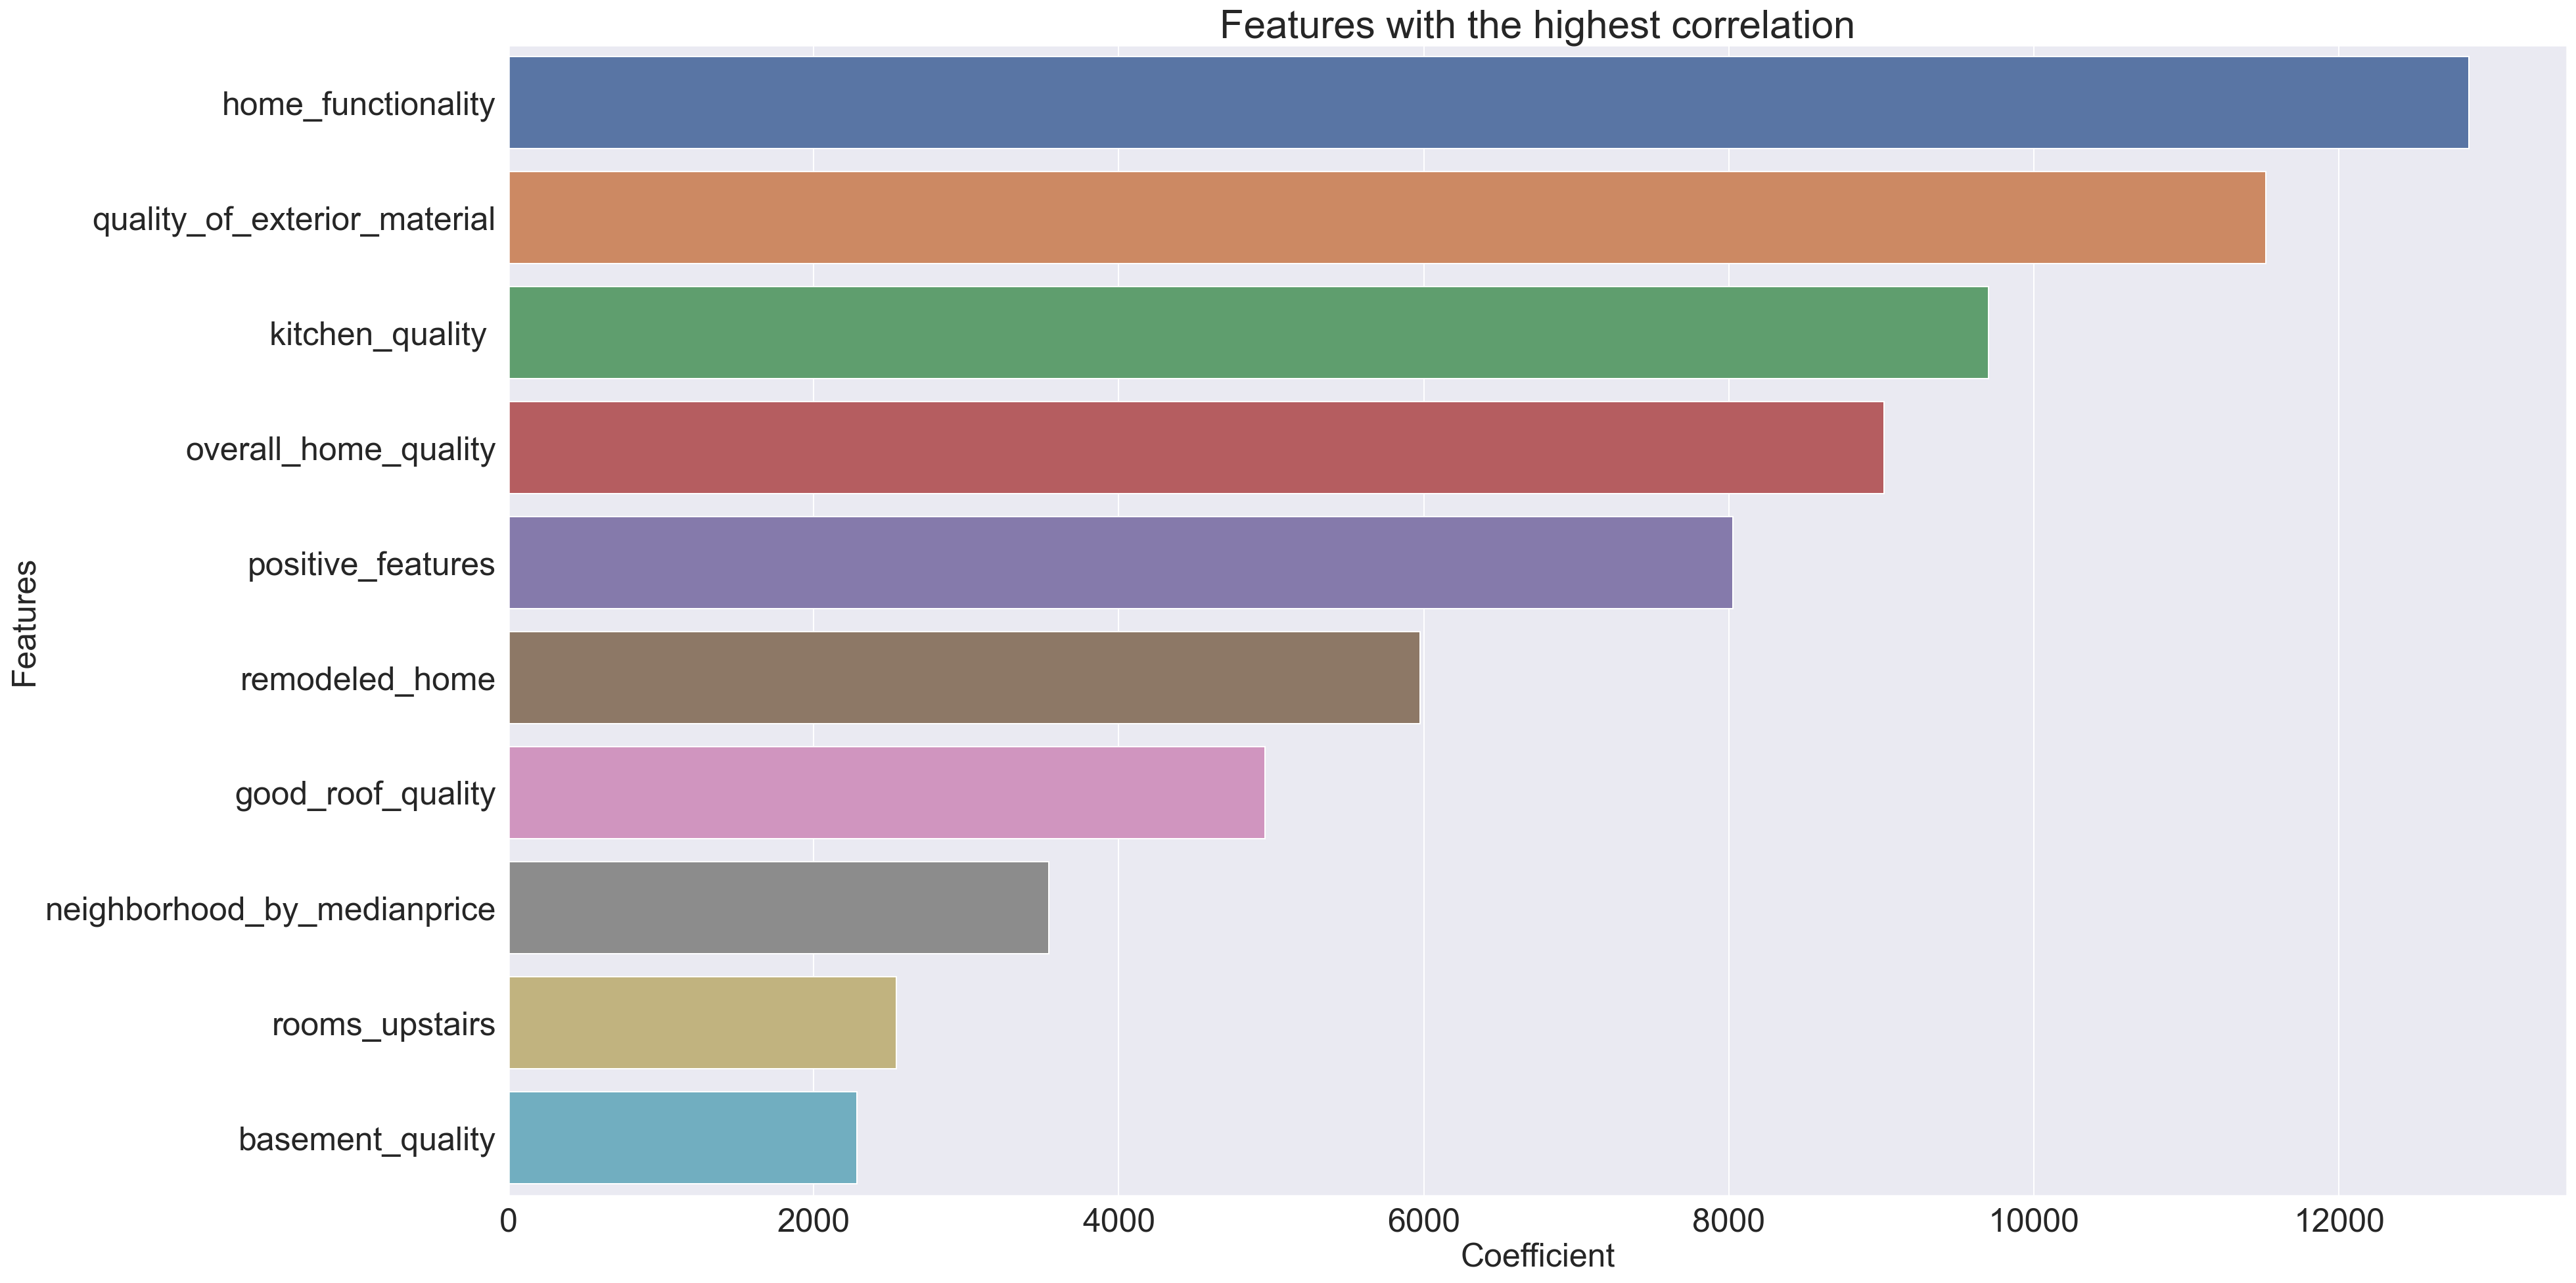

In [456]:
plt.figure(figsize=(25, 15))
sns.barplot(data=highest_df, x='Coefficient', y= 'Features')
plt.xticks (fontsize = 25)
plt.yticks (fontsize = 25)
plt.title('Features with the highest correlation',fontsize = 30)
plt.xlabel('Coefficient', fontsize = 25)
plt.ylabel('Features',fontsize = 25);

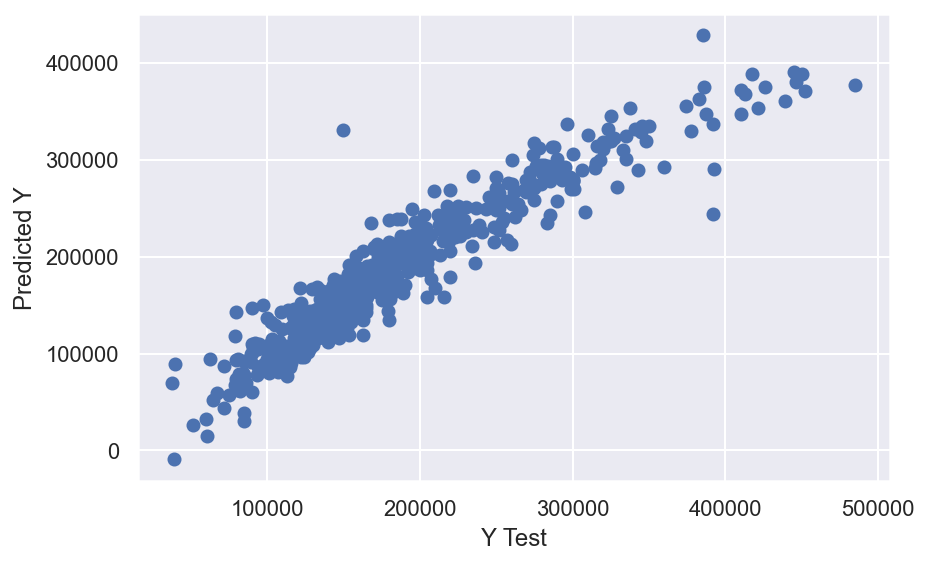

In [462]:
plt.scatter(y_test,ridge_preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


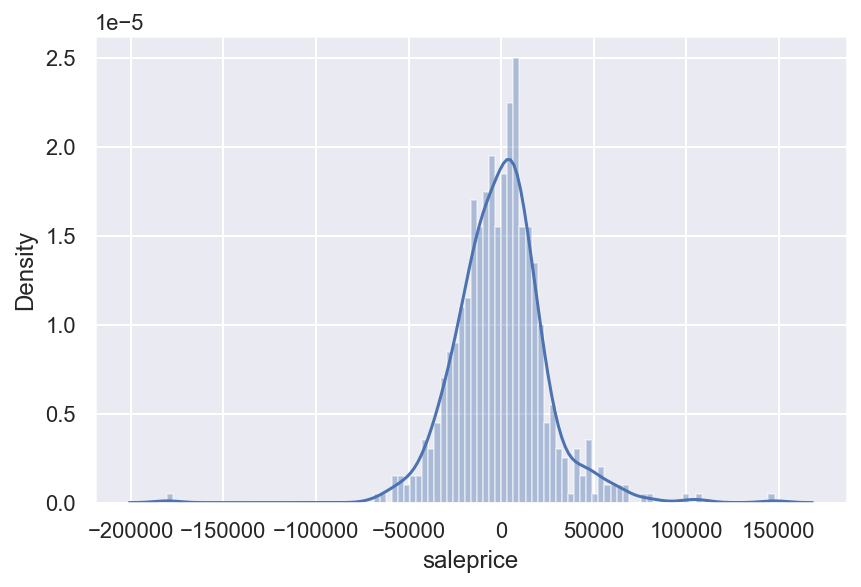

In [463]:
sns.distplot((y_test-ridge_preds),bins=100);

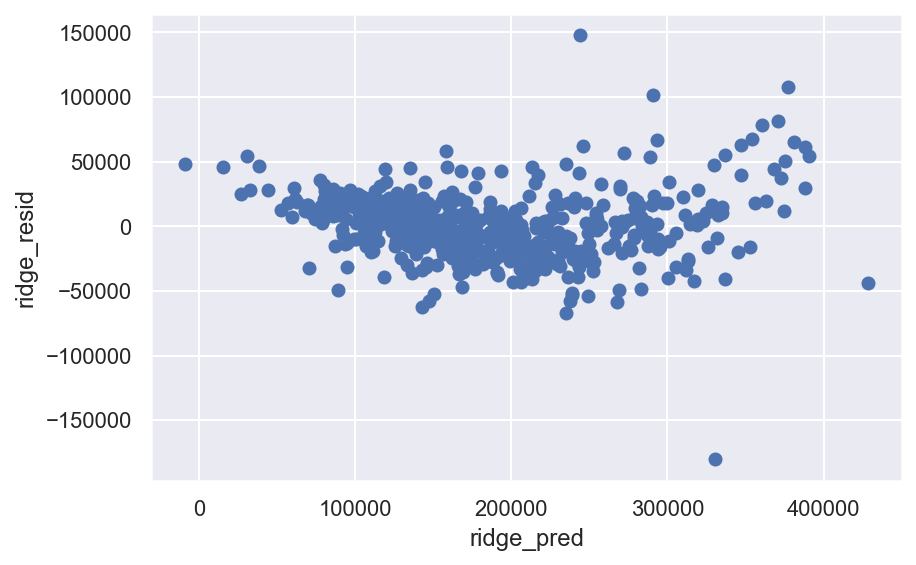

In [465]:
# Plot predictions against residuals.
ridge_resid = y_test - ridge_preds
plt.xlabel('ridge_pred')
plt.ylabel('ridge_resid');
plt.scatter(ridge_preds,ridge_resid);